In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
infile = open('real_estate_data_frame','rb')
frame = pkl.load(infile)
infile.close()

In [3]:
frame

,localization_y,localization_x,area,sewers,road,fence,water,electricity,gas,price
0,51.835925,19.193010,1004.0,brak,utwardzana,brak,wodociąg w drodze,w drodze,brak,90360.0
1,50.472433,19.233789,18.0,szambo,asfaltowa,żywopłot,wodociąg na działce,na działce,brak,229000.0
2,51.801330,19.189772,1200.0,brak,utwardzana,brak,brak,brak,brak,84000.0
3,53.723500,20.867400,1262.0,brak,utwardzana,brak,własne ujęcie/studnia,brak,brak,88340.0
4,52.094000,20.807400,950.0,brak,utwardzana,brak,brak,brak,brak,295000.0
...,...,...,...,...,...,...,...,...,...,...
7624,49.939618,19.889479,2000.0,brak,polna,brak,brak,brak,brak,360000.0
7625,49.907755,20.200424,35.2,brak,polna,brak,brak,brak,brak,315000.0
7626,50.026720,19.700051,4400.0,szambo,polna,brak,brak,brak,brak,160000.0
7627,49.987773,19.679529,4400.0,brak,polna,brak,brak,brak,brak,440000.0


In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7629 entries, 0 to 7628
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   localization_y  7629 non-null   float64
 1   localization_x  7629 non-null   float64
 2   area            7629 non-null   float64
 3   sewers          7629 non-null   object 
 4   road            7629 non-null   object 
 5   fence           7629 non-null   object 
 6   water           7629 non-null   object 
 7   electricity     7629 non-null   object 
 8   gas             7629 non-null   object 
 9   price           7629 non-null   float64
dtypes: float64(4), object(6)
memory usage: 596.1+ KB


## creating dummy variables

In [5]:
dummies = pd.get_dummies(frame[['sewers','road','fence','water','electricity','gas']],drop_first=True)
frame = frame.drop(['sewers','road','fence','water','electricity','gas'],axis=1)
frame = pd.concat([frame,dummies],axis=1)

In [6]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7629 entries, 0 to 7628
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   localization_y                           7629 non-null   float64
 1   localization_x                           7629 non-null   float64
 2   area                                     7629 non-null   float64
 3   price                                    7629 non-null   float64
 4   sewers_miejska                           7629 non-null   uint8  
 5   sewers_przydomowa oczyszczalnia ścieków  7629 non-null   uint8  
 6   sewers_szambo                            7629 non-null   uint8  
 7   road_kostka brukowa                      7629 non-null   uint8  
 8   road_polna                               7629 non-null   uint8  
 9   road_utwardzana                          7629 non-null   uint8  
 10  fence_brak                               7629 no

In [7]:
frame = frame.drop(['water_wodociąg na działce','water_wodociąg w drodze','water_własne ujęcie/studnia',
                    'electricity_na działce','electricity_w drodze','gas_na działce','gas_w drodze',
                    'sewers_miejska','sewers_przydomowa oczyszczalnia ścieków','sewers_szambo'],axis=1)

In [8]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7629 entries, 0 to 7628
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   localization_y       7629 non-null   float64
 1   localization_x       7629 non-null   float64
 2   area                 7629 non-null   float64
 3   price                7629 non-null   float64
 4   road_kostka brukowa  7629 non-null   uint8  
 5   road_polna           7629 non-null   uint8  
 6   road_utwardzana      7629 non-null   uint8  
 7   fence_brak           7629 non-null   uint8  
 8   fence_drewniane      7629 non-null   uint8  
 9   fence_inne           7629 non-null   uint8  
 10  fence_metalowe       7629 non-null   uint8  
 11  fence_mieszane       7629 non-null   uint8  
 12  fence_murowane       7629 non-null   uint8  
 13  fence_siatka         7629 non-null   uint8  
 14  fence_żywopłot       7629 non-null   uint8  
dtypes: float64(4), uint8(11)
memory usage:

## train test split

In [9]:
X = frame.drop('price',axis=1).values
y = frame['price'].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
X_train= scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
X_train.shape

(5721, 14)

In [17]:
X_test.shape

(1908, 14)

## creating model 

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout
from tensorflow.keras.optimizers import Adam

In [19]:
model = Sequential()

model.add(Dense(8,activation='relu', input_dim = X_train.shape[1]))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 120       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


In [21]:
# from tensorflow.keras.callbacks import EarlyStopping

In [22]:
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [23]:
start = time.time()

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=256,epochs=20000,
#           callbacks=[early_stop],
         )

stop = time.time()
print('\n',(stop-start)//60,'min.')

Train on 5721 samples, validate on 1908 samples
Epoch 1/20000
5721/5721 [==============================] - 1s 90us/sample - loss: 3244807457314.6348 - val_loss: 2747799679671.5474
Epoch 2/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 3244807257682.4248 - val_loss: 2747799567010.0796
Epoch 3/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 3244807397437.5723 - val_loss: 2747799408734.4570
Epoch 4/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 3244807053032.7759 - val_loss: 2747799209790.7925
Epoch 5/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 3244806702281.7212 - val_loss: 2747798886095.1616
Epoch 6/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 3244805995281.0483 - val_loss: 2747797860051.4551
Epoch 7/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 3244804920747.2480 - val_loss: 2747796463049.2578
Epoch 8/20000
5721/5721 [=========

Epoch 63/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 3162927512783.8071 - val_loss: 2663416222923.9414
Epoch 64/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 3157763164643.6304 - val_loss: 2658114621568.8052
Epoch 65/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 3152309006270.8477 - val_loss: 2652806813940.7295
Epoch 66/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 3146824651977.0054 - val_loss: 2647150597701.7695
Epoch 67/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 3141146194885.8286 - val_loss: 2641193081282.8174
Epoch 68/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 3135155467351.8838 - val_loss: 2635208638773.1318
Epoch 69/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 3129054735665.8931 - val_loss: 2629268377144.8887
Epoch 70/20000
5721/5721 [==============================] - 0s 6us/sample - 

Epoch 125/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2919440907050.8232 - val_loss: 2422523626433.7441
Epoch 126/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2919075702965.4956 - val_loss: 2422301685541.0312
Epoch 127/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2918831602162.6655 - val_loss: 2422010494666.8682
Epoch 128/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2918559270946.0078 - val_loss: 2421774656844.7461
Epoch 129/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2918319660951.4697 - val_loss: 2421540901336.2852
Epoch 130/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2918076798556.8062 - val_loss: 2421328284966.1050
Epoch 131/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2917838252167.6743 - val_loss: 2421093528694.0713
Epoch 132/20000
5721/5721 [==============================] - 0s 6us/s

5721/5721 [==============================] - 0s 6us/sample - loss: 2908483214021.1572 - val_loss: 2412254200632.3521
Epoch 187/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2908321505155.4229 - val_loss: 2412106276125.5176
Epoch 188/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2908167871995.0776 - val_loss: 2411982321582.4233
Epoch 189/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2908037942974.5347 - val_loss: 2411847938434.4150
Epoch 190/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2907890367838.9985 - val_loss: 2411701034475.6060
Epoch 191/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2907732618815.0938 - val_loss: 2411573985863.9160
Epoch 192/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2907614041520.9761 - val_loss: 2411424979257.4258
Epoch 193/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 29

Epoch 248/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2899855906611.5938 - val_loss: 2404181549794.4824
Epoch 249/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2899810644661.7637 - val_loss: 2404054806193.1069
Epoch 250/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2899493228875.4888 - val_loss: 2403926682076.5786
Epoch 251/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2899381843083.4331 - val_loss: 2403813510609.8447
Epoch 252/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2899232230197.5630 - val_loss: 2403689747866.0293
Epoch 253/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2899093626133.9712 - val_loss: 2403575249741.8198
Epoch 254/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2898996201686.4297 - val_loss: 2403443234133.3335
Epoch 255/20000
5721/5721 [==============================] - 0s 6us/s

5721/5721 [==============================] - 0s 6us/sample - loss: 2891796080374.7373 - val_loss: 2396944354082.8848
Epoch 310/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2891629041917.8071 - val_loss: 2396822943490.6836
Epoch 311/20000
5721/5721 [==============================] - 0s 5us/sample - loss: 2891513812366.6099 - val_loss: 2396717054351.2954
Epoch 312/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2891382255679.7207 - val_loss: 2396595348091.4380
Epoch 313/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2891219377034.7617 - val_loss: 2396471219884.8135
Epoch 314/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2891078547135.6084 - val_loss: 2396355769908.5952
Epoch 315/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2890950330591.0210 - val_loss: 2396242994680.4863
Epoch 316/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 28

Epoch 371/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2883673248745.6260 - val_loss: 2389875901068.6123
Epoch 372/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2883516656897.2085 - val_loss: 2389770099860.1260
Epoch 373/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2883406481596.6553 - val_loss: 2389652331255.9497
Epoch 374/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2883281205122.3496 - val_loss: 2389560856739.1528
Epoch 375/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2883074603850.3257 - val_loss: 2389420338212.4946
Epoch 376/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2882971706671.3877 - val_loss: 2389309310611.0522
Epoch 377/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2882836866322.7490 - val_loss: 2389193862283.5386
Epoch 378/20000
5721/5721 [==============================] - 0s 6us/s

5721/5721 [==============================] - 0s 6us/sample - loss: 2875810538074.8374 - val_loss: 2383361977140.0586
Epoch 433/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2875673143322.8486 - val_loss: 2383263702267.1699
Epoch 434/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2875558387392.6821 - val_loss: 2383170535630.0879
Epoch 435/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2875442335118.9678 - val_loss: 2383070657666.9517
Epoch 436/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2875309384935.7915 - val_loss: 2382971746394.1636
Epoch 437/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2875268248890.1270 - val_loss: 2382861543694.4907
Epoch 438/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2875076700347.2231 - val_loss: 2382762756624.1006
Epoch 439/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 28

Epoch 494/20000
5721/5721 [==============================] - 0s 4us/sample - loss: 2868245183833.2715 - val_loss: 2377455156732.7798
Epoch 495/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2868101531407.0801 - val_loss: 2377370983778.2139
Epoch 496/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2868011927222.3008 - val_loss: 2377286388205.7524
Epoch 497/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2867828404485.3252 - val_loss: 2377191631118.4907
Epoch 498/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2867710169889.1582 - val_loss: 2377101917417.9956
Epoch 499/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2867691869846.0830 - val_loss: 2377024765196.3438
Epoch 500/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2867493270255.0405 - val_loss: 2376940441110.5410
Epoch 501/20000
5721/5721 [==============================] - 0s 8us/s

5721/5721 [==============================] - 0s 8us/sample - loss: 2861257676638.5513 - val_loss: 2372561216776.0503
Epoch 556/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2861104526274.9644 - val_loss: 2372475676495.9663
Epoch 557/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2860994030912.2124 - val_loss: 2372397134416.5029
Epoch 558/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 2860929439565.3682 - val_loss: 2372331465970.5830
Epoch 559/20000
5721/5721 [==============================] - 0s 12us/sample - loss: 2860789805093.9458 - val_loss: 2372247919523.6899
Epoch 560/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2860692999303.4951 - val_loss: 2372175423792.8384
Epoch 561/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2860585417245.6226 - val_loss: 2372107864832.5366
Epoch 562/20000
5721/5721 [==============================] - 0s 9us/sample - loss:

5721/5721 [==============================] - 0s 7us/sample - loss: 2855182396214.9946 - val_loss: 2368836764953.2241
Epoch 617/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2855014696767.7651 - val_loss: 2368776181661.2495
Epoch 618/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2854949262811.9336 - val_loss: 2368708498498.5493
Epoch 619/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2854837544162.0640 - val_loss: 2368651665459.5220
Epoch 620/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2854800297490.7041 - val_loss: 2368606788275.2539
Epoch 621/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2854668267881.5591 - val_loss: 2368564381399.7485
Epoch 622/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2854623916837.4536 - val_loss: 2368525426911.2622
Epoch 623/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 28

Epoch 678/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2850093385744.8252 - val_loss: 2366448215441.4424
Epoch 679/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2850019864777.1846 - val_loss: 2366420985989.0986
Epoch 680/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2849945950249.8838 - val_loss: 2366382379377.2412
Epoch 681/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2849890775593.4360 - val_loss: 2366396996790.4736
Epoch 682/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2849809842115.8594 - val_loss: 2366361068224.1343
Epoch 683/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2849753265016.5049 - val_loss: 2366339649355.6729
Epoch 684/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2849726057312.5200 - val_loss: 2366287960823.9497
Epoch 685/20000
5721/5721 [==============================] - 0s 7us/s

5721/5721 [==============================] - 0s 6us/sample - loss: 2846530046681.9199 - val_loss: 2365468836114.7842
Epoch 740/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2846504074287.4321 - val_loss: 2365446890210.4824
Epoch 741/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2846418112580.0161 - val_loss: 2365462529270.8765
Epoch 742/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2846415773869.2617 - val_loss: 2365453042625.7441
Epoch 743/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2846370707966.1206 - val_loss: 2365425756567.8828
Epoch 744/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2846306567415.5430 - val_loss: 2365425849994.4653
Epoch 745/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2846343326404.4414 - val_loss: 2365428146639.6982
Epoch 746/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 28

5721/5721 [==============================] - 0s 7us/sample - loss: 2844200216153.2266 - val_loss: 2365360925663.7988
Epoch 801/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2844155855257.5283 - val_loss: 2365392822048.7378
Epoch 802/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2844076890975.8042 - val_loss: 2365412391620.4277
Epoch 803/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2844048405062.0742 - val_loss: 2365421498513.9790
Epoch 804/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2844018523819.2036 - val_loss: 2365420927512.6875
Epoch 805/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2843972615461.7222 - val_loss: 2365423860008.2515
Epoch 806/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2843963654264.2812 - val_loss: 2365411368874.1299
Epoch 807/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 28

5721/5721 [==============================] - 0s 6us/sample - loss: 2842429394530.8921 - val_loss: 2365821878134.6079
Epoch 862/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2842369725131.2427 - val_loss: 2365808818197.4673
Epoch 863/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2842349702823.6235 - val_loss: 2365810235533.6855
Epoch 864/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2842357467447.7998 - val_loss: 2365838206903.0103
Epoch 865/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2842304626679.4087 - val_loss: 2365820416283.3711
Epoch 866/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2842311603170.4668 - val_loss: 2365857224708.2935
Epoch 867/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2842320096153.7969 - val_loss: 2365820752619.0693
Epoch 868/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 28

5721/5721 [==============================] - 0s 7us/sample - loss: 2841078212391.4224 - val_loss: 2366330295706.0293
Epoch 923/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2841054531156.5723 - val_loss: 2366335949113.4258
Epoch 924/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2841039602889.7217 - val_loss: 2366333113341.8530
Epoch 925/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2841037309038.0786 - val_loss: 2366319989654.8091
Epoch 926/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2840999153591.6880 - val_loss: 2366340805097.4590
Epoch 927/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2840980484858.4961 - val_loss: 2366374972297.9287
Epoch 928/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2841035977675.5562 - val_loss: 2366402521049.3584
Epoch 929/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 28

5721/5721 [==============================] - 0s 6us/sample - loss: 2839962957681.1665 - val_loss: 2366786469681.9121
Epoch 984/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2839956874614.9834 - val_loss: 2366772668377.3584
Epoch 985/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2839924218442.0122 - val_loss: 2366783444309.3335
Epoch 986/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2839932507720.7593 - val_loss: 2366820875944.5200
Epoch 987/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2839887676869.7388 - val_loss: 2366816546446.7588
Epoch 988/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2839881761028.6089 - val_loss: 2366815996878.6245
Epoch 989/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2839870915370.4653 - val_loss: 2366815888064.1343
Epoch 990/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 28

5721/5721 [==============================] - 0s 6us/sample - loss: 2838936521204.8130 - val_loss: 2367094199259.5054
Epoch 1045/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2838915634030.4814 - val_loss: 2367132398091.8071
Epoch 1046/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2838911828990.3892 - val_loss: 2367104894404.9644
Epoch 1047/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2838833144551.1650 - val_loss: 2367159945194.5327
Epoch 1048/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2838839208641.5771 - val_loss: 2367163374499.6899
Epoch 1049/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2838855499813.2300 - val_loss: 2367179356490.5996
Epoch 1050/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2838825883251.7168 - val_loss: 2367189898306.5493
Epoch 1051/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 10us/sample - loss: 2837912653823.2842 - val_loss: 2367360725515.8071
Epoch 1106/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2837873468312.7227 - val_loss: 2367371836684.3438
Epoch 1107/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2837872749112.1133 - val_loss: 2367372353278.3901
Epoch 1108/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2837842813548.0205 - val_loss: 2367347810664.6543
Epoch 1109/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2837832782089.6206 - val_loss: 2367362169780.8638
Epoch 1110/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2837789488298.9351 - val_loss: 2367353769082.3647
Epoch 1111/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2837797858085.8115 - val_loss: 2367358151888.2349
Epoch 1112/20000
5721/5721 [==============================] - 0s 10us/sample

5721/5721 [==============================] - 0s 7us/sample - loss: 2836922131916.8984 - val_loss: 2367546265213.5850
Epoch 1167/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2836841055339.2148 - val_loss: 2367490961073.1069
Epoch 1168/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2836833599161.5229 - val_loss: 2367485606630.7759
Epoch 1169/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2836836386784.1396 - val_loss: 2367483594112.2686
Epoch 1170/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2836781342684.2021 - val_loss: 2367518487292.2432
Epoch 1171/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2836750450793.9619 - val_loss: 2367578833720.3521
Epoch 1172/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2836768228977.5688 - val_loss: 2367553110084.6958
Epoch 1173/20000
5721/5721 [==============================] - 0s 7us/sample - 

Epoch 1227/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2835874130889.0503 - val_loss: 2367460589739.7402
Epoch 1228/20000
5721/5721 [==============================] - 0s 12us/sample - loss: 2835854419920.3887 - val_loss: 2367459845074.9185
Epoch 1229/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 2835831681620.3940 - val_loss: 2367448202473.9956
Epoch 1230/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2835868707925.3779 - val_loss: 2367398654510.1553
Epoch 1231/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2835794733372.0957 - val_loss: 2367411072551.7148
Epoch 1232/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2835845109730.2876 - val_loss: 2367423498836.7969
Epoch 1233/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2835766371863.3579 - val_loss: 2367416795754.2642
Epoch 1234/20000
5721/5721 [==============================] 

5721/5721 [==============================] - 0s 7us/sample - loss: 2834879199518.7417 - val_loss: 2367360915116.8135
Epoch 1289/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2834850911518.9204 - val_loss: 2367426700620.7461
Epoch 1290/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2834804264458.1128 - val_loss: 2367389103565.5513
Epoch 1291/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2834826058563.1660 - val_loss: 2367468283693.6187
Epoch 1292/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2834752666256.1763 - val_loss: 2367476878939.2368
Epoch 1293/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2834739930799.1416 - val_loss: 2367457593494.2725
Epoch 1294/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2834774634396.4814 - val_loss: 2367463594778.2979
Epoch 1295/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 9us/sample - loss: 2833772273029.6606 - val_loss: 2367394626725.2998
Epoch 1350/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2833769145343.8208 - val_loss: 2367359086154.0630
Epoch 1351/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2833745202377.3633 - val_loss: 2367367252736.5366
Epoch 1352/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2833746387730.1226 - val_loss: 2367389330537.1909
Epoch 1353/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2833712060200.1382 - val_loss: 2367407137094.3062
Epoch 1354/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2833706948392.1382 - val_loss: 2367415075606.0044
Epoch 1355/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2833688076567.2236 - val_loss: 2367384752085.0649
Epoch 1356/20000
5721/5721 [==============================] - 0s 7us/sample - 

5721/5721 [==============================] - 0s 7us/sample - loss: 2832727742723.5352 - val_loss: 2367251803859.4551
Epoch 1411/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2832687829546.8682 - val_loss: 2367221359433.5264
Epoch 1412/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2832764179287.5708 - val_loss: 2367281641562.1636
Epoch 1413/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2832658930931.6050 - val_loss: 2367232192520.5869
Epoch 1414/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2832714558898.7661 - val_loss: 2367305931924.1260
Epoch 1415/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2832603647575.4365 - val_loss: 2367290538520.6875
Epoch 1416/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2832696113682.1675 - val_loss: 2367234372657.3755
Epoch 1417/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2831603571617.6724 - val_loss: 2367055951515.6396
Epoch 1472/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2831621074930.3970 - val_loss: 2367055790492.1763
Epoch 1473/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2831561366972.0732 - val_loss: 2367049882634.7339
Epoch 1474/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2831536657712.1035 - val_loss: 2367040307509.1318
Epoch 1475/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2831519732848.2266 - val_loss: 2367033032326.1719
Epoch 1476/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2831501962328.2422 - val_loss: 2367028181837.8198
Epoch 1477/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2831508721826.5225 - val_loss: 2367021055587.8237
Epoch 1478/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2830542066261.8257 - val_loss: 2366882266002.5156
Epoch 1533/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2830384117456.7915 - val_loss: 2366853607123.4551
Epoch 1534/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2830403370091.5728 - val_loss: 2366803948696.4194
Epoch 1535/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2830442266652.6382 - val_loss: 2366948329587.9243
Epoch 1536/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2830358058448.4780 - val_loss: 2366886774659.4883
Epoch 1537/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2830327577163.4438 - val_loss: 2366882949115.7065
Epoch 1538/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2830375045314.3828 - val_loss: 2366966622512.8384
Epoch 1539/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2829194942795.1309 - val_loss: 2366618114430.1216
Epoch 1594/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2829165837617.1772 - val_loss: 2366616295909.1655
Epoch 1595/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2829128837418.9131 - val_loss: 2366652029928.3857
Epoch 1596/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2829104762693.1348 - val_loss: 2366710636973.3501
Epoch 1597/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2829152805518.3862 - val_loss: 2366751927675.9746
Epoch 1598/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2829144184916.8408 - val_loss: 2366657459111.9834
Epoch 1599/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2829044697763.5068 - val_loss: 2366712929771.6060
Epoch 1600/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2827936624600.6226 - val_loss: 2366484946926.8262
Epoch 1655/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2827873447782.0688 - val_loss: 2366471651224.9561
Epoch 1656/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2827818853579.1533 - val_loss: 2366431440423.7148
Epoch 1657/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2827837338104.7510 - val_loss: 2366355535172.1592
Epoch 1658/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2827825415787.8413 - val_loss: 2366393301494.3398
Epoch 1659/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2827806051062.5581 - val_loss: 2366386769327.4971
Epoch 1660/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2827833752812.4453 - val_loss: 2366326149214.4570
Epoch 1661/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 9us/sample - loss: 2826581777966.6270 - val_loss: 2366032941974.8091
Epoch 1716/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2826471905018.3169 - val_loss: 2366025728343.4800
Epoch 1717/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2826433569860.5532 - val_loss: 2366024944659.3208
Epoch 1718/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2826417601540.4746 - val_loss: 2366050756775.4468
Epoch 1719/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2826408002097.3115 - val_loss: 2366002854218.5996
Epoch 1720/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2826414736250.6528 - val_loss: 2366039601641.4590
Epoch 1721/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2826354435890.8779 - val_loss: 2366002433798.9771
Epoch 1722/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 16us/sample - loss: 2825055216456.5356 - val_loss: 2365756280582.9771
Epoch 1777/20000
5721/5721 [==============================] - 0s 19us/sample - loss: 2825093463889.3062 - val_loss: 2365779870795.1362
Epoch 1778/20000
5721/5721 [==============================] - 0s 17us/sample - loss: 2825018697772.0312 - val_loss: 2365709902528.1343
Epoch 1779/20000
5721/5721 [==============================] - 0s 16us/sample - loss: 2825003536675.3950 - val_loss: 2365679477886.6582
Epoch 1780/20000
5721/5721 [==============================] - 0s 14us/sample - loss: 2824966782927.3149 - val_loss: 2365677134528.1343
Epoch 1781/20000
5721/5721 [==============================] - 0s 13us/sample - loss: 2825009237264.9595 - val_loss: 2365719966219.8071
Epoch 1782/20000
5721/5721 [==============================] - 0s 13us/sample - loss: 2824972777552.5454 - val_loss: 2365672877023.7988
Epoch 1783/20000
5721/5721 [==============================] - 0s 14us/sa

Epoch 1837/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2823569682733.4185 - val_loss: 2365433661006.3564
Epoch 1838/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2823507666535.5454 - val_loss: 2365447621136.1006
Epoch 1839/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2823511764614.6899 - val_loss: 2365514430485.4673
Epoch 1840/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2823475105184.1509 - val_loss: 2365530406431.1279
Epoch 1841/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2823441372764.8062 - val_loss: 2365482903959.8828
Epoch 1842/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2823439296851.0063 - val_loss: 2365438692302.6245
Epoch 1843/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2823389691448.6504 - val_loss: 2365435435012.2935
Epoch 1844/20000
5721/5721 [==============================] - 

5721/5721 [==============================] - 0s 11us/sample - loss: 2822015656478.6968 - val_loss: 2364797575459.9580
Epoch 1899/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2821951111090.6763 - val_loss: 2364742621943.9497
Epoch 1900/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2821936898083.7979 - val_loss: 2364805606848.6709
Epoch 1901/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2821885328331.1978 - val_loss: 2364797638660.2935
Epoch 1902/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2821850179522.0693 - val_loss: 2364785797115.7065
Epoch 1903/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2821835599153.8931 - val_loss: 2364764573893.5010
Epoch 1904/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2821815479604.7573 - val_loss: 2364733644748.4780
Epoch 1905/20000
5721/5721 [==============================] - 0s 10us/sample 

5721/5721 [==============================] - 0s 6us/sample - loss: 2820285306160.1035 - val_loss: 2364247658899.5889
Epoch 1960/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2820213606465.5103 - val_loss: 2364263724424.8555
Epoch 1961/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2820239522121.6992 - val_loss: 2364240705213.9873
Epoch 1962/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2820229654858.4150 - val_loss: 2364300065716.8638
Epoch 1963/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2820141518641.0879 - val_loss: 2364270036214.8765
Epoch 1964/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2820115711959.5483 - val_loss: 2364229958409.1235
Epoch 1965/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2820241437202.5254 - val_loss: 2364409725992.7881
Epoch 1966/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2818406110549.3330 - val_loss: 2364022722310.9771
Epoch 2021/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2818407418302.4004 - val_loss: 2363961291584.9390
Epoch 2022/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2818339721103.5947 - val_loss: 2363932254603.0020
Epoch 2023/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2818448461187.5127 - val_loss: 2363976436034.0127
Epoch 2024/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2818316539814.1475 - val_loss: 2363885226958.6245
Epoch 2025/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2818248020213.5737 - val_loss: 2363890109321.9287
Epoch 2026/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2818242722514.0444 - val_loss: 2363866595499.7402
Epoch 2027/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2816493970572.1489 - val_loss: 2363423772732.1089
Epoch 2082/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2816452686374.5723 - val_loss: 2363480874509.9541
Epoch 2083/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2816324023249.2837 - val_loss: 2363457311776.2012
Epoch 2084/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2816298843277.9390 - val_loss: 2363423949693.0483
Epoch 2085/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2816282328291.8540 - val_loss: 2363383227793.4424
Epoch 2086/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2816281231689.3413 - val_loss: 2363416787721.1235
Epoch 2087/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2816188590396.0957 - val_loss: 2363392780386.7505
Epoch 2088/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2814329008675.7085 - val_loss: 2362632295147.0693
Epoch 2143/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2814293206877.8354 - val_loss: 2362596158843.9746
Epoch 2144/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2814237306834.8945 - val_loss: 2362615802607.3628
Epoch 2145/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2814248912955.7822 - val_loss: 2362665497855.4634
Epoch 2146/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2814150666341.3081 - val_loss: 2362607828373.7358
Epoch 2147/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2814131865562.4121 - val_loss: 2362615445388.0757
Epoch 2148/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2814092899490.3438 - val_loss: 2362600013514.8682
Epoch 2149/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 9us/sample - loss: 2812015842035.3364 - val_loss: 2361904863682.8174
Epoch 2204/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2811996614567.9370 - val_loss: 2361897188414.2559
Epoch 2205/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2811959444624.4448 - val_loss: 2361955580578.0796
Epoch 2206/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2811920598821.9907 - val_loss: 2361893291426.6162
Epoch 2207/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2811896329848.0127 - val_loss: 2361850775187.0522
Epoch 2208/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2811827684674.0024 - val_loss: 2361868663629.8198
Epoch 2209/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2811827887204.4131 - val_loss: 2361844445261.2832
Epoch 2210/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2809484406183.3105 - val_loss: 2361178531354.8345
Epoch 2265/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2809542615198.9429 - val_loss: 2361105419008.5366
Epoch 2266/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2809421511704.5215 - val_loss: 2361107660696.9561
Epoch 2267/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2809382616082.7939 - val_loss: 2361089027039.7988
Epoch 2268/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2809346720030.3833 - val_loss: 2361073613851.9077
Epoch 2269/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2809284418422.7148 - val_loss: 2361068451208.8555
Epoch 2270/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2809269168959.5864 - val_loss: 2361004126457.0229
Epoch 2271/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2806664757746.3076 - val_loss: 2360517436061.7861
Epoch 2326/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2806652611592.0542 - val_loss: 2360466673552.3691
Epoch 2327/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2806616434070.4858 - val_loss: 2360533069626.4990
Epoch 2328/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2806565323803.0273 - val_loss: 2360533076770.8848
Epoch 2329/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2806535513881.1030 - val_loss: 2360433772007.3125
Epoch 2330/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2806474788700.0454 - val_loss: 2360350495947.9414
Epoch 2331/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2806446570875.6372 - val_loss: 2360408690267.2368
Epoch 2332/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2803672535643.5532 - val_loss: 2359352121348.2935
Epoch 2387/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2803633124371.1519 - val_loss: 2359352467576.2183
Epoch 2388/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2803569363908.7544 - val_loss: 2359291390222.4907
Epoch 2389/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2803505052501.7808 - val_loss: 2359275591787.3374
Epoch 2390/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2803485788308.5615 - val_loss: 2359208861026.2139
Epoch 2391/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2803406468361.4419 - val_loss: 2359200908775.3125
Epoch 2392/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2803352146182.7568 - val_loss: 2359166387103.3960
Epoch 2393/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2800245357472.2407 - val_loss: 2358222338412.9478
Epoch 2448/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2800230203403.4556 - val_loss: 2358121046411.0020
Epoch 2449/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2800155431220.5781 - val_loss: 2358118381005.5513
Epoch 2450/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2800103621770.7168 - val_loss: 2358095664057.1572
Epoch 2451/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2800061718578.1172 - val_loss: 2358075330585.7612
Epoch 2452/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2799994808848.0195 - val_loss: 2358025468818.5156
Epoch 2453/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2799933254346.1689 - val_loss: 2358014391723.2031
Epoch 2454/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2796590786598.3042 - val_loss: 2356867835418.8345
Epoch 2509/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2796529681111.4141 - val_loss: 2356857316684.7461
Epoch 2510/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2796473550690.1313 - val_loss: 2356852199106.2808
Epoch 2511/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2796392076640.7886 - val_loss: 2356799296578.5493
Epoch 2512/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2796321473892.3682 - val_loss: 2356757969054.8594
Epoch 2513/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2796257877395.9795 - val_loss: 2356742769648.9727
Epoch 2514/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2796183734059.7183 - val_loss: 2356710800171.4717
Epoch 2515/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2792319013043.7056 - val_loss: 2355422609717.1318
Epoch 2570/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2792276057426.1113 - val_loss: 2355415608219.1025
Epoch 2571/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2792259714831.4380 - val_loss: 2355430569661.9873
Epoch 2572/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2792093878291.6890 - val_loss: 2355363052468.8638
Epoch 2573/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2792006196805.5371 - val_loss: 2355287447281.5093
Epoch 2574/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2792000670886.9971 - val_loss: 2355226854097.3081
Epoch 2575/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2791860626560.6938 - val_loss: 2355267872214.1382
Epoch 2576/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2787260549663.7705 - val_loss: 2353412258156.9478
Epoch 2631/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2787174819354.2222 - val_loss: 2353428521526.7422
Epoch 2632/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2787024983782.2700 - val_loss: 2353490096239.6309
Epoch 2633/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2786842405160.0488 - val_loss: 2353426729934.6245
Epoch 2634/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2786773923831.7666 - val_loss: 2353410549549.6187
Epoch 2635/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2786715331554.8247 - val_loss: 2353413734296.9561
Epoch 2636/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2786765564618.1689 - val_loss: 2353500480879.0942
Epoch 2637/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2781242175944.0659 - val_loss: 2351488413017.6270
Epoch 2692/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2781123057224.7593 - val_loss: 2351477485404.8472
Epoch 2693/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2781091949813.7529 - val_loss: 2351446928317.4507
Epoch 2694/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2781037492777.0781 - val_loss: 2351441227097.6270
Epoch 2695/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2780848522670.8281 - val_loss: 2351312642992.5703
Epoch 2696/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2780785810045.5610 - val_loss: 2351304032359.0439
Epoch 2697/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2780613814920.3003 - val_loss: 2351345421983.9331
Epoch 2698/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2774678974857.0610 - val_loss: 2349436039829.1992
Epoch 2753/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2774621462452.1084 - val_loss: 2349321228451.1528
Epoch 2754/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2774472004534.0771 - val_loss: 2349234875909.3667
Epoch 2755/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2774422546728.0488 - val_loss: 2349202460732.1089
Epoch 2756/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2774309601142.5361 - val_loss: 2349043889441.8115
Epoch 2757/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2774176232323.9600 - val_loss: 2349040828896.8721
Epoch 2758/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2774039982384.2827 - val_loss: 2348931086185.7275
Epoch 2759/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2767315103824.9033 - val_loss: 2345887869679.3628
Epoch 2814/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2767241678085.5039 - val_loss: 2345837653990.2388
Epoch 2815/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2767052496880.2490 - val_loss: 2345794961888.8721
Epoch 2816/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2766938672383.7764 - val_loss: 2345688300056.6875
Epoch 2817/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2766788246695.7134 - val_loss: 2345692684511.2622
Epoch 2818/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2766722985984.7158 - val_loss: 2345635431052.6123
Epoch 2819/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2766498353262.9736 - val_loss: 2345550291957.2661
Epoch 2820/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 9us/sample - loss: 2758126065720.2026 - val_loss: 2341775699186.5830
Epoch 2875/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2758035378547.5825 - val_loss: 2341712608215.2119
Epoch 2876/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2757794198919.4507 - val_loss: 2341556718817.4087
Epoch 2877/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2757573551831.2354 - val_loss: 2341520032946.1802
Epoch 2878/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2757509612006.8521 - val_loss: 2341353937518.5576
Epoch 2879/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2757256025695.6699 - val_loss: 2341406033829.8364
Epoch 2880/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2757081330936.2588 - val_loss: 2341291886330.0967
Epoch 2881/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2746750071443.3979 - val_loss: 2336302005516.3438
Epoch 2936/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2746584804955.7324 - val_loss: 2336166333081.4927
Epoch 2937/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2746378212378.3115 - val_loss: 2336040974391.8154
Epoch 2938/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2746320735610.9214 - val_loss: 2336024292800.6709
Epoch 2939/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2745983210536.6309 - val_loss: 2335939751635.4551
Epoch 2940/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2745853388990.0869 - val_loss: 2335743065047.2119
Epoch 2941/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2745586946831.9751 - val_loss: 2335717583771.1025
Epoch 2942/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2733581797321.2295 - val_loss: 2331052577961.5933
Epoch 2997/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2733388509814.7598 - val_loss: 2330947632430.6919
Epoch 2998/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2733270025019.6479 - val_loss: 2330864090380.3438
Epoch 2999/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2732951132353.6670 - val_loss: 2330685546135.3457
Epoch 3000/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2732692407222.7930 - val_loss: 2330545764579.5557
Epoch 3001/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2732506044844.5010 - val_loss: 2330469918681.3584
Epoch 3002/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2732387747301.2407 - val_loss: 2330355428800.6709
Epoch 3003/20000
5721/5721 [==============================] - 0s 6us/sample - 

5721/5721 [==============================] - 0s 7us/sample - loss: 2718484436799.0493 - val_loss: 2324040378741.5347
Epoch 3058/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2718152134615.1904 - val_loss: 2323921118059.8740
Epoch 3059/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2717870968828.4204 - val_loss: 2323832898085.5684
Epoch 3060/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2717620689708.2549 - val_loss: 2323792694978.2808
Epoch 3061/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2717295287591.1538 - val_loss: 2323610380146.3145
Epoch 3062/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2717014508238.8228 - val_loss: 2323433222461.7192
Epoch 3063/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2716793030947.7534 - val_loss: 2323271211424.4697
Epoch 3064/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2699943769038.4199 - val_loss: 2314331433299.1865
Epoch 3119/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2699546344919.2798 - val_loss: 2314107250168.4863
Epoch 3120/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2699288806355.4316 - val_loss: 2313947969385.7275
Epoch 3121/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2698930079336.9775 - val_loss: 2313761877371.9746
Epoch 3122/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2698555572083.6719 - val_loss: 2313501091354.8345
Epoch 3123/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2698186632194.3271 - val_loss: 2313367186331.1025
Epoch 3124/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2697898770142.7524 - val_loss: 2313200017596.9141
Epoch 3125/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2678169911802.8989 - val_loss: 2303410887965.5176
Epoch 3180/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2677782122415.0967 - val_loss: 2303268538277.8364
Epoch 3181/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2677356329914.0151 - val_loss: 2303035326292.2598
Epoch 3182/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2676966787183.3315 - val_loss: 2302798267879.3125
Epoch 3183/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2676627424752.6963 - val_loss: 2302612853483.0693
Epoch 3184/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2676311368531.9912 - val_loss: 2302547518625.0063
Epoch 3185/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2675858349826.5508 - val_loss: 2302393807165.7192
Epoch 3186/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2654040959813.3135 - val_loss: 2290874914579.8574
Epoch 3241/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2653548695147.4834 - val_loss: 2290610939968.4023
Epoch 3242/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2653118165840.4111 - val_loss: 2290450521030.0376
Epoch 3243/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2652780054848.3916 - val_loss: 2290293261009.3081
Epoch 3244/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2652360909892.5532 - val_loss: 2289919351887.4297
Epoch 3245/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2651915708826.6025 - val_loss: 2289789820876.4780
Epoch 3246/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2651494967408.7637 - val_loss: 2289470328892.1089
Epoch 3247/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2626781678779.0439 - val_loss: 2274237762613.6689
Epoch 3302/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2626278014927.3149 - val_loss: 2273771627715.3545
Epoch 3303/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2625824663063.3579 - val_loss: 2273569229465.4927
Epoch 3304/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2625337867168.2407 - val_loss: 2273173223857.6436
Epoch 3305/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2624891028641.6274 - val_loss: 2272923940301.5513
Epoch 3306/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2624424458841.7632 - val_loss: 2272538115443.3877
Epoch 3307/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2624003742854.7793 - val_loss: 2272319973715.1865
Epoch 3308/20000
5721/5721 [==============================] - 0s 6us/sample - l

Epoch 3362/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2599882016355.2500 - val_loss: 2255263161629.5176
Epoch 3363/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2599191670607.1582 - val_loss: 2255060463865.0229
Epoch 3364/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2598686563136.3018 - val_loss: 2254708246197.4004
Epoch 3365/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2598441620119.6938 - val_loss: 2254348964380.9810
Epoch 3366/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2597906902508.0425 - val_loss: 2254123886003.7905
Epoch 3367/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2597699092543.0044 - val_loss: 2253898790040.4194
Epoch 3368/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2597236408520.4683 - val_loss: 2253523257494.2725
Epoch 3369/20000
5721/5721 [==============================] - 

5721/5721 [==============================] - 0s 7us/sample - loss: 2577360006346.7954 - val_loss: 2236757290604.4111
Epoch 3424/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2576912805126.9360 - val_loss: 2236616365946.9014
Epoch 3425/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2576593306977.5049 - val_loss: 2236168879544.0840
Epoch 3426/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2576326576557.2173 - val_loss: 2235873783988.3271
Epoch 3427/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2576146721224.4238 - val_loss: 2235700324347.7065
Epoch 3428/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2575613440324.3296 - val_loss: 2235318747651.2202
Epoch 3429/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2575309673930.7505 - val_loss: 2235048420032.1343
Epoch 3430/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2561212251844.9785 - val_loss: 2220696640007.5137
Epoch 3485/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2560982012226.8975 - val_loss: 2220492360036.3604
Epoch 3486/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2560725803330.1816 - val_loss: 2220143340855.2788
Epoch 3487/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2560584729455.1973 - val_loss: 2220075046023.2451
Epoch 3488/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2560421304298.8794 - val_loss: 2219853008956.1089
Epoch 3489/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2560093966698.9912 - val_loss: 2219438420251.3711
Epoch 3490/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2560070600199.6074 - val_loss: 2219121257886.3228
Epoch 3491/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2551359981974.3066 - val_loss: 2207703365481.7275
Epoch 3546/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2550996704516.7881 - val_loss: 2207685439118.7588
Epoch 3547/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2550955836319.8828 - val_loss: 2207361842959.5640
Epoch 3548/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2550748839036.7559 - val_loss: 2207195982197.5347
Epoch 3549/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2550646031982.7051 - val_loss: 2207152032134.7085
Epoch 3550/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2550581298732.8369 - val_loss: 2206835289639.7148
Epoch 3551/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2550595279918.0005 - val_loss: 2206636815855.8994
Epoch 3552/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2544412498483.1016 - val_loss: 2197122099333.0986
Epoch 3607/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2544376855204.2231 - val_loss: 2196934022828.8135
Epoch 3608/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2544229991147.4609 - val_loss: 2196762360275.9915
Epoch 3609/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2544358834488.1582 - val_loss: 2196697188090.0967
Epoch 3610/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2544093774783.3848 - val_loss: 2196441761461.4004
Epoch 3611/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2544062847129.5732 - val_loss: 2196433948800.8047
Epoch 3612/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2543923341227.1592 - val_loss: 2196161575139.5559
Epoch 3613/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2539945633873.2612 - val_loss: 2188888221691.7065
Epoch 3668/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2540038483991.6265 - val_loss: 2188659822274.2810
Epoch 3669/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2539767383124.3042 - val_loss: 2188596447176.1846
Epoch 3670/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2539794265490.9058 - val_loss: 2188405073812.6621
Epoch 3671/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2539761191598.9624 - val_loss: 2188321689488.3691
Epoch 3672/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2539717939660.3613 - val_loss: 2188091457810.7842
Epoch 3673/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2539486048491.5503 - val_loss: 2188303691131.9746
Epoch 3674/20000
5721/5721 [==============================] - 0s 9us/sample - 

5721/5721 [==============================] - 0s 8us/sample - loss: 2536701746233.4556 - val_loss: 2181520399679.8660
Epoch 3729/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2536846436278.6143 - val_loss: 2181403680750.8259
Epoch 3730/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2536575084499.2524 - val_loss: 2181272835172.8972
Epoch 3731/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2536733018690.1367 - val_loss: 2181287932908.6790
Epoch 3732/20000
5721/5721 [==============================] - ETA: 0s - loss: 704855670784.00 - 0s 8us/sample - loss: 2536560247474.1841 - val_loss: 2181064212514.3479
Epoch 3733/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2536572228522.6221 - val_loss: 2180931363211.0022
Epoch 3734/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2536671497809.7090 - val_loss: 2181137857392.1677
Epoch 3735/20000
5721/5721 [=================

5721/5721 [==============================] - 0s 7us/sample - loss: 2534675378801.0322 - val_loss: 2175865613966.7588
Epoch 3790/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2534697000251.2007 - val_loss: 2175737501391.1616
Epoch 3791/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2534730581397.0537 - val_loss: 2175759440151.0776
Epoch 3792/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2534513633547.4106 - val_loss: 2175843203127.8154
Epoch 3793/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2534521841206.8604 - val_loss: 2175778819572.1929
Epoch 3794/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2534960357486.2573 - val_loss: 2175704468499.3210
Epoch 3795/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2534515123658.0347 - val_loss: 2175441798013.0483
Epoch 3796/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2533745404724.1309 - val_loss: 2171578986916.7634
Epoch 3851/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2533372730164.8467 - val_loss: 2171689572665.4255
Epoch 3852/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2533292588620.6973 - val_loss: 2171510321675.8071
Epoch 3853/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2533483686874.2329 - val_loss: 2171407258965.3333
Epoch 3854/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2533301474925.9893 - val_loss: 2171408013522.3816
Epoch 3855/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2533263704757.0483 - val_loss: 2171348828331.7397
Epoch 3856/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2533360682767.0801 - val_loss: 2171277740044.8806
Epoch 3857/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2532524077111.1289 - val_loss: 2168272453632.0000
Epoch 3912/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2532490518417.7427 - val_loss: 2168130568878.9602
Epoch 3913/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2532379385170.1113 - val_loss: 2168095865299.9915
Epoch 3914/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2532345142970.9546 - val_loss: 2168043648633.2915
Epoch 3915/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2532284546398.9985 - val_loss: 2167971397460.2603
Epoch 3916/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2532454466062.9458 - val_loss: 2167804694210.2810
Epoch 3917/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2532319049550.8003 - val_loss: 2167873203373.8865
Epoch 3918/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2532074936639.6758 - val_loss: 2165810028973.3501
Epoch 3973/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2531923684254.0928 - val_loss: 2165680368813.8865
Epoch 3974/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2532685753002.6670 - val_loss: 2165773250225.1072
Epoch 3975/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2531880547246.9180 - val_loss: 2165587977617.4424
Epoch 3976/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2531886219667.8008 - val_loss: 2165574111463.8491
Epoch 3977/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2531860701159.6577 - val_loss: 2165661202075.6394
Epoch 3978/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2531982350509.6201 - val_loss: 2165625473002.5322
Epoch 3979/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2531486588849.2446 - val_loss: 2163675536566.4741
Epoch 4034/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2531618998042.5352 - val_loss: 2163768040973.9541
Epoch 4035/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2531523942398.9258 - val_loss: 2163685375484.7798
Epoch 4036/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2531433551197.9248 - val_loss: 2163610468248.9561
Epoch 4037/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2531392777748.1362 - val_loss: 2163540524712.5200
Epoch 4038/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2531382004401.8262 - val_loss: 2163507292327.4465
Epoch 4039/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2531329313606.7456 - val_loss: 2163412317061.6353
Epoch 4040/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2531152786496.9731 - val_loss: 2162070515686.2390
Epoch 4095/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2531202101540.8271 - val_loss: 2161961508297.2578
Epoch 4096/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2531296047975.3218 - val_loss: 2161904469719.7485
Epoch 4097/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2531265012687.1357 - val_loss: 2161874290735.2285
Epoch 4098/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2531101720584.5913 - val_loss: 2161958953904.5703
Epoch 4099/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2531219843067.3462 - val_loss: 2161838079141.2998
Epoch 4100/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2531165965521.9551 - val_loss: 2161782559020.5454
Epoch 4101/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2530974521016.4487 - val_loss: 2161011054390.2053
Epoch 4156/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2531051749665.2476 - val_loss: 2161075683053.2158
Epoch 4157/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530986059255.8560 - val_loss: 2160995088886.3396
Epoch 4158/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530978429945.0190 - val_loss: 2161149353211.1699
Epoch 4159/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530955541717.5347 - val_loss: 2161020990032.5032
Epoch 4160/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2531078962335.1221 - val_loss: 2161002653691.7065
Epoch 4161/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530908807825.2505 - val_loss: 2161033609216.0000
Epoch 4162/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2530722254841.5562 - val_loss: 2159211827672.2852
Epoch 4217/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530687956806.2085 - val_loss: 2159304776130.8179
Epoch 4218/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530699248921.9087 - val_loss: 2159210765357.0818
Epoch 4219/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530681424137.9785 - val_loss: 2159472568075.2703
Epoch 4220/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530804177728.3018 - val_loss: 2159381108946.3816
Epoch 4221/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530715344201.5200 - val_loss: 2159557957773.6853
Epoch 4222/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530836679597.8438 - val_loss: 2159627006063.6309
Epoch 4223/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2530679966013.5278 - val_loss: 2159027661345.2747
Epoch 4278/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530769468036.7207 - val_loss: 2159096573891.8909
Epoch 4279/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530715040978.6709 - val_loss: 2158890113234.3816
Epoch 4280/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530687278045.8130 - val_loss: 2158829615675.0359
Epoch 4281/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530693522357.3613 - val_loss: 2158949097832.6541
Epoch 4282/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530669872664.7900 - val_loss: 2158880352904.3184
Epoch 4283/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530667662356.9419 - val_loss: 2158842743209.0566
Epoch 4284/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2530501292032.7158 - val_loss: 2158279679879.7820
Epoch 4339/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530578336531.1968 - val_loss: 2158290190370.3479
Epoch 4340/20000
5721/5721 [==============================] - 0s 13us/sample - loss: 2530511874361.2319 - val_loss: 2158352281677.2830
Epoch 4341/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2530546703291.4468 - val_loss: 2158296194402.2139
Epoch 4342/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2530609496791.4141 - val_loss: 2158216650460.0422
Epoch 4343/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2530530406924.7979 - val_loss: 2158358899576.7546
Epoch 4344/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530720607093.9990 - val_loss: 2158477333707.9414
Epoch 4345/20000
5721/5721 [==============================] - 0s 8us/sample - 

5721/5721 [==============================] - 0s 7us/sample - loss: 2530444155798.2173 - val_loss: 2157627250177.0735
Epoch 4400/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530575296289.6948 - val_loss: 2157567695127.0776
Epoch 4401/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530579700816.3662 - val_loss: 2157712547548.0422
Epoch 4402/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530595330774.3403 - val_loss: 2157495966593.3416
Epoch 4403/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530480106870.6255 - val_loss: 2157606058829.8198
Epoch 4404/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530506240098.0864 - val_loss: 2157512206881.2747
Epoch 4405/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530443959614.0649 - val_loss: 2157705072871.8491
Epoch 4406/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2530613743560.8711 - val_loss: 2156569365592.0168
Epoch 4461/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530601600671.3901 - val_loss: 2156768644493.1489
Epoch 4462/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530728255675.5811 - val_loss: 2156406920945.5095
Epoch 4463/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530399902697.2681 - val_loss: 2156553608924.0422
Epoch 4464/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530443079465.9282 - val_loss: 2156461496908.2097
Epoch 4465/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530346010867.0684 - val_loss: 2156537357095.1785
Epoch 4466/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530438499655.3721 - val_loss: 2156554294235.5054
Epoch 4467/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2530441122172.1743 - val_loss: 2156813438143.0608
Epoch 4522/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530247998084.7207 - val_loss: 2157101220595.6562
Epoch 4523/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530449589111.7891 - val_loss: 2157293486457.8279
Epoch 4524/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530358466132.2148 - val_loss: 2157218739695.8997
Epoch 4525/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530527575256.3984 - val_loss: 2157217996679.7820
Epoch 4526/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530394024544.2070 - val_loss: 2157585393968.8384
Epoch 4527/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530395476720.4727 - val_loss: 2157535063419.9746
Epoch 4528/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2530352061119.4297 - val_loss: 2157354918832.5703
Epoch 4583/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530579057707.8525 - val_loss: 2157350512944.8384
Epoch 4584/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530422147638.6812 - val_loss: 2157304806462.2559
Epoch 4585/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530401529493.0088 - val_loss: 2157268664113.9119
Epoch 4586/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530591112883.7954 - val_loss: 2157375256700.5115
Epoch 4587/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530488872754.5200 - val_loss: 2157337137555.5891
Epoch 4588/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530390236624.1201 - val_loss: 2157296137574.5073
Epoch 4589/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2530473862954.2866 - val_loss: 2156805968962.5491
Epoch 4644/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530209029286.2817 - val_loss: 2156828356170.0627
Epoch 4645/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530294274977.6724 - val_loss: 2156909496058.0967
Epoch 4646/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530215645753.1875 - val_loss: 2156844883332.5618
Epoch 4647/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530359207006.3276 - val_loss: 2156803906433.3416
Epoch 4648/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530247302104.0854 - val_loss: 2156780798742.0042
Epoch 4649/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530276665725.9639 - val_loss: 2156868444967.1785
Epoch 4650/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2530712124494.9346 - val_loss: 2156638046770.4487
Epoch 4705/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530770216454.1753 - val_loss: 2156626952088.9561
Epoch 4706/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530612334599.8755 - val_loss: 2156686332376.2852
Epoch 4707/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530607209480.7705 - val_loss: 2156729378949.0986
Epoch 4708/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530396852575.5356 - val_loss: 2156522997978.9685
Epoch 4709/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530275539608.7676 - val_loss: 2156643312182.7422
Epoch 4710/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530312152905.7886 - val_loss: 2156680691059.3879
Epoch 4711/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2530493550353.5859 - val_loss: 2156788229452.7466
Epoch 4766/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530428921181.2090 - val_loss: 2156757914175.3291
Epoch 4767/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530162339909.4478 - val_loss: 2156714637883.0359
Epoch 4768/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530307095124.0356 - val_loss: 2156601569185.5427
Epoch 4769/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530145751781.0171 - val_loss: 2156592578250.8679
Epoch 4770/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530317208797.4102 - val_loss: 2156663235126.7422
Epoch 4771/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530303735141.0845 - val_loss: 2156519121325.3501
Epoch 4772/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2530287695030.3901 - val_loss: 2156478695093.4004
Epoch 4827/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530149581135.0688 - val_loss: 2156550163681.4087
Epoch 4828/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530387246654.3779 - val_loss: 2156448605688.4863
Epoch 4829/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530331753780.0415 - val_loss: 2156313948855.5471
Epoch 4830/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530215334190.8506 - val_loss: 2156344428453.8364
Epoch 4831/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530580938594.4893 - val_loss: 2156583067974.3062
Epoch 4832/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530791626172.4312 - val_loss: 2156368929849.9622
Epoch 4833/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2530330769021.7402 - val_loss: 2156006957347.9578
Epoch 4888/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530131298962.3237 - val_loss: 2155991365000.8552
Epoch 4889/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530692366118.3486 - val_loss: 2156104457329.7778
Epoch 4890/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530190803382.1665 - val_loss: 2156021338996.4609
Epoch 4891/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530243085828.7432 - val_loss: 2156246231070.0544
Epoch 4892/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530152870765.0498 - val_loss: 2155870270410.3315
Epoch 4893/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2530221805475.6411 - val_loss: 2156019130831.6980
Epoch 4894/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2530120996006.6392 - val_loss: 2155829381991.5808
Epoch 4949/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2529996527162.4404 - val_loss: 2155993877626.3647
Epoch 4950/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530484585541.9849 - val_loss: 2155938983463.7148
Epoch 4951/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530061548107.4438 - val_loss: 2155943737777.6436
Epoch 4952/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530094518706.5869 - val_loss: 2156085828069.1653
Epoch 4953/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530188231177.2178 - val_loss: 2156017229875.5222
Epoch 4954/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530050316765.1865 - val_loss: 2155942669417.1907
Epoch 4955/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2529845527040.6265 - val_loss: 2155565139190.8760
Epoch 5010/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2529907853609.4810 - val_loss: 2155546439585.5427
Epoch 5011/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530204917025.4263 - val_loss: 2155513014851.6226
Epoch 5012/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2529801562448.1426 - val_loss: 2155436457262.6921
Epoch 5013/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2529921993920.7720 - val_loss: 2155566787895.2788
Epoch 5014/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530145688175.2422 - val_loss: 2155612169033.5259
Epoch 5015/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2529964248351.2783 - val_loss: 2155354218238.3896
Epoch 5016/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2529494479212.4229 - val_loss: 2155219763646.5242
Epoch 5071/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2530157181518.3081 - val_loss: 2155212082882.2810
Epoch 5072/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2529817088036.5142 - val_loss: 2155133162150.3728
Epoch 5073/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2529460211192.9297 - val_loss: 2155111248121.0227
Epoch 5074/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2529851813857.2139 - val_loss: 2155186294947.1531
Epoch 5075/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2529587534410.0122 - val_loss: 2155095856915.8574
Epoch 5076/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2529609459512.6055 - val_loss: 2155091348258.8848
Epoch 5077/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2529421193869.6704 - val_loss: 2155163085036.1426
Epoch 5132/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2529453217730.7856 - val_loss: 2155163909937.9119
Epoch 5133/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2529281179373.0718 - val_loss: 2155088005235.9246
Epoch 5134/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2529236495053.0327 - val_loss: 2155184015888.1003
Epoch 5135/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2529314734354.9282 - val_loss: 2155061701805.8865
Epoch 5136/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2529726149545.1899 - val_loss: 2155177482622.1216
Epoch 5137/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2529348139924.7852 - val_loss: 2155183910920.5872
Epoch 5138/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2528993616317.3262 - val_loss: 2154751118870.5408
Epoch 5193/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2529087915381.5513 - val_loss: 2154860586797.6184
Epoch 5194/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2528848174784.6821 - val_loss: 2154723859741.5178
Epoch 5195/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2528960527911.4673 - val_loss: 2154602788782.4233
Epoch 5196/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2528932503281.3677 - val_loss: 2154732195041.4087
Epoch 5197/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2528879814685.7124 - val_loss: 2154634710997.0649
Epoch 5198/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2528912356531.5269 - val_loss: 2154618650417.9119
Epoch 5199/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2528483670196.7798 - val_loss: 2154142973917.6521
Epoch 5254/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2528487123592.3003 - val_loss: 2154030656479.7988
Epoch 5255/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2528496034563.8032 - val_loss: 2154276555795.3210
Epoch 5256/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2528583004238.0396 - val_loss: 2154271598690.7502
Epoch 5257/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2528485663781.0508 - val_loss: 2154108337385.9958
Epoch 5258/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2528439742186.9238 - val_loss: 2154144047773.7861
Epoch 5259/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2528578328970.1353 - val_loss: 2154038657092.6960
Epoch 5260/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2527825030361.1147 - val_loss: 2154143125048.8892
Epoch 5315/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2527796924810.4932 - val_loss: 2154267963847.1108
Epoch 5316/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2528380149412.0439 - val_loss: 2154026163210.7334
Epoch 5317/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2527929906186.5605 - val_loss: 2154029537009.5095
Epoch 5318/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2527668499841.7227 - val_loss: 2154191035299.6897
Epoch 5319/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2527812666429.3936 - val_loss: 2154107375641.7610
Epoch 5320/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2527758524322.9253 - val_loss: 2154065023723.0691
Epoch 5321/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2527403419918.2744 - val_loss: 2153133369992.3184
Epoch 5376/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2527191900204.3892 - val_loss: 2153162549861.9709
Epoch 5377/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2527251047217.6250 - val_loss: 2153211804356.4277
Epoch 5378/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2527184523412.2036 - val_loss: 2153103147591.9165
Epoch 5379/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2527392016677.1851 - val_loss: 2153063411067.9746
Epoch 5380/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2527308013678.2573 - val_loss: 2153023475050.8010
Epoch 5381/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2527518081147.1450 - val_loss: 2153094234146.3479
Epoch 5382/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2526716325023.8379 - val_loss: 2153195366773.5347
Epoch 5437/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2526460219792.2212 - val_loss: 2153108863650.0796
Epoch 5438/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2526470268233.1621 - val_loss: 2153159843238.9097
Epoch 5439/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2526490595046.6284 - val_loss: 2153365656505.1572
Epoch 5440/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2526450712089.1479 - val_loss: 2153193992303.6309
Epoch 5441/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2526378259286.1387 - val_loss: 2153181297829.2998
Epoch 5442/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2526348840002.7632 - val_loss: 2153072454211.6226
Epoch 5443/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2525903919821.7485 - val_loss: 2152167439697.0398
Epoch 5498/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2525552610691.5127 - val_loss: 2152172601790.5242
Epoch 5499/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2525735085957.9292 - val_loss: 2152138798404.1594
Epoch 5500/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2525728397780.5947 - val_loss: 2152036844722.1802
Epoch 5501/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2525823443996.4590 - val_loss: 2152035027300.3606
Epoch 5502/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2525394103467.2935 - val_loss: 2152147926181.2998
Epoch 5503/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2525511695006.4951 - val_loss: 2152078268420.2935
Epoch 5504/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2524547166560.9678 - val_loss: 2151080608259.2202
Epoch 5559/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2524558515457.9243 - val_loss: 2151046615821.4172
Epoch 5560/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2524508772843.5059 - val_loss: 2151076116089.2915
Epoch 5561/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2524671849631.4800 - val_loss: 2151030615145.1907
Epoch 5562/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2524367016379.1782 - val_loss: 2150960348462.6921
Epoch 5563/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2524311596658.6431 - val_loss: 2151093225794.0127
Epoch 5564/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2524772157227.7183 - val_loss: 2150851188843.3379
Epoch 5565/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2523158491740.9854 - val_loss: 2149977332094.1216
Epoch 5620/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2523755797504.1792 - val_loss: 2149816192671.9329
Epoch 5621/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2523614838617.8975 - val_loss: 2149988082745.9622
Epoch 5622/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2523184603128.8403 - val_loss: 2149878996768.7380
Epoch 5623/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2523122735243.2539 - val_loss: 2149977001254.1047
Epoch 5624/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2523171191881.2070 - val_loss: 2149666654083.4885
Epoch 5625/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2523046423090.3857 - val_loss: 2149711807150.9602
Epoch 5626/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2521840966530.1704 - val_loss: 2149700815788.2766
Epoch 5681/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2521808206915.4790 - val_loss: 2149745794642.6499
Epoch 5682/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2521792439923.0010 - val_loss: 2149674323306.8010
Epoch 5683/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2521894781105.5576 - val_loss: 2149693775270.9097
Epoch 5684/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2521730619027.2188 - val_loss: 2149620546416.1677
Epoch 5685/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2521893945083.3911 - val_loss: 2149628891058.7170
Epoch 5686/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2521644077656.6895 - val_loss: 2149615653611.0691
Epoch 5687/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2520410010067.5210 - val_loss: 2148865500252.3103
Epoch 5742/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2520649265725.4829 - val_loss: 2149032354633.5259
Epoch 5743/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2520137980636.0679 - val_loss: 2148884916494.4905
Epoch 5744/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2520358632672.9902 - val_loss: 2148811233146.9014
Epoch 5745/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2520300574340.8999 - val_loss: 2148760741025.0063
Epoch 5746/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2520179964239.4263 - val_loss: 2148788388698.7002
Epoch 5747/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2520249041291.2095 - val_loss: 2148781248709.5010
Epoch 5748/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2518907644623.8965 - val_loss: 2147603459348.9309
Epoch 5803/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2518644472804.9727 - val_loss: 2147550728286.4573
Epoch 5804/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2518525633263.7568 - val_loss: 2147640655219.3879
Epoch 5805/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2518550356499.2412 - val_loss: 2147489179952.8384
Epoch 5806/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2518420230572.8594 - val_loss: 2147536961604.6960
Epoch 5807/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2518465498278.9971 - val_loss: 2147464960485.1653
Epoch 5808/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2518426207728.6963 - val_loss: 2147402114071.6140
Epoch 5809/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2516670179709.9639 - val_loss: 2145961913071.3628
Epoch 5864/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2516674109315.4229 - val_loss: 2145911475356.7129
Epoch 5865/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2517002934694.7734 - val_loss: 2146003698934.8760
Epoch 5866/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2516700381295.6895 - val_loss: 2145971225503.3960
Epoch 5867/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2516725239841.6499 - val_loss: 2145864198208.4028
Epoch 5868/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2516872104448.2686 - val_loss: 2145855679902.3228
Epoch 5869/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2516675403110.1582 - val_loss: 2145944030124.2766
Epoch 5870/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2514488481865.3857 - val_loss: 2144239238996.2603
Epoch 5925/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2514763116957.1079 - val_loss: 2144223442209.8115
Epoch 5926/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2515214460765.8354 - val_loss: 2144302127726.5576
Epoch 5927/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2514873078913.4097 - val_loss: 2144192834012.5786
Epoch 5928/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2514399932591.4102 - val_loss: 2144177113066.5322
Epoch 5929/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2514364889572.3462 - val_loss: 2144018027930.0291
Epoch 5930/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2514416715752.7314 - val_loss: 2144023372480.1340
Epoch 5931/20000
5721/5721 [==============================] - 0s 6us/sample - l

Epoch 5985/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2512365752932.1445 - val_loss: 2142612664053.8030
Epoch 5986/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2512002069016.2529 - val_loss: 2142639224132.1594
Epoch 5987/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2511977726991.5723 - val_loss: 2142530787194.9014
Epoch 5988/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2512029624137.7886 - val_loss: 2142442621078.2725
Epoch 5989/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2511906744217.9761 - val_loss: 2142398998558.0544
Epoch 5990/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2511949335126.1836 - val_loss: 2142192712113.6436
Epoch 5991/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2512111492600.2144 - val_loss: 2142309111743.5972
Epoch 5992/20000
5721/5721 [==============================] - 

5721/5721 [==============================] - 0s 7us/sample - loss: 2509455520197.2017 - val_loss: 2140173789488.8384
Epoch 6047/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2509194744099.3950 - val_loss: 2140163346045.5850
Epoch 6048/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2509167197852.8843 - val_loss: 2140117600543.6648
Epoch 6049/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2509047177804.5181 - val_loss: 2140051435288.1509
Epoch 6050/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2509570507359.1328 - val_loss: 2140278390990.0881
Epoch 6051/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2509055309331.7783 - val_loss: 2140108089717.5347
Epoch 6052/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2508968226455.8726 - val_loss: 2140009595017.3921
Epoch 6053/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2506237167650.0078 - val_loss: 2138286279046.7085
Epoch 6108/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2506150681436.9404 - val_loss: 2138332928588.2097
Epoch 6109/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2506246361408.0337 - val_loss: 2138281106511.4297
Epoch 6110/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2506174799188.9751 - val_loss: 2138117147255.1448
Epoch 6111/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2506059855540.1533 - val_loss: 2138125981013.3333
Epoch 6112/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2506015858935.7217 - val_loss: 2138068578621.7190
Epoch 6113/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2505964919570.4805 - val_loss: 2138044554250.7334
Epoch 6114/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2503345542276.2734 - val_loss: 2136571947415.8828
Epoch 6169/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2502661223509.0200 - val_loss: 2136823973316.9641
Epoch 6170/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2502945344321.0181 - val_loss: 2136744349687.4128
Epoch 6171/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2502942895323.9785 - val_loss: 2136612018626.8179
Epoch 6172/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2502467336094.9878 - val_loss: 2136689788013.4846
Epoch 6173/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2503083007248.2432 - val_loss: 2136587551853.4846
Epoch 6174/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2502410443194.8208 - val_loss: 2136491376330.8679
Epoch 6175/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2498860808086.3960 - val_loss: 2133492757278.5913
Epoch 6230/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2498810859527.8755 - val_loss: 2133341130331.2366
Epoch 6231/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2498682419632.7969 - val_loss: 2133446380872.4529
Epoch 6232/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2498962797475.4624 - val_loss: 2133399265846.7422
Epoch 6233/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2498880844678.8242 - val_loss: 2133694388880.9060
Epoch 6234/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2498868048204.9209 - val_loss: 2133280503073.8115
Epoch 6235/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2498803845537.7617 - val_loss: 2133362433240.8215
Epoch 6236/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2494798593876.1699 - val_loss: 2130707930122.7334
Epoch 6291/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2494943582544.8584 - val_loss: 2130927301234.8511
Epoch 6292/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2494421818488.4600 - val_loss: 2130729748527.2285
Epoch 6293/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2494351263692.0928 - val_loss: 2130783957927.9832
Epoch 6294/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2494305353942.7876 - val_loss: 2130470211128.8892
Epoch 6295/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2494331410740.2202 - val_loss: 2130558436049.3079
Epoch 6296/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2494240794762.5381 - val_loss: 2130466887890.3816
Epoch 6297/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2489800042170.5967 - val_loss: 2127040910917.7693
Epoch 6352/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2489527801926.5220 - val_loss: 2126976021209.8953
Epoch 6353/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2489477557407.8379 - val_loss: 2126916869542.9097
Epoch 6354/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2489538948293.0679 - val_loss: 2126765805353.3247
Epoch 6355/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2489302309286.7734 - val_loss: 2126833729226.8679
Epoch 6356/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2489274583016.7314 - val_loss: 2126711281599.5972
Epoch 6357/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2489234896787.5322 - val_loss: 2126697041190.1047
Epoch 6358/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2484388699986.7383 - val_loss: 2123226568433.5095
Epoch 6413/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2484397523502.4478 - val_loss: 2123227619207.7820
Epoch 6414/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2484013449178.7700 - val_loss: 2122986655014.1047
Epoch 6415/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2483895134040.1079 - val_loss: 2122863037905.8447
Epoch 6416/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2483956336596.6846 - val_loss: 2122698613165.3501
Epoch 6417/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2483981446567.3105 - val_loss: 2122733125494.6079
Epoch 6418/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2483636364136.0381 - val_loss: 2122671238627.0190
Epoch 6419/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2478193525030.9751 - val_loss: 2118740814163.1865
Epoch 6474/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2478220712630.8379 - val_loss: 2118629254579.7903
Epoch 6475/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2478111909078.6084 - val_loss: 2118723148295.5137
Epoch 6476/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2478188404986.5854 - val_loss: 2118586305830.1047
Epoch 6477/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2478067647523.6191 - val_loss: 2118564097232.2349
Epoch 6478/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2477943362022.1357 - val_loss: 2118505313775.8997
Epoch 6479/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2477719353513.3242 - val_loss: 2118318157798.2390
Epoch 6480/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2472610332540.2637 - val_loss: 2115037151953.3079
Epoch 6535/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2472461353329.4346 - val_loss: 2115196819082.4653
Epoch 6536/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2472352607620.9443 - val_loss: 2114957042505.5259
Epoch 6537/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2472348015112.1440 - val_loss: 2114940498855.9832
Epoch 6538/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2472298673199.7905 - val_loss: 2114768806076.9141
Epoch 6539/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2472505368394.1465 - val_loss: 2115076965416.7883
Epoch 6540/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2472057610805.6074 - val_loss: 2115005109932.8135
Epoch 6541/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2467391689462.2002 - val_loss: 2112174463632.9060
Epoch 6596/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2467122408911.4043 - val_loss: 2111977846839.8154
Epoch 6597/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2467006217180.3809 - val_loss: 2111984718639.7651
Epoch 6598/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2466946046495.0547 - val_loss: 2111969769836.9478
Epoch 6599/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2466738359084.9712 - val_loss: 2111811041919.7317
Epoch 6600/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2466807974194.0723 - val_loss: 2111699382314.9351
Epoch 6601/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2466816774186.2417 - val_loss: 2111635270245.9709
Epoch 6602/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 9us/sample - loss: 2461470405338.9937 - val_loss: 2107687728933.0315
Epoch 6657/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2461553083642.4067 - val_loss: 2107820663419.4382
Epoch 6658/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2461887509159.4448 - val_loss: 2107458683223.4800
Epoch 6659/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2461398804274.8779 - val_loss: 2107475687960.6877
Epoch 6660/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2461191113748.9419 - val_loss: 2107543088095.7988
Epoch 6661/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2461156540794.0264 - val_loss: 2107325679491.4885
Epoch 6662/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2461500606334.7695 - val_loss: 2107577613065.1240
Epoch 6663/20000
5721/5721 [==============================] - 0s 9us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2455601799203.7979 - val_loss: 2104355295601.2412
Epoch 6718/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2455734370822.3540 - val_loss: 2104409884204.0085
Epoch 6719/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2455887319451.6763 - val_loss: 2104242538508.8806
Epoch 6720/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2455444531143.7974 - val_loss: 2104184146345.0566
Epoch 6721/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2455343675226.2554 - val_loss: 2104034476959.3960
Epoch 6722/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2455166791294.0981 - val_loss: 2103990559870.6584
Epoch 6723/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2455091273488.8701 - val_loss: 2103993250006.6753
Epoch 6724/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 9us/sample - loss: 2449715120918.0605 - val_loss: 2100305841274.3647
Epoch 6779/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2449664030147.5908 - val_loss: 2099921760745.4592
Epoch 6780/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2449451707093.6240 - val_loss: 2100228006489.0903
Epoch 6781/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2449192304482.4893 - val_loss: 2099908207296.1340
Epoch 6782/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2449223648285.8911 - val_loss: 2099847945501.5178
Epoch 6783/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2448992416303.1641 - val_loss: 2099757056824.3523
Epoch 6784/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2449250300474.6191 - val_loss: 2099776635738.7002
Epoch 6785/20000
5721/5721 [==============================] - 0s 9us/sample - l

5721/5721 [==============================] - 0s 9us/sample - loss: 2442862356146.0054 - val_loss: 2096133034181.5010
Epoch 6840/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2442736811485.0078 - val_loss: 2096134898866.1802
Epoch 6841/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2442580671168.8613 - val_loss: 2096069163922.5154
Epoch 6842/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2442547009875.7227 - val_loss: 2095942964943.1616
Epoch 6843/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2442391206157.5581 - val_loss: 2095773694660.4277
Epoch 6844/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2442416949376.5146 - val_loss: 2095876982144.2683
Epoch 6845/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2442154841168.7241 - val_loss: 2095732718310.7756
Epoch 6846/20000
5721/5721 [==============================] - 0s 10us/sample - 

5721/5721 [==============================] - 0s 6us/sample - loss: 2436323168796.5488 - val_loss: 2091411689944.2852
Epoch 6901/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2436821083218.8721 - val_loss: 2091280195875.9578
Epoch 6902/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2435653076175.4487 - val_loss: 2091122597870.8259
Epoch 6903/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2435546461532.4932 - val_loss: 2090948627131.8406
Epoch 6904/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2435354886653.7627 - val_loss: 2090790274569.6604
Epoch 6905/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2435222689510.2700 - val_loss: 2090760773752.2180
Epoch 6906/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2435102473083.0107 - val_loss: 2090562258201.2244
Epoch 6907/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 9us/sample - loss: 2428570316700.4814 - val_loss: 2087167674758.7085
Epoch 6962/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2428417313174.3066 - val_loss: 2087045274394.2979
Epoch 6963/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2428068239035.3125 - val_loss: 2086984951597.6184
Epoch 6964/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2428042493949.1362 - val_loss: 2086908419838.3896
Epoch 6965/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2428127490452.5166 - val_loss: 2086556060931.7566
Epoch 6966/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2427840588667.7266 - val_loss: 2086528478107.1028
Epoch 6967/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2427731468959.5693 - val_loss: 2086383766375.5808
Epoch 6968/20000
5721/5721 [==============================] - 0s 9us/sample - 

5721/5721 [==============================] - 0s 6us/sample - loss: 2420540866852.1113 - val_loss: 2081171472040.5200
Epoch 7023/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2420314212320.1396 - val_loss: 2081044100282.7671
Epoch 7024/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2420230583000.1299 - val_loss: 2081231325506.0127
Epoch 7025/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2419911669703.0811 - val_loss: 2081064319993.5596
Epoch 7026/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2419816361589.5068 - val_loss: 2080982833328.0334
Epoch 7027/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2419700292379.0723 - val_loss: 2080773958417.7107
Epoch 7028/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2419499502458.2944 - val_loss: 2080667271854.9602
Epoch 7029/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2412264939103.3120 - val_loss: 2076307077416.2515
Epoch 7084/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2411827377085.2368 - val_loss: 2076160279524.0923
Epoch 7085/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2411580372242.0332 - val_loss: 2075941260685.1489
Epoch 7086/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2411851423284.3545 - val_loss: 2076079726025.2578
Epoch 7087/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2411173959335.2656 - val_loss: 2075723740518.5073
Epoch 7088/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2411315341570.8188 - val_loss: 2075789836528.4360
Epoch 7089/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2410933305587.4258 - val_loss: 2075559174539.0022
Epoch 7090/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2402663541561.8584 - val_loss: 2069853958805.1990
Epoch 7145/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2402402541033.8945 - val_loss: 2069739157868.9478
Epoch 7146/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2402598725713.2612 - val_loss: 2069663066863.3628
Epoch 7147/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2402203310494.1821 - val_loss: 2069721640934.2390
Epoch 7148/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2401989073837.1279 - val_loss: 2069296630768.9727
Epoch 7149/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2401879434302.8257 - val_loss: 2069242712639.3291
Epoch 7150/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2401579540026.0820 - val_loss: 2069103671901.3835
Epoch 7151/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2392876569992.8823 - val_loss: 2063118312162.4822
Epoch 7206/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2393282519084.3892 - val_loss: 2063226057743.0273
Epoch 7207/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2392688115760.6851 - val_loss: 2063111472787.0522
Epoch 7208/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2392921747442.3970 - val_loss: 2063089603272.7212
Epoch 7209/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2392599877711.1138 - val_loss: 2062831915720.7212
Epoch 7210/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2392079532066.3657 - val_loss: 2062771365952.4028
Epoch 7211/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2392064426241.7451 - val_loss: 2062734181622.8760
Epoch 7212/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2383079551724.1768 - val_loss: 2056766164605.5850
Epoch 7267/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2382970252865.9575 - val_loss: 2056588186415.7651
Epoch 7268/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2382842299009.4990 - val_loss: 2056648892261.4341
Epoch 7269/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2382628206323.1577 - val_loss: 2056158168585.6604
Epoch 7270/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2382837549568.2686 - val_loss: 2055968457116.1760
Epoch 7271/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2383017088802.4106 - val_loss: 2055983577384.2515
Epoch 7272/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2382282554166.2783 - val_loss: 2056087109425.9119
Epoch 7273/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2373013241552.4336 - val_loss: 2049113879532.6790
Epoch 7328/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372578488959.3511 - val_loss: 2049197920590.8928
Epoch 7329/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2372385402720.3413 - val_loss: 2048911640657.5767
Epoch 7330/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372544547348.3154 - val_loss: 2048754255884.8806
Epoch 7331/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2372062788191.4907 - val_loss: 2048593774295.7485
Epoch 7332/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2371987457509.2407 - val_loss: 2048571067789.1489
Epoch 7333/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2371893062758.5610 - val_loss: 2048293773844.3940
Epoch 7334/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2362405906143.8267 - val_loss: 2042575859789.2830
Epoch 7389/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2362377278264.0684 - val_loss: 2042541038053.1653
Epoch 7390/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2361827298239.0269 - val_loss: 2042102013350.9097
Epoch 7391/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2362256690680.9297 - val_loss: 2042243367770.7002
Epoch 7392/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2361857246106.1548 - val_loss: 2041756494918.8428
Epoch 7393/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2361825638242.8472 - val_loss: 2042058677705.2578
Epoch 7394/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2361777183200.0503 - val_loss: 2041627327172.4277
Epoch 7395/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2352770363538.7715 - val_loss: 2034448942395.5723
Epoch 7450/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2352558455941.3472 - val_loss: 2034122101586.1135
Epoch 7451/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2352579032658.7827 - val_loss: 2034103602023.5808
Epoch 7452/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2351958905882.3115 - val_loss: 2034061772744.1846
Epoch 7453/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2351714577547.7910 - val_loss: 2034057671317.1990
Epoch 7454/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2351986026376.7930 - val_loss: 2033852683502.2893
Epoch 7455/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2351562688812.3447 - val_loss: 2033682821884.2434
Epoch 7456/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 9us/sample - loss: 2343025887225.9141 - val_loss: 2027068856221.2498
Epoch 7511/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2342844232133.2017 - val_loss: 2027024296687.3628
Epoch 7512/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2342083420963.3057 - val_loss: 2026922566130.0459
Epoch 7513/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2342352194237.2817 - val_loss: 2027468072406.1384
Epoch 7514/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2342109019478.4072 - val_loss: 2026516431431.9165
Epoch 7515/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2341913033205.5293 - val_loss: 2026775922666.5322
Epoch 7516/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2341394357405.6899 - val_loss: 2026395863327.6648
Epoch 7517/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 9us/sample - loss: 2332937471295.1387 - val_loss: 2020909704902.5745
Epoch 7572/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2332211691912.3452 - val_loss: 2020841762893.2830
Epoch 7573/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2331911674814.3110 - val_loss: 2020662808670.4573
Epoch 7574/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2332329919308.8315 - val_loss: 2020667517919.7988
Epoch 7575/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2331698758920.7256 - val_loss: 2020673721444.8972
Epoch 7576/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2331740171441.0205 - val_loss: 2020704033974.4741
Epoch 7577/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2331663797898.9854 - val_loss: 2020470676353.3416
Epoch 7578/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2323201400979.4873 - val_loss: 2015211544524.4778
Epoch 7633/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2323268180181.7134 - val_loss: 2014926639610.6331
Epoch 7634/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2323067657388.0088 - val_loss: 2015005917012.2603
Epoch 7635/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2322827736243.5269 - val_loss: 2014550880092.8469
Epoch 7636/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2322738390479.7622 - val_loss: 2014493951978.5322
Epoch 7637/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2322703117775.4043 - val_loss: 2014744477558.6079
Epoch 7638/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2322644661731.0933 - val_loss: 2014503898612.1929
Epoch 7639/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2314828007412.1865 - val_loss: 2009557088002.6833
Epoch 7694/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2314750655022.8057 - val_loss: 2009649525362.8511
Epoch 7695/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2315244318958.4141 - val_loss: 2009544760639.8660
Epoch 7696/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2313743114742.6030 - val_loss: 2009146683709.7190
Epoch 7697/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2313816897018.0039 - val_loss: 2009134405808.0334
Epoch 7698/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2314116762077.9023 - val_loss: 2009413834824.9895
Epoch 7699/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2313662115442.6431 - val_loss: 2008885043663.6980
Epoch 7700/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2306270846536.4014 - val_loss: 2004837605152.7380
Epoch 7755/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2305416936661.5347 - val_loss: 2004397534072.7546
Epoch 7756/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2304962294608.4111 - val_loss: 2004089309883.8406
Epoch 7757/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2305254707717.6382 - val_loss: 2004004271909.0315
Epoch 7758/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2304582791864.6279 - val_loss: 2004169347887.7651
Epoch 7759/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2304935703854.6714 - val_loss: 2004214475125.5347
Epoch 7760/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2304625636187.8662 - val_loss: 2004031570057.3921
Epoch 7761/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 12us/sample - loss: 2297495399621.0679 - val_loss: 1999370287571.9915
Epoch 7816/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2296620154753.9912 - val_loss: 1999468170053.2329
Epoch 7817/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2296537712556.5908 - val_loss: 1999182905172.2603
Epoch 7818/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2296368154520.5439 - val_loss: 1999111247532.8135
Epoch 7819/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2296709083984.4111 - val_loss: 1999249898077.3835
Epoch 7820/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2295973345140.0298 - val_loss: 1999297082348.6790
Epoch 7821/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2295844071496.6699 - val_loss: 1999062625041.7107
Epoch 7822/20000
5721/5721 [==============================] - 0s 9us/sample - 

5721/5721 [==============================] - 0s 8us/sample - loss: 2288655172425.9678 - val_loss: 1994624243544.5535
Epoch 7877/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2288164103938.1929 - val_loss: 1994237789980.4441
Epoch 7878/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2288055185133.7881 - val_loss: 1994275651377.9119
Epoch 7879/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2287816444416.2686 - val_loss: 1994223307211.4045
Epoch 7880/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2287632701152.5425 - val_loss: 1994053472522.1970
Epoch 7881/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2287803151685.5820 - val_loss: 1994217836810.1970
Epoch 7882/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2287290903202.0752 - val_loss: 1994243656620.2766
Epoch 7883/20000
5721/5721 [==============================] - 0s 9us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2280349939689.4473 - val_loss: 1990678528996.0923
Epoch 7938/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2280444557269.4004 - val_loss: 1990887117581.4172
Epoch 7939/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2280020558915.1211 - val_loss: 1990899681258.5322
Epoch 7940/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2279791491052.3110 - val_loss: 1990768244894.8596
Epoch 7941/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2279493471201.3926 - val_loss: 1990495980597.6685
Epoch 7942/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2279366696700.8232 - val_loss: 1990131279489.8784
Epoch 7943/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2279673592807.8364 - val_loss: 1990333310078.6584
Epoch 7944/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 9us/sample - loss: 2272599842167.3413 - val_loss: 1987033101773.5513
Epoch 7999/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2272625804412.3979 - val_loss: 1987512303753.3921
Epoch 8000/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2272158622871.6040 - val_loss: 1987109715418.4319
Epoch 8001/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2271736864680.6528 - val_loss: 1986829957759.7317
Epoch 8002/20000
5721/5721 [==============================] - 0s 12us/sample - loss: 2271609388844.0762 - val_loss: 1986979985463.8154
Epoch 8003/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2271428858344.9995 - val_loss: 1986983911028.9978
Epoch 8004/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2271150833108.4160 - val_loss: 1986897121030.9773
Epoch 8005/20000
5721/5721 [==============================] - 0s 9us/sampl

5721/5721 [==============================] - 0s 7us/sample - loss: 2264496547989.9937 - val_loss: 1983607230867.5891
Epoch 8060/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2264178112288.9790 - val_loss: 1983644094249.3247
Epoch 8061/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2264085490091.7852 - val_loss: 1983482147511.5471
Epoch 8062/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2263853426164.9922 - val_loss: 1983405347013.5010
Epoch 8063/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2265493940912.3945 - val_loss: 1983352229604.6289
Epoch 8064/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2263256422255.7344 - val_loss: 1983934954283.4717
Epoch 8065/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2264155308372.7964 - val_loss: 1982820530128.7715
Epoch 8066/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 10us/sample - loss: 2256612835422.5068 - val_loss: 1980637843344.3691
Epoch 8121/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 2256950194251.1758 - val_loss: 1980692509985.8115
Epoch 8122/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 2257691923425.0347 - val_loss: 1981129170445.9541
Epoch 8123/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2256759720259.2554 - val_loss: 1980198481756.8469
Epoch 8124/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2255972253091.7310 - val_loss: 1980223804207.7651
Epoch 8125/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2255556663186.1001 - val_loss: 1980578787302.2390
Epoch 8126/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2256243795324.7114 - val_loss: 1980584453349.7021
Epoch 8127/20000
5721/5721 [==============================] - 0s 10us/sampl

5721/5721 [==============================] - 0s 9us/sample - loss: 2248686020179.4990 - val_loss: 1977599880159.7988
Epoch 8182/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2248546779788.9541 - val_loss: 1977454923320.8892
Epoch 8183/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2248925490143.9609 - val_loss: 1977704888891.0359
Epoch 8184/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2248700416002.1479 - val_loss: 1977547776154.5659
Epoch 8185/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2248513177908.9365 - val_loss: 1977319549851.1028
Epoch 8186/20000
5721/5721 [==============================] - 0s 14us/sample - loss: 2247928579153.4404 - val_loss: 1977562751886.2222
Epoch 8187/20000
5721/5721 [==============================] - 0s 12us/sample - loss: 2247783844913.5801 - val_loss: 1977361589065.5259
Epoch 8188/20000
5721/5721 [==============================] - 0s 13us/sample

5721/5721 [==============================] - 0s 10us/sample - loss: 2241318790292.7402 - val_loss: 1975011930292.3271
Epoch 8243/20000
5721/5721 [==============================] - 0s 12us/sample - loss: 2241574736214.9443 - val_loss: 1974860714971.5054
Epoch 8244/20000
5721/5721 [==============================] - 0s 13us/sample - loss: 2241297613962.7168 - val_loss: 1975073342882.6165
Epoch 8245/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 2241285099101.1641 - val_loss: 1974828270117.5681
Epoch 8246/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 2241227975782.5610 - val_loss: 1974851774047.5305
Epoch 8247/20000
5721/5721 [==============================] - 0s 14us/sample - loss: 2241223508990.3892 - val_loss: 1975066573302.3396
Epoch 8248/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2240432605959.7412 - val_loss: 1974804731564.8135
Epoch 8249/20000
5721/5721 [==============================] - 0s 10us/sa

5721/5721 [==============================] - 0s 8us/sample - loss: 2234070544387.5796 - val_loss: 1973075400021.3333
Epoch 8304/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2234000645174.5918 - val_loss: 1972277773318.4404
Epoch 8305/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2233860998772.4326 - val_loss: 1972223320459.0022
Epoch 8306/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2233975906554.5854 - val_loss: 1972350016247.9497
Epoch 8307/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2233532854602.0571 - val_loss: 1972210411103.5305
Epoch 8308/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2233653610163.4370 - val_loss: 1972073524123.1028
Epoch 8309/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2233459607276.7139 - val_loss: 1972051907959.6816
Epoch 8310/20000
5721/5721 [==============================] - 0s 10us/sample - 

5721/5721 [==============================] - 0s 7us/sample - loss: 2227412377982.3218 - val_loss: 1969996163170.7502
Epoch 8365/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2227493810317.0439 - val_loss: 1969714942561.6772
Epoch 8366/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2227332967629.6592 - val_loss: 1969973113184.0671
Epoch 8367/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2226670650870.4243 - val_loss: 1969899889825.0063
Epoch 8368/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2226584484169.6992 - val_loss: 1969787602063.8323
Epoch 8369/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2226622092314.3115 - val_loss: 1969860390714.4990
Epoch 8370/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2226276556371.8569 - val_loss: 1969874795994.4319
Epoch 8371/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 12us/sample - loss: 2220127704233.5034 - val_loss: 1967820926331.9746
Epoch 8426/20000
5721/5721 [==============================] - 0s 17us/sample - loss: 2220173486519.2407 - val_loss: 1967863305179.5054
Epoch 8427/20000
5721/5721 [==============================] - 0s 12us/sample - loss: 2219929732062.8867 - val_loss: 1967724288072.9895
Epoch 8428/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2220128590601.8892 - val_loss: 1967622594886.3062
Epoch 8429/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2219924980823.1680 - val_loss: 1967586070038.5408
Epoch 8430/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2220094723519.2954 - val_loss: 1967814719509.4678
Epoch 8431/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2220455062699.2935 - val_loss: 1967364668272.1677
Epoch 8432/20000
5721/5721 [==============================] - 0s 10us/sam

5721/5721 [==============================] - 0s 8us/sample - loss: 2213574593422.3413 - val_loss: 1966203947948.2766
Epoch 8487/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2213591757084.2354 - val_loss: 1966248741598.1885
Epoch 8488/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2213597298908.5151 - val_loss: 1965839882141.2498
Epoch 8489/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2213524289341.6172 - val_loss: 1966196371601.9790
Epoch 8490/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2213130243648.5259 - val_loss: 1965950013946.6331
Epoch 8491/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2213080918856.1777 - val_loss: 1965982968799.7988
Epoch 8492/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2213104313043.1187 - val_loss: 1965913733107.1194
Epoch 8493/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 9us/sample - loss: 2207295017354.4932 - val_loss: 1964263325592.9561
Epoch 8548/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2207233751893.7808 - val_loss: 1964502727913.9958
Epoch 8549/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2207234547263.8101 - val_loss: 1963980036958.9937
Epoch 8550/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2206958259765.0708 - val_loss: 1963949349074.3816
Epoch 8551/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2206619417716.1641 - val_loss: 1963766539081.5259
Epoch 8552/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2206670510789.1572 - val_loss: 1963747563043.4214
Epoch 8553/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2206798991694.3530 - val_loss: 1963833234120.7212
Epoch 8554/20000
5721/5721 [==============================] - 0s 9us/sample - l

5721/5721 [==============================] - 0s 9us/sample - loss: 2201026260603.2344 - val_loss: 1962573608569.2915
Epoch 8609/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2202118411891.7168 - val_loss: 1962679007493.9033
Epoch 8610/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2201101390410.3701 - val_loss: 1962403870604.0754
Epoch 8611/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2200538127947.2651 - val_loss: 1962734536957.3167
Epoch 8612/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2200455086183.0981 - val_loss: 1962488453536.4695
Epoch 8613/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2200572709808.7075 - val_loss: 1962543161945.0903
Epoch 8614/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2200307795701.3052 - val_loss: 1962329296956.1091
Epoch 8615/20000
5721/5721 [==============================] - 0s 9us/sample - l

5721/5721 [==============================] - 0s 9us/sample - loss: 2194940271556.0386 - val_loss: 1961097560888.3523
Epoch 8670/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2194802737776.3159 - val_loss: 1961287077810.7170
Epoch 8671/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2194889983541.4285 - val_loss: 1961090140069.8364
Epoch 8672/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2194695481491.1294 - val_loss: 1961898459719.9165
Epoch 8673/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2194818904898.0918 - val_loss: 1961226290079.3960
Epoch 8674/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2194589581306.2722 - val_loss: 1961415558596.9641
Epoch 8675/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2194484542414.0620 - val_loss: 1961688715392.8047
Epoch 8676/20000
5721/5721 [==============================] - 0s 9us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2188944943483.1001 - val_loss: 1959795543849.3247
Epoch 8731/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2188974536979.2861 - val_loss: 1959473939325.0483
Epoch 8732/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2189270617149.0354 - val_loss: 1959802101296.3020
Epoch 8733/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2188966319657.2571 - val_loss: 1959930635390.6584
Epoch 8734/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2188747031808.1343 - val_loss: 1959583172586.5322
Epoch 8735/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2188674118666.5603 - val_loss: 1959799821687.6816
Epoch 8736/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2188623708927.5078 - val_loss: 1959651227806.8596
Epoch 8737/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2183396362179.5015 - val_loss: 1959241646217.3921
Epoch 8792/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2182947396178.6038 - val_loss: 1959418703880.5872
Epoch 8793/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2183088518670.0505 - val_loss: 1959240243169.9456
Epoch 8794/20000
5721/5721 [==============================] - 0s 15us/sample - loss: 2183223165893.1125 - val_loss: 1958846150608.7715
Epoch 8795/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 2182769909844.4834 - val_loss: 1959216967310.7588
Epoch 8796/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2182722193336.0461 - val_loss: 1959304290939.4382
Epoch 8797/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2182702181994.0513 - val_loss: 1958800809588.9978
Epoch 8798/20000
5721/5721 [==============================] - 0s 9us/sample 

5721/5721 [==============================] - 0s 11us/sample - loss: 2178214803507.9070 - val_loss: 1958472017263.0940
Epoch 8853/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2177886567620.3518 - val_loss: 1958982177515.0691
Epoch 8854/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2177473632621.4971 - val_loss: 1958223278329.0227
Epoch 8855/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2177518490278.0132 - val_loss: 1958454022204.1091
Epoch 8856/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2177276262062.4255 - val_loss: 1958446133703.1108
Epoch 8857/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2176896454732.6077 - val_loss: 1958181191302.1721
Epoch 8858/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2177942007920.4055 - val_loss: 1958687617788.2434
Epoch 8859/20000
5721/5721 [==============================] - 0s 9us/sample

Epoch 8913/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2172016702663.5735 - val_loss: 1957479809917.0483
Epoch 8914/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2171956101463.6602 - val_loss: 1957354279212.5454
Epoch 8915/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2171816751445.5122 - val_loss: 1957564030684.0422
Epoch 8916/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 2171617613900.2495 - val_loss: 1957205262164.2603
Epoch 8917/20000
5721/5721 [==============================] - 0s 13us/sample - loss: 2172072278669.3123 - val_loss: 1957264151687.2454
Epoch 8918/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 2172134900436.5500 - val_loss: 1957310411035.3711
Epoch 8919/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2172447256708.4524 - val_loss: 1957570414467.4885
Epoch 8920/20000
5721/5721 [=============================

Epoch 8974/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2167393333285.9460 - val_loss: 1956815810705.9790
Epoch 8975/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2167396871548.3533 - val_loss: 1956572196494.7588
Epoch 8976/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2166656235660.6860 - val_loss: 1956710384852.5283
Epoch 8977/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2167259293854.5850 - val_loss: 1956756654092.8806
Epoch 8978/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2166318074414.0898 - val_loss: 1956850898982.6416
Epoch 8979/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2166216299698.0947 - val_loss: 1956819161972.4609
Epoch 8980/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2166430217862.3318 - val_loss: 1956791667628.2766
Epoch 8981/20000
5721/5721 [==============================] - 

5721/5721 [==============================] - 0s 7us/sample - loss: 2162087581460.0916 - val_loss: 1956576722188.3438
Epoch 9036/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2161666106851.8093 - val_loss: 1956535184180.0586
Epoch 9037/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2161505049631.6812 - val_loss: 1956522257787.9746
Epoch 9038/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2161621999620.2957 - val_loss: 1956464821872.7043
Epoch 9039/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2162290462129.3340 - val_loss: 1956362203762.8511
Epoch 9040/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2161909876855.9233 - val_loss: 1956320448675.1531
Epoch 9041/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2161098563485.1975 - val_loss: 1955995830868.7966
Epoch 9042/20000
5721/5721 [==============================] - 0s 7us/sample - l

Epoch 9096/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2156532141202.9504 - val_loss: 1955887138931.9246
Epoch 9097/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2157242869993.0444 - val_loss: 1956036399438.8928
Epoch 9098/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2156174435313.5020 - val_loss: 1956210119574.8093
Epoch 9099/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2156409570920.9775 - val_loss: 1956282250392.4192
Epoch 9100/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2156412311668.3433 - val_loss: 1956243900428.8806
Epoch 9101/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2156473728545.7395 - val_loss: 1956043627358.9937
Epoch 9102/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2156684941766.2756 - val_loss: 1955865178189.2830
Epoch 9103/20000
5721/5721 [==============================] - 

5721/5721 [==============================] - 0s 7us/sample - loss: 2151338512234.3645 - val_loss: 1956339444497.7107
Epoch 9158/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2151715714734.4255 - val_loss: 1956316827021.1489
Epoch 9159/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2152247376972.0706 - val_loss: 1956307101863.4465
Epoch 9160/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2152960152333.1108 - val_loss: 1956797522727.1785
Epoch 9161/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2150720543071.1777 - val_loss: 1956005164733.9873
Epoch 9162/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2151491045639.1150 - val_loss: 1955968895435.4045
Epoch 9163/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2151400950504.2393 - val_loss: 1956301003855.4297
Epoch 9164/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2146862349886.3779 - val_loss: 1955934472136.1846
Epoch 9219/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2147027865739.6121 - val_loss: 1955865930548.0586
Epoch 9220/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2146733446479.6055 - val_loss: 1956148830637.3501
Epoch 9221/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2146740595241.7942 - val_loss: 1955971364645.0315
Epoch 9222/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2146923788471.6433 - val_loss: 1955669369810.9182
Epoch 9223/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2146853364953.4727 - val_loss: 1955926749055.1953
Epoch 9224/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2146683733752.1694 - val_loss: 1956461681640.3860
Epoch 9225/20000
5721/5721 [==============================] - 0s 9us/sample - 

5721/5721 [==============================] - 0s 8us/sample - loss: 2143376767546.2612 - val_loss: 1955958822950.6416
Epoch 9280/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2142150101091.8760 - val_loss: 1956011322095.3628
Epoch 9281/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2141889725910.9219 - val_loss: 1956483673708.4109
Epoch 9282/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2141737258400.1511 - val_loss: 1956138865318.3728
Epoch 9283/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2142096121490.8608 - val_loss: 1955961139929.8953
Epoch 9284/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2141982112769.6111 - val_loss: 1955530246637.7529
Epoch 9285/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2141583903455.6475 - val_loss: 1956091222157.6853
Epoch 9286/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2137621246201.8696 - val_loss: 1956177635151.9666
Epoch 9341/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2137783007974.0913 - val_loss: 1956795469540.6289
Epoch 9342/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2137747880242.7883 - val_loss: 1956487530577.5767
Epoch 9343/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2137950369316.9614 - val_loss: 1956240990465.6104
Epoch 9344/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2137641032197.2803 - val_loss: 1956214689233.8447
Epoch 9345/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2138430092338.6541 - val_loss: 1956461642071.4800
Epoch 9346/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2136939454224.8699 - val_loss: 1956742870374.5073
Epoch 9347/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2133685144920.5552 - val_loss: 1957156713864.8552
Epoch 9402/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2133628671288.6951 - val_loss: 1957028390804.6621
Epoch 9403/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2133115103986.2627 - val_loss: 1956883796680.7212
Epoch 9404/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2133237683856.3552 - val_loss: 1956866408894.5242
Epoch 9405/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2133526600062.6799 - val_loss: 1956730924961.5427
Epoch 9406/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2132579118354.3911 - val_loss: 1956976995742.3228
Epoch 9407/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2132718483127.0168 - val_loss: 1957222606534.5745
Epoch 9408/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 9us/sample - loss: 2129070194647.9062 - val_loss: 1957154230366.4573
Epoch 9463/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2129171393475.3225 - val_loss: 1956710937168.5032
Epoch 9464/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2129191739911.7859 - val_loss: 1957568612983.1448
Epoch 9465/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2129550404040.4238 - val_loss: 1956584329310.4573
Epoch 9466/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2128836938638.3416 - val_loss: 1956878678003.1194
Epoch 9467/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2128249818934.8154 - val_loss: 1956696607728.9727
Epoch 9468/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2128397115579.5811 - val_loss: 1956781471490.6833
Epoch 9469/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 8us/sample - loss: 2124884382714.8093 - val_loss: 1957017139496.2515
Epoch 9524/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2124589981348.0439 - val_loss: 1957335552128.8047
Epoch 9525/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2124678518510.8616 - val_loss: 1957726623164.3774
Epoch 9526/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2124856744381.6843 - val_loss: 1957585928226.3479
Epoch 9527/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2125342915041.4822 - val_loss: 1957500026880.0000
Epoch 9528/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2124345552853.7583 - val_loss: 1956966684195.4214
Epoch 9529/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2124353717504.1343 - val_loss: 1957669133391.4297
Epoch 9530/20000
5721/5721 [==============================] - 0s 8us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2121069330632.4685 - val_loss: 1957500559411.5222
Epoch 9585/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2120665861427.3252 - val_loss: 1957827143572.6621
Epoch 9586/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2120093552112.3384 - val_loss: 1957551565379.6226
Epoch 9587/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2120618062841.3772 - val_loss: 1958267388865.7441
Epoch 9588/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2120448799929.2544 - val_loss: 1957959453200.1003
Epoch 9589/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2120502274876.7222 - val_loss: 1957628797838.2222
Epoch 9590/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2120062656536.3425 - val_loss: 1958120711878.5745
Epoch 9591/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2116476195127.4419 - val_loss: 1958318466277.7021
Epoch 9646/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2116135228279.0730 - val_loss: 1958259079945.1240
Epoch 9647/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2116698462831.2419 - val_loss: 1958104342991.6980
Epoch 9648/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2116161611622.4268 - val_loss: 1958213159130.9685
Epoch 9649/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2116209464844.6189 - val_loss: 1958577571165.9204
Epoch 9650/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2116403969077.1602 - val_loss: 1958698196974.8259
Epoch 9651/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2116816433610.9294 - val_loss: 1958704532396.2766
Epoch 9652/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 6us/sample - loss: 2112890783251.0623 - val_loss: 1957775469879.2788
Epoch 9707/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2112760193495.1008 - val_loss: 1957819922247.3796
Epoch 9708/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2112295337978.2722 - val_loss: 1957673620065.6772
Epoch 9709/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2112131671681.3201 - val_loss: 1957739198382.4233
Epoch 9710/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2111894303290.6194 - val_loss: 1958227871619.4885
Epoch 9711/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2113223362052.7432 - val_loss: 1958217050073.3584
Epoch 9712/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2112105060227.7810 - val_loss: 1958349682297.2915
Epoch 9713/20000
5721/5721 [==============================] - 0s 6us/sample - l

Epoch 9767/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2109705611096.1077 - val_loss: 1958168662247.8491
Epoch 9768/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2108097100157.2483 - val_loss: 1957967407099.7065
Epoch 9769/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2109765908065.1018 - val_loss: 1958168799090.3147
Epoch 9770/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2108411817105.5188 - val_loss: 1957834071428.5618
Epoch 9771/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2108018737664.6265 - val_loss: 1957926104306.5828
Epoch 9772/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2108131492364.0820 - val_loss: 1957802443232.8721
Epoch 9773/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2107869327589.8228 - val_loss: 1957540183823.5640
Epoch 9774/20000
5721/5721 [==============================] - 

5721/5721 [==============================] - 0s 7us/sample - loss: 2104867355927.4028 - val_loss: 1958038591011.4214
Epoch 9829/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2104363493142.2395 - val_loss: 1958030327155.3879
Epoch 9830/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2104886676939.1084 - val_loss: 1958418300824.9561
Epoch 9831/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2104168984207.2812 - val_loss: 1958279804709.0315
Epoch 9832/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2104089944366.1345 - val_loss: 1958774130254.3564
Epoch 9833/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2104388282331.8440 - val_loss: 1958825641825.1404
Epoch 9834/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2104301952833.5549 - val_loss: 1958565879103.8660
Epoch 9835/20000
5721/5721 [==============================] - 0s 6us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2100510168402.4695 - val_loss: 1959367037881.1572
Epoch 9890/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2100014305705.9956 - val_loss: 1959377965493.9373
Epoch 9891/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2100172426341.1292 - val_loss: 1959436546709.1990
Epoch 9892/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2100654204341.9875 - val_loss: 1959226118719.3291
Epoch 9893/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2100013593378.5896 - val_loss: 1959058661461.8701
Epoch 9894/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2100056415993.9590 - val_loss: 1959163378372.4277
Epoch 9895/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2100313994496.8503 - val_loss: 1959397475162.7002
Epoch 9896/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2096591990200.4937 - val_loss: 1960244888891.5723
Epoch 9951/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2096296777022.4226 - val_loss: 1960274197909.7358
Epoch 9952/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2096214664057.2207 - val_loss: 1959779644843.2034
Epoch 9953/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2096330078944.3635 - val_loss: 1960572457878.8093
Epoch 9954/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2096069799180.6636 - val_loss: 1960453745116.5786
Epoch 9955/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2096246095998.0085 - val_loss: 1960415685874.5828
Epoch 9956/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2096081548733.8633 - val_loss: 1960371238452.5955
Epoch 9957/20000
5721/5721 [==============================] - 0s 7us/sample - l

5721/5721 [==============================] - 0s 7us/sample - loss: 2093060919037.5388 - val_loss: 1960597045557.1321
Epoch 10012/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2092470541274.9490 - val_loss: 1960751164246.4065
Epoch 10013/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2092710413430.6702 - val_loss: 1960696982324.0586
Epoch 10014/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2092831601539.9600 - val_loss: 1961157559439.8323
Epoch 10015/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2092343431230.2886 - val_loss: 1960634381017.8953
Epoch 10016/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2092476477993.4360 - val_loss: 1961048649324.4109
Epoch 10017/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2093581029885.0469 - val_loss: 1961160455663.8997
Epoch 10018/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 10072/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2089638351302.6338 - val_loss: 1960632810901.7358
Epoch 10073/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2089458310863.0017 - val_loss: 1960844844729.6938
Epoch 10074/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2089257177293.4802 - val_loss: 1960922267338.8679
Epoch 10075/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2088719465158.5889 - val_loss: 1960939969478.0378
Epoch 10076/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2088863093351.0085 - val_loss: 1960796691020.2097
Epoch 10077/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2089129081551.1807 - val_loss: 1960760392044.9478
Epoch 10078/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2088831655321.7075 - val_loss: 1960810428025.2915
Epoch 10079/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2085626565661.1753 - val_loss: 1961593995126.6079
Epoch 10133/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2085475986325.5012 - val_loss: 1961555842458.0291
Epoch 10134/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2085353383375.7622 - val_loss: 1961509503422.5242
Epoch 10135/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2085354044666.7646 - val_loss: 1961671384212.1257
Epoch 10136/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2085283653280.8223 - val_loss: 1961873483496.9224
Epoch 10137/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2085164879739.5476 - val_loss: 1961544804382.0544
Epoch 10138/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2085468956458.2864 - val_loss: 1962082896984.0168
Epoch 10139/20000
5721/5721 [==============================] - 0s 6us/sam

Epoch 10193/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2082398401102.6660 - val_loss: 1963188090592.3352
Epoch 10194/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2081824641097.7439 - val_loss: 1963611511406.5576
Epoch 10195/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2082831405106.8330 - val_loss: 1963567739403.8071
Epoch 10196/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2081692244276.2202 - val_loss: 1963232839727.2285
Epoch 10197/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2081741368760.4937 - val_loss: 1963169233810.5154
Epoch 10198/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2082157528294.3596 - val_loss: 1963966254339.7566
Epoch 10199/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2082136891797.2327 - val_loss: 1963687035257.8279
Epoch 10200/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 6us/sample - loss: 2078335623810.9309 - val_loss: 1964224797569.3416
Epoch 10254/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 2077881520479.5356 - val_loss: 1964192025172.7966
Epoch 10255/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2078086845878.7036 - val_loss: 1964553798731.1362
Epoch 10256/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2078499575798.3347 - val_loss: 1964466375630.6248
Epoch 10257/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2078110010638.0955 - val_loss: 1964455504073.7947
Epoch 10258/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2078112727357.8857 - val_loss: 1964659011352.1509
Epoch 10259/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2077706025954.1089 - val_loss: 1964313029634.1467
Epoch 10260/20000
5721/5721 [==============================] - 0s 7us/sa

Epoch 10314/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2074786527790.8059 - val_loss: 1965281311531.4717
Epoch 10315/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2074528493439.8433 - val_loss: 1965333339146.7334
Epoch 10316/20000
5721/5721 [==============================] - 0s 12us/sample - loss: 2074753708173.0437 - val_loss: 1965488569612.3438
Epoch 10317/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2074765929772.1655 - val_loss: 1965745294320.9727
Epoch 10318/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2074153754422.0994 - val_loss: 1965009879280.4360
Epoch 10319/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2075500261751.8784 - val_loss: 1965071238013.0483
Epoch 10320/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2074067075346.9280 - val_loss: 1965750391565.4172
Epoch 10321/20000
5721/5721 [========================

5721/5721 [==============================] - 0s 8us/sample - loss: 2071436531971.5349 - val_loss: 1966360993087.8660
Epoch 10375/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2071343996892.2021 - val_loss: 1965957540282.2307
Epoch 10376/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2071503658385.1160 - val_loss: 1965776776881.1072
Epoch 10377/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2071035507232.8447 - val_loss: 1966527660615.9165
Epoch 10378/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2071245428766.4282 - val_loss: 1966263620605.8533
Epoch 10379/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 2071234224023.4700 - val_loss: 1966609517690.3647
Epoch 10380/20000
5721/5721 [==============================] - 0s 12us/sample - loss: 2070866617226.4038 - val_loss: 1966632357192.4529
Epoch 10381/20000
5721/5721 [==============================] - 0s 14us/

Epoch 10435/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2067724287006.2493 - val_loss: 1968115052999.1108
Epoch 10436/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2067545081752.5439 - val_loss: 1967854285117.7190
Epoch 10437/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2068246199901.8801 - val_loss: 1967583771744.6040
Epoch 10438/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2068007593040.0083 - val_loss: 1967830311856.5703
Epoch 10439/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2068375641824.1846 - val_loss: 1967795664883.1194
Epoch 10440/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2068050723133.8857 - val_loss: 1968218725180.6458
Epoch 10441/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2067130290570.4934 - val_loss: 1967779112440.4863
Epoch 10442/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 2064767023210.3198 - val_loss: 1969217905996.7466
Epoch 10496/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2063682199226.9546 - val_loss: 1968758062554.4319
Epoch 10497/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2065228546291.4258 - val_loss: 1968731467303.7148
Epoch 10498/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2064020853717.5793 - val_loss: 1968774050590.5913
Epoch 10499/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2064526293925.9683 - val_loss: 1968687245754.2307
Epoch 10500/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2064198130069.5908 - val_loss: 1968644179946.5322
Epoch 10501/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2064219896893.7515 - val_loss: 1968625202809.2915
Epoch 10502/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 10556/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2061418373588.2371 - val_loss: 1969011794864.5703
Epoch 10557/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2062685593721.7129 - val_loss: 1969799721140.3271
Epoch 10558/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2061514960512.9622 - val_loss: 1969896651219.9915
Epoch 10559/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2060882611747.8875 - val_loss: 1969220955550.3228
Epoch 10560/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2060840964650.8682 - val_loss: 1969079511001.3584
Epoch 10561/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2060714604037.4592 - val_loss: 1969682392740.2266
Epoch 10562/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2060821344797.9807 - val_loss: 1969665422625.8115
Epoch 10563/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2058918410549.6523 - val_loss: 1968372164054.1384
Epoch 10617/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2058930776022.1165 - val_loss: 1968897641319.5808
Epoch 10618/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2059362217454.9062 - val_loss: 1968964949676.8135
Epoch 10619/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2058230062561.3032 - val_loss: 1968707042847.1279
Epoch 10620/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2058240470745.7407 - val_loss: 1968525410578.7842
Epoch 10621/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2058758239918.4255 - val_loss: 1968745769814.4065
Epoch 10622/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2058156397657.3159 - val_loss: 1968691763753.8616
Epoch 10623/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 10677/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2056200613602.3325 - val_loss: 1968659524987.9746
Epoch 10678/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2056341751627.2202 - val_loss: 1968356760208.9060
Epoch 10679/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2056459981853.1753 - val_loss: 1968709305419.1362
Epoch 10680/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2056458638250.6221 - val_loss: 1969017385071.6309
Epoch 10681/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2056307116968.1160 - val_loss: 1969379960449.8784
Epoch 10682/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2056343840141.8940 - val_loss: 1968986509784.2852
Epoch 10683/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2056312268766.7078 - val_loss: 1969751996093.9873
Epoch 10684/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2054499484836.4915 - val_loss: 1969011751448.6877
Epoch 10738/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2053969689429.7808 - val_loss: 1969255199140.7634
Epoch 10739/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2054778121914.2390 - val_loss: 1969135276229.5010
Epoch 10740/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2053755624070.1528 - val_loss: 1969148382879.9329
Epoch 10741/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2054249247745.9690 - val_loss: 1969295586353.3752
Epoch 10742/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2054197563835.1782 - val_loss: 1969334090745.5596
Epoch 10743/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2054075691063.1287 - val_loss: 1969102061980.1760
Epoch 10744/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 10798/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2052219515977.5649 - val_loss: 1968544292640.7380
Epoch 10799/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2052111647215.4434 - val_loss: 1968443961833.4592
Epoch 10800/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2051907741797.3081 - val_loss: 1968815585301.4678
Epoch 10801/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2052103143343.8127 - val_loss: 1968532001549.4172
Epoch 10802/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2052422980548.3965 - val_loss: 1968692552384.1340
Epoch 10803/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2052638585591.6323 - val_loss: 1968890295242.3315
Epoch 10804/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2051165265231.2478 - val_loss: 1968799101005.2830
Epoch 10805/20000
5721/5721 [=========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2050490881222.1416 - val_loss: 1969091154701.4172
Epoch 10859/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2050065311023.3877 - val_loss: 1968858268609.7441
Epoch 10860/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2050423384067.9377 - val_loss: 1968474063878.4404
Epoch 10861/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2050422773979.4414 - val_loss: 1968836248513.7441
Epoch 10862/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2050209472690.9897 - val_loss: 1968806024464.6372
Epoch 10863/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2049549214278.7903 - val_loss: 1968683934056.6541
Epoch 10864/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2049749442441.1509 - val_loss: 1968429765389.4172
Epoch 10865/20000
5721/5721 [==============================] - 0s 6us/sam

Epoch 10919/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2049591613733.9011 - val_loss: 1968838638035.9915
Epoch 10920/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2051321153378.1311 - val_loss: 1968751918932.2603
Epoch 10921/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2048553576188.4651 - val_loss: 1968417047833.2244
Epoch 10922/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2048310746601.8948 - val_loss: 1968743103859.3879
Epoch 10923/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2049022035764.3098 - val_loss: 1969440862491.3711
Epoch 10924/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2048222930286.3918 - val_loss: 1969491152372.1929
Epoch 10925/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2048403066744.6836 - val_loss: 1969022666970.9685
Epoch 10926/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2047072911448.7791 - val_loss: 1969447244626.1135
Epoch 10980/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2047003782532.9446 - val_loss: 1969515114641.9790
Epoch 10981/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2047232730446.8899 - val_loss: 1969309088692.8638
Epoch 10982/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2047231151236.6313 - val_loss: 1969601668875.2703
Epoch 10983/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2047718252287.6868 - val_loss: 1969833935054.0881
Epoch 10984/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2047645447547.9951 - val_loss: 1969432983882.5996
Epoch 10985/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2047975224190.2324 - val_loss: 1969323473638.7756
Epoch 10986/20000
5721/5721 [==============================] - 0s 6us/sam

Epoch 11040/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2045214256631.4980 - val_loss: 1971156156416.0000
Epoch 11041/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2045244379410.2122 - val_loss: 1970551861737.4592
Epoch 11042/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2045155209669.2017 - val_loss: 1970481675291.9077
Epoch 11043/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2045482114303.0603 - val_loss: 1970145923784.7212
Epoch 11044/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2046178476624.8137 - val_loss: 1970610778738.8511
Epoch 11045/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2045560376544.2739 - val_loss: 1970356602377.6604
Epoch 11046/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2045544816687.2534 - val_loss: 1970187796480.0000
Epoch 11047/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2043994798827.8188 - val_loss: 1969868672706.2810
Epoch 11101/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2044991684244.2930 - val_loss: 1970584044447.3960
Epoch 11102/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2044127683692.6467 - val_loss: 1970231998794.5996
Epoch 11103/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2043501815534.1455 - val_loss: 1970018720194.8179
Epoch 11104/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2043942296089.3269 - val_loss: 1970406444360.4529
Epoch 11105/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2043678170000.4895 - val_loss: 1969977752088.6877
Epoch 11106/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2043911125588.0359 - val_loss: 1970518726625.9456
Epoch 11107/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 11161/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2042853381444.1504 - val_loss: 1969441125734.5073
Epoch 11162/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2042581389952.7832 - val_loss: 1969410991265.0063
Epoch 11163/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2042822623060.1702 - val_loss: 1969133379120.3020
Epoch 11164/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2042141656154.0317 - val_loss: 1969407238264.2180
Epoch 11165/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2043917638750.6858 - val_loss: 1969603180187.6394
Epoch 11166/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2042476381884.0286 - val_loss: 1969002899005.1821
Epoch 11167/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2042910321838.1570 - val_loss: 1968950734547.4546
Epoch 11168/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2041344500329.1562 - val_loss: 1968300840552.1172
Epoch 11222/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2042553949556.4775 - val_loss: 1968508626767.9666
Epoch 11223/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2041976971666.3687 - val_loss: 1968785802555.5723
Epoch 11224/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2040591356504.6895 - val_loss: 1968430091832.8892
Epoch 11225/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2040856998461.4829 - val_loss: 1968546432659.0522
Epoch 11226/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2040864641704.8767 - val_loss: 1968680216777.7947
Epoch 11227/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2042136433389.6089 - val_loss: 1968887192930.2139
Epoch 11228/20000
5721/5721 [==============================] - 0s 8us/sam

Epoch 11282/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2040787738697.0278 - val_loss: 1968338758005.5347
Epoch 11283/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2041308604998.4324 - val_loss: 1968161401377.2747
Epoch 11284/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2041416559429.3135 - val_loss: 1968375850557.1821
Epoch 11285/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2039574748658.4863 - val_loss: 1967992619111.0439
Epoch 11286/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2039757572172.9656 - val_loss: 1968724139362.2139
Epoch 11287/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2039941363022.1738 - val_loss: 1968683249844.3271
Epoch 11288/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2040007937299.8230 - val_loss: 1967776498144.8721
Epoch 11289/20000
5721/5721 [=========================

5721/5721 [==============================] - 0s 12us/sample - loss: 2038693408937.6824 - val_loss: 1967226670614.5408
Epoch 11343/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2038577913393.4905 - val_loss: 1967645779517.1821
Epoch 11344/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2038515818875.4583 - val_loss: 1967387469854.0544
Epoch 11345/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2038465864257.0627 - val_loss: 1967401295889.1741
Epoch 11346/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2039094432210.0891 - val_loss: 1966568684777.9958
Epoch 11347/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2038561896456.9495 - val_loss: 1966548932749.6853
Epoch 11348/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2038323433233.5859 - val_loss: 1966803438302.1885
Epoch 11349/20000
5721/5721 [==============================] - 0s 8us/s

5721/5721 [==============================] - 0s 9us/sample - loss: 2037866336049.0879 - val_loss: 1968063547473.5767
Epoch 11403/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2038278549206.8772 - val_loss: 1967795172470.0713
Epoch 11404/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2037607233980.2524 - val_loss: 1967989484374.4065
Epoch 11405/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2037766393316.8831 - val_loss: 1967926772605.0483
Epoch 11406/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2037584109360.3721 - val_loss: 1967533371400.5872
Epoch 11407/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2037217336695.3416 - val_loss: 1967363675202.5491
Epoch 11408/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2037293078297.8193 - val_loss: 1968146726259.3879
Epoch 11409/20000
5721/5721 [==============================] - 0s 9us/sam

Epoch 11463/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 2037191835688.0938 - val_loss: 1968563301652.9309
Epoch 11464/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2036221369160.8936 - val_loss: 1968784931490.0796
Epoch 11465/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2036100346243.3335 - val_loss: 1969801683098.5659
Epoch 11466/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2036197419997.0972 - val_loss: 1969291943266.2139
Epoch 11467/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2036173616064.1006 - val_loss: 1969336424761.4255
Epoch 11468/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2036142862279.4392 - val_loss: 1969217081094.9773
Epoch 11469/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2036550536038.2478 - val_loss: 1969105458860.8135
Epoch 11470/20000
5721/5721 [=========================

5721/5721 [==============================] - 0s 6us/sample - loss: 2034685430458.4180 - val_loss: 1969580251655.5137
Epoch 11524/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2034684587557.3193 - val_loss: 1969516211579.9746
Epoch 11525/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2035303793679.5720 - val_loss: 1969516834790.2390
Epoch 11526/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2034787220713.5813 - val_loss: 1969557781463.2117
Epoch 11527/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2035437454649.4111 - val_loss: 1969812431552.1340
Epoch 11528/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2036336112919.7607 - val_loss: 1969974893784.8215
Epoch 11529/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2034650683485.4326 - val_loss: 1969251797863.5808
Epoch 11530/20000
5721/5721 [==============================] - 0s 6us/sam

Epoch 11584/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2034305020457.4360 - val_loss: 1971247411105.5427
Epoch 11585/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2033435863754.1689 - val_loss: 1971394031487.1953
Epoch 11586/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2033564919453.9583 - val_loss: 1971136512652.6121
Epoch 11587/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2033448567794.9338 - val_loss: 1971012829596.1760
Epoch 11588/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2033281823688.6921 - val_loss: 1971295115817.8616
Epoch 11589/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2033587238706.1619 - val_loss: 1971471623363.3542
Epoch 11590/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2033752801348.7322 - val_loss: 1970317140637.7861
Epoch 11591/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2033329739525.7725 - val_loss: 1970500096815.7651
Epoch 11645/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2034237320497.8933 - val_loss: 1969602664692.7297
Epoch 11646/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2032695103163.6707 - val_loss: 1969946747652.8301
Epoch 11647/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2032659294034.3801 - val_loss: 1970133392532.1257
Epoch 11648/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2032545209891.1714 - val_loss: 1970134629609.9958
Epoch 11649/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2032526243032.7566 - val_loss: 1970262497627.7734
Epoch 11650/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2032004160672.5540 - val_loss: 1970035245159.0439
Epoch 11651/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 11705/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2031047052738.5171 - val_loss: 1970652229365.8030
Epoch 11706/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2031332330179.0093 - val_loss: 1970576118575.7651
Epoch 11707/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2031061047120.2319 - val_loss: 1970508672826.4990
Epoch 11708/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2031201048970.1353 - val_loss: 1970671705510.9097
Epoch 11709/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2031674381143.5708 - val_loss: 1970407613841.4424
Epoch 11710/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2031936424806.2478 - val_loss: 1970772164367.5640
Epoch 11711/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2031516219177.5703 - val_loss: 1970374356176.2349
Epoch 11712/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2030195290493.6060 - val_loss: 1969448057437.3835
Epoch 11766/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2029998270158.6438 - val_loss: 1970216965358.2893
Epoch 11767/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2030388577653.5515 - val_loss: 1969661141490.0459
Epoch 11768/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2030251545222.5107 - val_loss: 1969957381796.2266
Epoch 11769/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2030045269053.0354 - val_loss: 1970171290201.0903
Epoch 11770/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2030002675040.4307 - val_loss: 1971040421213.9204
Epoch 11771/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2030209578973.9922 - val_loss: 1970238383127.6140
Epoch 11772/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 11826/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2028698401332.5334 - val_loss: 1970760809190.7756
Epoch 11827/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2029144398023.3945 - val_loss: 1971206680412.8469
Epoch 11828/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2028725886960.2488 - val_loss: 1971224233619.0522
Epoch 11829/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2028768790507.5952 - val_loss: 1970949480327.7820
Epoch 11830/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2028466300479.4519 - val_loss: 1970759367673.5596
Epoch 11831/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2028773058091.4053 - val_loss: 1970304134008.7546
Epoch 11832/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2028836870835.9741 - val_loss: 1970926006624.0671
Epoch 11833/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2027480065132.6467 - val_loss: 1971360266021.0315
Epoch 11887/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2027446727470.0452 - val_loss: 1971518388314.1636
Epoch 11888/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2028150933506.5061 - val_loss: 1971861029757.0483
Epoch 11889/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2028727916628.8411 - val_loss: 1971548332083.5222
Epoch 11890/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2028095547713.8235 - val_loss: 1972301248670.8596
Epoch 11891/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2027430960987.3293 - val_loss: 1972136259523.8909
Epoch 11892/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2027804003789.9724 - val_loss: 1972454938147.4214
Epoch 11893/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 11947/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2026120383382.9331 - val_loss: 1974014860367.4297
Epoch 11948/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2025929284250.1997 - val_loss: 1973949799194.2979
Epoch 11949/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2026205198903.3972 - val_loss: 1973959715052.1426
Epoch 11950/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2026817338003.0400 - val_loss: 1974410457646.1553
Epoch 11951/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2025864727899.4189 - val_loss: 1974707462401.6104
Epoch 11952/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2026478093092.7378 - val_loss: 1974759016289.1404
Epoch 11953/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2026323548207.6113 - val_loss: 1974474687872.2683
Epoch 11954/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 2024802977651.3140 - val_loss: 1977620321346.5491
Epoch 12008/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2025078561560.2083 - val_loss: 1977088498767.4297
Epoch 12009/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2023918108402.7996 - val_loss: 1977045434058.8679
Epoch 12010/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2025396051451.0779 - val_loss: 1977152947721.6604
Epoch 12011/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2024564140044.5295 - val_loss: 1977198860841.8616
Epoch 12012/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2024509139199.9553 - val_loss: 1977610393398.2053
Epoch 12013/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2025015907700.8354 - val_loss: 1977718692393.8616
Epoch 12014/20000
5721/5721 [==============================] - 0s 9us/sam

Epoch 12068/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2023457095301.9739 - val_loss: 1977275953160.5872
Epoch 12069/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2023378508645.5317 - val_loss: 1977276562082.0796
Epoch 12070/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2023854205773.9053 - val_loss: 1977691335441.7107
Epoch 12071/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2023253131438.6941 - val_loss: 1977826058772.3940
Epoch 12072/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2023415219155.4316 - val_loss: 1977870060494.6248
Epoch 12073/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2023813688396.7866 - val_loss: 1978232492435.5891
Epoch 12074/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2023373310269.5278 - val_loss: 1978318976873.7275
Epoch 12075/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2022746826718.7078 - val_loss: 1978826465675.0022
Epoch 12129/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2022944930488.2698 - val_loss: 1979153809888.8721
Epoch 12130/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2022336301745.8262 - val_loss: 1978440678187.4717
Epoch 12131/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2021970579478.1948 - val_loss: 1978530125896.9895
Epoch 12132/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2022042125934.7051 - val_loss: 1978203252663.0105
Epoch 12133/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2022015212254.9314 - val_loss: 1977865109435.3040
Epoch 12134/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2022514210438.3318 - val_loss: 1978285400459.0022
Epoch 12135/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 12189/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2021051379182.9062 - val_loss: 1978947927377.0398
Epoch 12190/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2021249051762.0166 - val_loss: 1979761249196.2766
Epoch 12191/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2021525245438.6575 - val_loss: 1979559418100.7297
Epoch 12192/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2021318753072.5510 - val_loss: 1979430783984.9727
Epoch 12193/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2021470131781.8953 - val_loss: 1979989151254.5408
Epoch 12194/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2021679785489.6306 - val_loss: 1979539043961.2915
Epoch 12195/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2020609345232.0754 - val_loss: 1978912395049.3247
Epoch 12196/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2020764045795.2722 - val_loss: 1980606360234.6667
Epoch 12250/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2021433114434.9868 - val_loss: 1980578666946.8179
Epoch 12251/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2020004416335.3369 - val_loss: 1980533274817.2075
Epoch 12252/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2019890898360.8516 - val_loss: 1980668721929.1240
Epoch 12253/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2020019948172.5967 - val_loss: 1980306853845.0649
Epoch 12254/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2019619520990.2605 - val_loss: 1980463878101.0649
Epoch 12255/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2019472535186.1450 - val_loss: 1980199716636.4441
Epoch 12256/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 12310/20000
5721/5721 [==============================] - 0s 12us/sample - loss: 2019190596954.3450 - val_loss: 1980324319669.9373
Epoch 12311/20000
5721/5721 [==============================] - 0s 13us/sample - loss: 2018494112478.5737 - val_loss: 1980459567288.6204
Epoch 12312/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 2019847607462.6392 - val_loss: 1981119815697.1741
Epoch 12313/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2018230012049.6978 - val_loss: 1980800133012.6621
Epoch 12314/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2018603379834.6079 - val_loss: 1980797687984.0334
Epoch 12315/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2018504932700.1350 - val_loss: 1980835026742.2053
Epoch 12316/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2018966045760.2571 - val_loss: 1980166732656.1677
Epoch 12317/20000
5721/5721 [======================

5721/5721 [==============================] - 0s 7us/sample - loss: 2018499264174.0674 - val_loss: 1981462819305.4592
Epoch 12371/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2017379809094.2085 - val_loss: 1981539590126.8259
Epoch 12372/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2017465241942.9443 - val_loss: 1982269954636.2097
Epoch 12373/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2018009449496.1636 - val_loss: 1981170246817.0063
Epoch 12374/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2017514659202.7966 - val_loss: 1981463472192.4028
Epoch 12375/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2018811608990.6296 - val_loss: 1981305350998.4065
Epoch 12376/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2018290898613.5852 - val_loss: 1981183613962.7334
Epoch 12377/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 12431/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2017226579305.0220 - val_loss: 1984012297205.2666
Epoch 12432/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2016153171266.7185 - val_loss: 1983712986461.9204
Epoch 12433/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2016041521474.8975 - val_loss: 1983109839281.6436
Epoch 12434/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 2016398674604.0984 - val_loss: 1983393242775.3459
Epoch 12435/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 2016131993688.0630 - val_loss: 1983352312589.4172
Epoch 12436/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 2017068826443.5784 - val_loss: 1982623021386.5996
Epoch 12437/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2016244961124.6367 - val_loss: 1982693200138.1970
Epoch 12438/20000
5721/5721 [=======================

5721/5721 [==============================] - 0s 8us/sample - loss: 2016093704603.6765 - val_loss: 1985029512649.2578
Epoch 12492/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2015076722099.1240 - val_loss: 1984404414068.9978
Epoch 12493/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2015195219618.2542 - val_loss: 1984164867761.1072
Epoch 12494/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2015600571634.5312 - val_loss: 1983859488686.4233
Epoch 12495/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2015120382752.8000 - val_loss: 1983818734362.2979
Epoch 12496/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2015241041699.8428 - val_loss: 1984071661555.1194
Epoch 12497/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2014817560370.8777 - val_loss: 1984380106670.4233
Epoch 12498/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 12552/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2015072875029.3894 - val_loss: 1983978083841.0735
Epoch 12553/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2015185203103.3457 - val_loss: 1984846711449.4927
Epoch 12554/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2015178792534.7205 - val_loss: 1985140301738.1299
Epoch 12555/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2014294131521.3760 - val_loss: 1984482373056.6709
Epoch 12556/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2014015927684.5867 - val_loss: 1984715863673.2915
Epoch 12557/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2013922224372.4998 - val_loss: 1984408353922.9517
Epoch 12558/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2014105557746.9788 - val_loss: 1984125704986.2979
Epoch 12559/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2013063035069.3711 - val_loss: 1984456382880.4695
Epoch 12613/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2012989169513.6484 - val_loss: 1985072088791.7485
Epoch 12614/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2012603135885.8044 - val_loss: 1985063010475.7397
Epoch 12615/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2012854812969.8389 - val_loss: 1984867784639.5972
Epoch 12616/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2013609074148.1670 - val_loss: 1984283415103.3291
Epoch 12617/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2012983555217.1606 - val_loss: 1984779638856.9895
Epoch 12618/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2013232900761.4836 - val_loss: 1985312160486.7756
Epoch 12619/20000
5721/5721 [==============================] - 0s 6us/sam

Epoch 12673/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2011488072771.8372 - val_loss: 1987361768248.3523
Epoch 12674/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2012148779574.6812 - val_loss: 1986983832440.7546
Epoch 12675/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2011860631655.0981 - val_loss: 1986948001697.5427
Epoch 12676/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2012341538855.3777 - val_loss: 1986913469583.8323
Epoch 12677/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2012288788756.0020 - val_loss: 1987215676001.6772
Epoch 12678/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2011378735297.6667 - val_loss: 1987588833863.9165
Epoch 12679/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2011760862081.8125 - val_loss: 1987730662561.0063
Epoch 12680/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2012489001046.9890 - val_loss: 1987138147325.8533
Epoch 12734/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2010480604167.6963 - val_loss: 1987131480514.8179
Epoch 12735/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2010460997505.6333 - val_loss: 1986572742286.7588
Epoch 12736/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2010709160251.7378 - val_loss: 1986629489593.1572
Epoch 12737/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2011321229502.4451 - val_loss: 1986413698917.4341
Epoch 12738/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2011014325880.7285 - val_loss: 1986348185449.7275
Epoch 12739/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2010931729024.7832 - val_loss: 1986360521056.0671
Epoch 12740/20000
5721/5721 [==============================] - 0s 6us/sam

5721/5721 [==============================] - 0s 8us/sample - loss: 2010299270569.1006 - val_loss: 1988393103746.4150
Epoch 12794/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2009968466136.5776 - val_loss: 1988184789395.5891
Epoch 12795/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2009160421415.3777 - val_loss: 1988285451592.4529
Epoch 12796/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2009963192201.1509 - val_loss: 1988714015814.8428
Epoch 12797/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2009541881218.0808 - val_loss: 1988270766582.3396
Epoch 12798/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2009278966267.9729 - val_loss: 1988611900010.2642
Epoch 12799/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 2009305471679.4297 - val_loss: 1988382982350.0881
Epoch 12800/20000
5721/5721 [==============================] - 0s 7us/sa

Epoch 12854/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2008330330777.8416 - val_loss: 1987655563525.9033
Epoch 12855/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2008479339251.3364 - val_loss: 1988062823190.0042
Epoch 12856/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2008574652479.7205 - val_loss: 1988255085754.7671
Epoch 12857/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2008381799322.5129 - val_loss: 1988355396228.0254
Epoch 12858/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2008974674263.3022 - val_loss: 1988366743710.8596
Epoch 12859/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2008492608040.3621 - val_loss: 1987963395872.7380
Epoch 12860/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2008686588139.5505 - val_loss: 1987521872284.1760
Epoch 12861/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 6us/sample - loss: 2007249630293.0200 - val_loss: 1988555076863.4634
Epoch 12915/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007591339281.3174 - val_loss: 1987959843464.3184
Epoch 12916/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007413422730.4485 - val_loss: 1988495483343.6980
Epoch 12917/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2007695414888.2617 - val_loss: 1989677027353.7610
Epoch 12918/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006753900272.2937 - val_loss: 1988724627425.9456
Epoch 12919/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2007456494705.6584 - val_loss: 1988685055222.8760
Epoch 12920/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2008169487070.9314 - val_loss: 1988422133034.3984
Epoch 12921/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 12975/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005793919424.9060 - val_loss: 1989686355173.7021
Epoch 12976/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005655453541.3528 - val_loss: 1989368802065.7107
Epoch 12977/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005636186192.1873 - val_loss: 1989562418766.3564
Epoch 12978/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005476310189.4409 - val_loss: 1989238891852.7466
Epoch 12979/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2006085100122.8372 - val_loss: 1989334044079.4968
Epoch 12980/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005256709125.5488 - val_loss: 1989538527940.4277
Epoch 12981/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005757090587.0723 - val_loss: 1989507273451.0691
Epoch 12982/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2005403829220.6145 - val_loss: 1989686295820.3438
Epoch 13036/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2004389447209.9731 - val_loss: 1989685586327.8828
Epoch 13037/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2003805325741.2173 - val_loss: 1989910722409.7275
Epoch 13038/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2004266946582.1948 - val_loss: 1989437483793.7107
Epoch 13039/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2004305798352.8809 - val_loss: 1989491658571.6729
Epoch 13040/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2004412475748.1892 - val_loss: 1989404465190.6416
Epoch 13041/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2005241897829.1738 - val_loss: 1990079374428.3103
Epoch 13042/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 13096/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2002569511281.4348 - val_loss: 1991620375567.0273
Epoch 13097/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2002955917505.6667 - val_loss: 1992197556202.5322
Epoch 13098/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2003459201211.9390 - val_loss: 1991687468493.5513
Epoch 13099/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2002940998425.9983 - val_loss: 1991608280121.9622
Epoch 13100/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2003078913777.3677 - val_loss: 1991439388491.6729
Epoch 13101/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2003167825509.7556 - val_loss: 1991860709406.0544
Epoch 13102/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 2002501499507.5376 - val_loss: 1991825963510.3396
Epoch 13103/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 2002060216580.2510 - val_loss: 1992007790325.8030
Epoch 13157/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2001023422609.3398 - val_loss: 1992685898050.0127
Epoch 13158/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2001664558192.9426 - val_loss: 1992456630314.9351
Epoch 13159/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2001589383549.6060 - val_loss: 1992123645333.7358
Epoch 13160/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2003564239164.8118 - val_loss: 1991772744980.9309
Epoch 13161/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2001338618322.0891 - val_loss: 1992373732358.4404
Epoch 13162/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2001624767399.3999 - val_loss: 1991669124458.8010
Epoch 13163/20000
5721/5721 [==============================] - 0s 7us/sam

5721/5721 [==============================] - 0s 6us/sample - loss: 2000124841885.9136 - val_loss: 1993866918871.2117
Epoch 13217/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2000378713183.0435 - val_loss: 1993714384586.8679
Epoch 13218/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2000761485326.6770 - val_loss: 1993051651031.2117
Epoch 13219/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 2000397376222.9314 - val_loss: 1993478492357.5010
Epoch 13220/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2000162765934.4365 - val_loss: 1993759893224.9224
Epoch 13221/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1999853751861.0706 - val_loss: 1993991147648.8047
Epoch 13222/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 2000105391005.0186 - val_loss: 1993676209385.9958
Epoch 13223/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 13277/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1999186372162.3157 - val_loss: 1994946365762.0127
Epoch 13278/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1999764429643.7573 - val_loss: 1995553000501.6685
Epoch 13279/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1998675780430.2634 - val_loss: 1994902087607.0105
Epoch 13280/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1998698973701.9961 - val_loss: 1995020368958.2559
Epoch 13281/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1999108692047.1135 - val_loss: 1994907804764.3103
Epoch 13282/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1998650824794.5686 - val_loss: 1995166881074.9854
Epoch 13283/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1999815737269.5405 - val_loss: 1994746265256.5200
Epoch 13284/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 1998975410048.5593 - val_loss: 1996342899177.4592
Epoch 13338/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1997480566089.5200 - val_loss: 1996193257270.2053
Epoch 13339/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1997646205001.7439 - val_loss: 1996240163460.0254
Epoch 13340/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1998262548388.7153 - val_loss: 1997225905136.9727
Epoch 13341/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1998122069297.8933 - val_loss: 1996682234418.4487
Epoch 13342/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1998173933601.6499 - val_loss: 1996546346003.3210
Epoch 13343/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1998298064868.4355 - val_loss: 1996260493634.0127
Epoch 13344/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 13398/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1997415809648.3159 - val_loss: 1997522452651.7397
Epoch 13399/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1996294229144.6782 - val_loss: 1997299221922.6165
Epoch 13400/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1995953587312.9426 - val_loss: 1997424070063.4968
Epoch 13401/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1996165152641.9915 - val_loss: 1997761808809.0566
Epoch 13402/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1996282363039.1218 - val_loss: 1998251460277.4004
Epoch 13403/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1996552946657.7507 - val_loss: 1997653074555.4382
Epoch 13404/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1996211542713.7019 - val_loss: 1997352969136.5703
Epoch 13405/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 6us/sample - loss: 1995067030085.7163 - val_loss: 1999548192669.2498
Epoch 13459/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1995523145226.8289 - val_loss: 1998868121887.6648
Epoch 13460/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1995197829322.6162 - val_loss: 1999021045815.8154
Epoch 13461/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1995741741602.9924 - val_loss: 1999125326918.8428
Epoch 13462/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1995435219077.5264 - val_loss: 1999243184553.0566
Epoch 13463/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1995798414572.0874 - val_loss: 1999297961108.1257
Epoch 13464/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1994618302080.9622 - val_loss: 1998892704619.8743
Epoch 13465/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 13519/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1993485157113.7800 - val_loss: 2001271539965.3167
Epoch 13520/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1994580778465.3032 - val_loss: 2001268487663.8997
Epoch 13521/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1993720379541.2773 - val_loss: 2000830275772.9141
Epoch 13522/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1994665841318.0132 - val_loss: 2001306351259.6394
Epoch 13523/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1993401471513.6851 - val_loss: 2000563874818.1467
Epoch 13524/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1994066826160.3499 - val_loss: 2001026694721.4758
Epoch 13525/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1993618072621.6423 - val_loss: 2001037788853.4004
Epoch 13526/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 6us/sample - loss: 1989654092046.9905 - val_loss: 2003308394998.3396
Epoch 13580/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1990155744020.2705 - val_loss: 2002294834732.0085
Epoch 13581/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1990228035875.7532 - val_loss: 2003138665276.6458
Epoch 13582/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1990141030850.3381 - val_loss: 2002780518867.9915
Epoch 13583/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1990028197172.0413 - val_loss: 2002899509711.6980
Epoch 13584/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1989831319467.5166 - val_loss: 2002433866127.2957
Epoch 13585/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1991461684142.2017 - val_loss: 2002701187608.6877
Epoch 13586/20000
5721/5721 [==============================] - 0s 6us/sam

Epoch 13640/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1985875422571.1702 - val_loss: 2000877764504.9561
Epoch 13641/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1985821828110.1401 - val_loss: 2000243707414.5408
Epoch 13642/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1985657843936.0950 - val_loss: 2000639704778.8679
Epoch 13643/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1985599771751.6350 - val_loss: 2001241819870.1885
Epoch 13644/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1985635305185.2585 - val_loss: 2001604703556.1594
Epoch 13645/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1985996734821.9792 - val_loss: 2000845832398.0881
Epoch 13646/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1985465329292.7751 - val_loss: 2000566822701.6184
Epoch 13647/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 1982998143154.9897 - val_loss: 2000989287816.8552
Epoch 13701/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1983469769467.9280 - val_loss: 2001029582152.4529
Epoch 13702/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1983083300903.7356 - val_loss: 2001399902594.4150
Epoch 13703/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1983742877316.5417 - val_loss: 2000741114388.3940
Epoch 13704/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1983055437255.5288 - val_loss: 2001283867877.7021
Epoch 13705/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1984593809799.6296 - val_loss: 2001409132041.6604
Epoch 13706/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1983223372814.4980 - val_loss: 2001701673754.2979
Epoch 13707/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 13761/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1980922015770.4905 - val_loss: 2003081394231.8154
Epoch 13762/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1981507521101.5920 - val_loss: 2003270232987.1028
Epoch 13763/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1982327801964.4678 - val_loss: 2003216937518.1553
Epoch 13764/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1981888927694.2410 - val_loss: 2003129273706.8010
Epoch 13765/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1981472695018.0288 - val_loss: 2002833930845.3835
Epoch 13766/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1981465127528.7986 - val_loss: 2002796624511.7317
Epoch 13767/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1982339201998.0620 - val_loss: 2002145681940.3940
Epoch 13768/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 1980487962514.4583 - val_loss: 2002742556349.9873
Epoch 13822/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1980052804367.9749 - val_loss: 2002818079102.1216
Epoch 13823/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1979908422789.3474 - val_loss: 2002477393572.2266
Epoch 13824/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1980518778627.6245 - val_loss: 2002728470918.7085
Epoch 13825/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1979819917993.5928 - val_loss: 2002914058978.4822
Epoch 13826/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1980147126766.7273 - val_loss: 2003119990401.8784
Epoch 13827/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1980070349756.1628 - val_loss: 2003478942477.4172
Epoch 13828/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 13882/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1978804160935.4895 - val_loss: 2005450405497.2915
Epoch 13883/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1978459314089.0110 - val_loss: 2005956107652.5618
Epoch 13884/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1978429944728.0068 - val_loss: 2005868264681.9958
Epoch 13885/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1978646808008.6028 - val_loss: 2005922857131.7397
Epoch 13886/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1979487165133.7488 - val_loss: 2006058292153.1572
Epoch 13887/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1979585595176.8545 - val_loss: 2005364073839.0940
Epoch 13888/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1978857754365.5388 - val_loss: 2005512351168.6709
Epoch 13889/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 1977502476151.6099 - val_loss: 2007263016397.5513
Epoch 13943/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1977178303730.8892 - val_loss: 2007475084848.3020
Epoch 13944/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1977490768381.7625 - val_loss: 2007299725900.2097
Epoch 13945/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1977213845950.7583 - val_loss: 2007312470934.8093
Epoch 13946/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1977114819657.2068 - val_loss: 2007662260610.4150
Epoch 13947/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1977878116097.4768 - val_loss: 2006884250192.5032
Epoch 13948/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1978080985861.2354 - val_loss: 2007367138675.3879
Epoch 13949/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 14003/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1976576657121.2585 - val_loss: 2008248276652.8135
Epoch 14004/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1976217677226.1746 - val_loss: 2009110141275.7734
Epoch 14005/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1977005142532.2063 - val_loss: 2008814907228.8469
Epoch 14006/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1976708900189.2090 - val_loss: 2009255527876.9641
Epoch 14007/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1976199139862.8213 - val_loss: 2008773984736.8721
Epoch 14008/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1975892844989.3264 - val_loss: 2008991254850.0127
Epoch 14009/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1976342325025.6946 - val_loss: 2009341375365.6353
Epoch 14010/20000
5721/5721 [=========================

5721/5721 [==============================] - 0s 10us/sample - loss: 1975101577587.2249 - val_loss: 2009575224850.2471
Epoch 14064/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1975067733438.2214 - val_loss: 2009641740730.2307
Epoch 14065/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1975556202766.6323 - val_loss: 2009588662340.6960
Epoch 14066/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1975486786052.5642 - val_loss: 2010054287789.3501
Epoch 14067/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1975129101263.8516 - val_loss: 2009946224558.4233
Epoch 14068/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1975383669629.8743 - val_loss: 2009427565784.8215
Epoch 14069/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1975235210142.0925 - val_loss: 2009183389914.9685
Epoch 14070/20000
5721/5721 [==============================] - 0s 9us/sa

Epoch 14124/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1973895538488.6055 - val_loss: 2011177184635.9746
Epoch 14125/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1973508797063.9426 - val_loss: 2010653362120.1846
Epoch 14126/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1974706948399.2085 - val_loss: 2010593047567.0273
Epoch 14127/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1973759515043.9099 - val_loss: 2010921434311.6477
Epoch 14128/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1974393070511.6338 - val_loss: 2010768351008.7380
Epoch 14129/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1973661115689.6599 - val_loss: 2011169616533.1990
Epoch 14130/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1973338456582.3542 - val_loss: 2010624450439.7820
Epoch 14131/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 1971989768974.9009 - val_loss: 2012599924757.4678
Epoch 14185/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1972484139023.3931 - val_loss: 2011996975421.7190
Epoch 14186/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1972115727723.5281 - val_loss: 2011861754182.3062
Epoch 14187/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1972765123363.3057 - val_loss: 2012687420400.9727
Epoch 14188/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1972394034841.6626 - val_loss: 2011681285899.2703
Epoch 14189/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1971914259729.6753 - val_loss: 2012441568348.3103
Epoch 14190/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1973046420393.9060 - val_loss: 2012663932408.4863
Epoch 14191/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 14245/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1971911585523.5154 - val_loss: 2013145431033.5596
Epoch 14246/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1971226864822.7483 - val_loss: 2014098659710.1216
Epoch 14247/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1971866672136.7705 - val_loss: 2013559830137.2915
Epoch 14248/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1971186179327.0603 - val_loss: 2013424630880.6040
Epoch 14249/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1971009130804.5784 - val_loss: 2014286569695.2620
Epoch 14250/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1971463965078.3066 - val_loss: 2013966250610.8511
Epoch 14251/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1970673328682.1521 - val_loss: 2013820030864.3691
Epoch 14252/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 1970959111234.4053 - val_loss: 2013732579735.8828
Epoch 14306/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1970211678022.9246 - val_loss: 2014430515878.3728
Epoch 14307/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1970732452526.9624 - val_loss: 2013949213449.1240
Epoch 14308/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1969987989725.2314 - val_loss: 2014340563665.3079
Epoch 14309/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1969528016631.8113 - val_loss: 2014293088672.4695
Epoch 14310/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1969843094303.0100 - val_loss: 2013671766174.8596
Epoch 14311/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1969963517235.6833 - val_loss: 2014019935174.0378
Epoch 14312/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 14366/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1968244844994.6960 - val_loss: 2014984697637.0315
Epoch 14367/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1969294970443.9810 - val_loss: 2015299789229.3501
Epoch 14368/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1968255613552.6741 - val_loss: 2015162477982.3228
Epoch 14369/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1968605554359.7329 - val_loss: 2014646407125.0649
Epoch 14370/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1968114882238.1765 - val_loss: 2014952763881.4592
Epoch 14371/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1971590916203.0359 - val_loss: 2014657103369.6604
Epoch 14372/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1969893651392.1006 - val_loss: 2014485689771.2034
Epoch 14373/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 1967079072389.7949 - val_loss: 2015675033252.2266
Epoch 14427/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1966939407802.2837 - val_loss: 2016454985843.9246
Epoch 14428/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1966884849265.5691 - val_loss: 2016709976115.5222
Epoch 14429/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1966832488103.6238 - val_loss: 2016866096331.9414
Epoch 14430/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1967018246390.2898 - val_loss: 2016482436772.2266
Epoch 14431/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1967708250752.0671 - val_loss: 2017005228847.7651
Epoch 14432/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1967331479516.9180 - val_loss: 2016736029492.0586
Epoch 14433/20000
5721/5721 [==============================] - 0s 7us/sam

5721/5721 [==============================] - 0s 8us/sample - loss: 1966503158858.2810 - val_loss: 2016130094902.2053
Epoch 14487/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1965622705199.4324 - val_loss: 2016039582679.2117
Epoch 14488/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1965913394308.6313 - val_loss: 2016481381051.8406
Epoch 14489/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1965646529626.0317 - val_loss: 2015921729991.1108
Epoch 14490/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1965635557707.1309 - val_loss: 2016346636837.5681
Epoch 14491/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1966169708780.6245 - val_loss: 2015951718275.4885
Epoch 14492/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1966199116817.7202 - val_loss: 2015783031084.5454
Epoch 14493/20000
5721/5721 [==============================] - 0s 7us/sa

Epoch 14547/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1964983143625.3635 - val_loss: 2014601636007.4465
Epoch 14548/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1964798818831.3037 - val_loss: 2014110552914.1135
Epoch 14549/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1964986904287.4685 - val_loss: 2014380089155.0859
Epoch 14550/20000
5721/5721 [==============================] - 0s 12us/sample - loss: 1964907484759.0784 - val_loss: 2015431360786.7842
Epoch 14551/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 1964956847445.6912 - val_loss: 2015557360822.4741
Epoch 14552/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1965175166190.2351 - val_loss: 2014922366168.8215
Epoch 14553/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1966187063423.0825 - val_loss: 2015379385930.0627
Epoch 14554/20000
5721/5721 [========================

5721/5721 [==============================] - 0s 7us/sample - loss: 1964167251732.8076 - val_loss: 2015941712838.0378
Epoch 14608/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1964657451504.8755 - val_loss: 2015974676484.2935
Epoch 14609/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1965055568958.4675 - val_loss: 2015926758539.5391
Epoch 14610/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1964242232294.0464 - val_loss: 2016352141312.0000
Epoch 14611/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1965229083331.0093 - val_loss: 2015962705791.1953
Epoch 14612/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1963970255213.4971 - val_loss: 2015339237230.0210
Epoch 14613/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1963794084834.4668 - val_loss: 2015481938091.7397
Epoch 14614/20000
5721/5721 [==============================] - 0s 8us/sam

Epoch 14668/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1964777078337.2417 - val_loss: 2015776451654.8428
Epoch 14669/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1964386200257.5774 - val_loss: 2015389741442.4150
Epoch 14670/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1964443810708.7852 - val_loss: 2015327283023.9666
Epoch 14671/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1963400830550.7205 - val_loss: 2015502012716.5454
Epoch 14672/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1963376074678.9722 - val_loss: 2015536373914.5659
Epoch 14673/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1963994057050.1660 - val_loss: 2015569406806.4065
Epoch 14674/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1963879165809.5242 - val_loss: 2015560440052.7297
Epoch 14675/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 1962993237102.4365 - val_loss: 2014944259314.5828
Epoch 14729/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1963056819165.0972 - val_loss: 2015145167685.2329
Epoch 14730/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1963054909399.5483 - val_loss: 2014555720688.9727
Epoch 14731/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1962939980734.3108 - val_loss: 2015252968222.5913
Epoch 14732/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1962781957048.5833 - val_loss: 2016097920985.3584
Epoch 14733/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1963671709098.5325 - val_loss: 2015156981201.8447
Epoch 14734/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1962861572998.8240 - val_loss: 2015743312696.3523
Epoch 14735/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 14789/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1962212926629.9236 - val_loss: 2015119267638.2053
Epoch 14790/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1962303897608.5913 - val_loss: 2014888211608.4192
Epoch 14791/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1961850976032.9790 - val_loss: 2014791769545.2578
Epoch 14792/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1963502927723.0806 - val_loss: 2014932671670.4741
Epoch 14793/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1963108697581.8328 - val_loss: 2015223869139.4546
Epoch 14794/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1962208142879.9497 - val_loss: 2015248451322.0967
Epoch 14795/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1962235211023.5273 - val_loss: 2015342070803.3210
Epoch 14796/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 1962176156386.1536 - val_loss: 2013110396614.5745
Epoch 14850/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1961984409711.6895 - val_loss: 2013108548416.9392
Epoch 14851/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1962689060802.4275 - val_loss: 2013707921712.8384
Epoch 14852/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1963115869038.4812 - val_loss: 2013147938712.9561
Epoch 14853/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1962344032457.5425 - val_loss: 2013463998644.3271
Epoch 14854/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1962417834247.1150 - val_loss: 2013035817470.9265
Epoch 14855/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1961900292485.8396 - val_loss: 2013242845832.3184
Epoch 14856/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 14910/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1961741380825.1147 - val_loss: 2011782363020.0754
Epoch 14911/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1961206344669.0972 - val_loss: 2011676579397.7693
Epoch 14912/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1961572503156.0747 - val_loss: 2011751806482.2471
Epoch 14913/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1961139936413.6899 - val_loss: 2012199387410.7842
Epoch 14914/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1961125789790.5066 - val_loss: 2011383308957.7861
Epoch 14915/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1960844719197.6118 - val_loss: 2011314802542.0210
Epoch 14916/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 1961206030506.3982 - val_loss: 2010905594109.3167
Epoch 14917/20000
5721/5721 [=========================

5721/5721 [==============================] - 0s 7us/sample - loss: 1961094345214.4785 - val_loss: 2011615531720.7212
Epoch 14971/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1960777686574.6270 - val_loss: 2011435900979.5222
Epoch 14972/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1961849761119.7146 - val_loss: 2011664077821.8533
Epoch 14973/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1962330736043.9641 - val_loss: 2011800596591.6309
Epoch 14974/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1960235836948.4944 - val_loss: 2011876626595.1531
Epoch 14975/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1960417199746.7517 - val_loss: 2011094516948.5283
Epoch 14976/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1961541814111.2671 - val_loss: 2010643564969.0566
Epoch 14977/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 15031/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1961133875920.2544 - val_loss: 2010601221843.4546
Epoch 15032/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1960778988800.4922 - val_loss: 2010780455246.8928
Epoch 15033/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1961554761240.0740 - val_loss: 2010849186436.0254
Epoch 15034/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1961020274155.6846 - val_loss: 2010937662509.0818
Epoch 15035/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1960369746765.5474 - val_loss: 2010684209379.5559
Epoch 15036/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1959912839295.7986 - val_loss: 2010626792699.1699
Epoch 15037/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1959926601898.7563 - val_loss: 2010371183613.8533
Epoch 15038/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 1960637665611.4888 - val_loss: 2009028356194.7502
Epoch 15092/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1960095032102.1697 - val_loss: 2009233390173.3835
Epoch 15093/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1959769850122.3367 - val_loss: 2009312025129.8616
Epoch 15094/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1960045857924.6313 - val_loss: 2009453527383.4800
Epoch 15095/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1959582065048.0964 - val_loss: 2009432966390.8760
Epoch 15096/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1959737039909.4089 - val_loss: 2009384909954.9517
Epoch 15097/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1960494082054.8018 - val_loss: 2009776983952.3691
Epoch 15098/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 15152/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1959405554571.4778 - val_loss: 2010004244115.0522
Epoch 15153/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1960297060276.4666 - val_loss: 2009815879637.0649
Epoch 15154/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1960719484838.8630 - val_loss: 2010224128523.8071
Epoch 15155/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1960279843782.5442 - val_loss: 2010279766252.1426
Epoch 15156/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 1959765476416.2571 - val_loss: 2009860871681.0735
Epoch 15157/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1959351408386.9084 - val_loss: 2009476913156.2935
Epoch 15158/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1959315089970.3855 - val_loss: 2008842456529.8447
Epoch 15159/20000
5721/5721 [========================

5721/5721 [==============================] - 0s 8us/sample - loss: 1959550159566.4646 - val_loss: 2008697513979.7065
Epoch 15213/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1960600238919.4617 - val_loss: 2008915647464.3860
Epoch 15214/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1959670621424.3831 - val_loss: 2008244355484.1760
Epoch 15215/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1958994335347.7168 - val_loss: 2009049526658.4150
Epoch 15216/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1959261496935.5457 - val_loss: 2008688292775.9832
Epoch 15217/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1958700903492.1951 - val_loss: 2008704344562.0459
Epoch 15218/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1959997547960.8516 - val_loss: 2008953855639.3459
Epoch 15219/20000
5721/5721 [==============================] - 0s 11us/sa

5721/5721 [==============================] - 0s 8us/sample - loss: 1961283090269.1194 - val_loss: 2008768003237.2998
Epoch 15273/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1959061510996.3491 - val_loss: 2008922102691.6897
Epoch 15274/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1958729944004.7546 - val_loss: 2009200199555.4885
Epoch 15275/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1958554380747.2874 - val_loss: 2009329863561.9287
Epoch 15276/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1959190382299.5308 - val_loss: 2009491685547.7397
Epoch 15277/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1959218912236.1321 - val_loss: 2009731074679.1448
Epoch 15278/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1959799352411.1057 - val_loss: 2008942589492.5955
Epoch 15279/20000
5721/5721 [==============================] - 0s 8us/s

5721/5721 [==============================] - 0s 9us/sample - loss: 1958120509470.7861 - val_loss: 2008973172409.6938
Epoch 15333/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1958643380124.4817 - val_loss: 2008728979503.2285
Epoch 15334/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1959312120763.4468 - val_loss: 2008707349051.0359
Epoch 15335/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1959537928757.2495 - val_loss: 2009008272776.8552
Epoch 15336/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1959421838171.1504 - val_loss: 2009538587890.5828
Epoch 15337/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1958966937507.9993 - val_loss: 2008868498915.0190
Epoch 15338/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1960884171525.9514 - val_loss: 2008893886764.5454
Epoch 15339/20000
5721/5721 [==============================] - 0s 8us/sa

5721/5721 [==============================] - 0s 8us/sample - loss: 1957989855395.9546 - val_loss: 2011761071651.4214
Epoch 15393/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1958060930637.0552 - val_loss: 2011387289479.7820
Epoch 15394/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1958170023522.5339 - val_loss: 2011677475743.3960
Epoch 15395/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1958650178777.1147 - val_loss: 2011534112652.0754
Epoch 15396/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1959150121865.6877 - val_loss: 2011665502302.4573
Epoch 15397/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1958442255902.5178 - val_loss: 2012015074898.6499
Epoch 15398/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1958582840577.2083 - val_loss: 2011244418801.5095
Epoch 15399/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 15453/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1957706273872.7244 - val_loss: 2011570969988.5618
Epoch 15454/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1958007519140.7153 - val_loss: 2011460591427.0859
Epoch 15455/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1957654693535.3904 - val_loss: 2011560379810.6165
Epoch 15456/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1957729416672.2292 - val_loss: 2011527379892.8638
Epoch 15457/20000
5721/5721 [==============================] - 0s 14us/sample - loss: 1958271705604.9221 - val_loss: 2011254069767.5137
Epoch 15458/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1958485649830.0579 - val_loss: 2011689486554.9685
Epoch 15459/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1957865028835.8540 - val_loss: 2011705751023.8997
Epoch 15460/20000
5721/5721 [=======================

5721/5721 [==============================] - 0s 9us/sample - loss: 1957847199057.3955 - val_loss: 2009281304820.7297
Epoch 15514/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1956846579033.9868 - val_loss: 2009714849229.5513
Epoch 15515/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1956490081952.1064 - val_loss: 2008700508026.9014
Epoch 15516/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1957983126609.4402 - val_loss: 2009124962578.7842
Epoch 15517/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1958165224336.4895 - val_loss: 2008632262106.4319
Epoch 15518/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1959341335947.0303 - val_loss: 2008572539438.1553
Epoch 15519/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1958542891064.2026 - val_loss: 2008988844444.1760
Epoch 15520/20000
5721/5721 [==============================] - 0s 8us/s

5721/5721 [==============================] - 0s 12us/sample - loss: 1956590223308.4509 - val_loss: 2006353041480.9895
Epoch 15574/20000
5721/5721 [==============================] - 0s 12us/sample - loss: 1956743848913.9998 - val_loss: 2006178695936.5366
Epoch 15575/20000
5721/5721 [==============================] - 0s 12us/sample - loss: 1957276001434.4683 - val_loss: 2006745008862.1885
Epoch 15576/20000
5721/5721 [==============================] - 0s 12us/sample - loss: 1957606832214.2729 - val_loss: 2006815677828.5618
Epoch 15577/20000
5721/5721 [==============================] - 0s 13us/sample - loss: 1956913273953.5493 - val_loss: 2006684017790.6584
Epoch 15578/20000
5721/5721 [==============================] - 0s 12us/sample - loss: 1956536860588.9487 - val_loss: 2006848218856.9224
Epoch 15579/20000
5721/5721 [==============================] - 0s 12us/sample - loss: 1956418393838.8616 - val_loss: 2006165451894.0713
Epoch 15580/20000
5721/5721 [==============================] - 0s 

5721/5721 [==============================] - 0s 12us/sample - loss: 1956255450047.3848 - val_loss: 2005271396867.2202
Epoch 15634/20000
5721/5721 [==============================] - 0s 12us/sample - loss: 1956070760893.3264 - val_loss: 2005168492432.3691
Epoch 15635/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 1956824742744.6448 - val_loss: 2005089446398.9265
Epoch 15636/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 1956757278472.9941 - val_loss: 2005294819461.0986
Epoch 15637/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 1955995475929.3384 - val_loss: 2005423558544.3691
Epoch 15638/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 1956915573235.0234 - val_loss: 2005344130561.0735
Epoch 15639/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1956208087680.7832 - val_loss: 2005576268140.9478
Epoch 15640/20000
5721/5721 [==============================] - 0s 

5721/5721 [==============================] - 0s 11us/sample - loss: 1955598904465.5188 - val_loss: 2004468771292.5786
Epoch 15694/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 1956139488729.0698 - val_loss: 2004674421337.0903
Epoch 15695/20000
5721/5721 [==============================] - 0s 12us/sample - loss: 1955882882899.0959 - val_loss: 2004178192637.3167
Epoch 15696/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1956160746976.2292 - val_loss: 2004024999970.3479
Epoch 15697/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1958206461481.2571 - val_loss: 2003615965750.7422
Epoch 15698/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1956490218963.7002 - val_loss: 2003682625617.5767
Epoch 15699/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1956216969234.9729 - val_loss: 2004299198197.8030
Epoch 15700/20000
5721/5721 [==============================] - 0s 

5721/5721 [==============================] - 0s 11us/sample - loss: 1955702564993.9465 - val_loss: 2002677383614.5242
Epoch 15754/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 1955136117911.9622 - val_loss: 2002489422519.5471
Epoch 15755/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1956473046051.6189 - val_loss: 2002497040633.0227
Epoch 15756/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 1955362829142.1387 - val_loss: 2001666479410.9854
Epoch 15757/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1955710092274.9338 - val_loss: 2001520480590.8928
Epoch 15758/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 1955630183271.3218 - val_loss: 2001962249286.8428
Epoch 15759/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1955530173754.4851 - val_loss: 2001344551191.0776
Epoch 15760/20000
5721/5721 [==============================] - 0s 

5721/5721 [==============================] - 0s 9us/sample - loss: 1955886046846.8142 - val_loss: 1999425856604.3103
Epoch 15814/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1956210787337.8445 - val_loss: 1998879289661.7190
Epoch 15815/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1954949426358.7483 - val_loss: 1998904690151.3123
Epoch 15816/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1954800423114.6162 - val_loss: 1998897987068.7798
Epoch 15817/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1955253660645.6885 - val_loss: 1999044938290.4487
Epoch 15818/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1955337839598.6379 - val_loss: 1999075582209.6104
Epoch 15819/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1954579454847.3064 - val_loss: 1999323482502.7085
Epoch 15820/20000
5721/5721 [==============================] - 0s 8us/s

Epoch 15874/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1954789635220.0244 - val_loss: 1997861195458.2810
Epoch 15875/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1954363322068.0134 - val_loss: 1997290727247.9666
Epoch 15876/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1954303266852.5139 - val_loss: 1997502384621.7529
Epoch 15877/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1954645180433.1831 - val_loss: 1997809384372.8638
Epoch 15878/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1955159760628.2314 - val_loss: 1997467684889.7610
Epoch 15879/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1955802095769.2151 - val_loss: 1997610481925.9033
Epoch 15880/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1957626999403.3042 - val_loss: 1998014037500.7798
Epoch 15881/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 1954274930591.3457 - val_loss: 1996809561111.6140
Epoch 15935/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1955011097624.8796 - val_loss: 1996252185262.9602
Epoch 15936/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1954355607389.1194 - val_loss: 1997244705313.2747
Epoch 15937/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1954744692788.2651 - val_loss: 1996665508861.8533
Epoch 15938/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1954173524983.5876 - val_loss: 1996913754833.3079
Epoch 15939/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1953923447901.2537 - val_loss: 1996628537215.1953
Epoch 15940/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1954242053387.5896 - val_loss: 1996160274938.6331
Epoch 15941/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 15995/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1954725112473.4836 - val_loss: 1997111342713.2915
Epoch 15996/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1954372924987.8718 - val_loss: 1997330098858.6667
Epoch 15997/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1953653504687.6785 - val_loss: 1997379639128.5535
Epoch 15998/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1953767442328.5439 - val_loss: 1997859651721.3921
Epoch 15999/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1953767652224.7383 - val_loss: 1997434946566.4404
Epoch 16000/20000
5721/5721 [==============================] - 0s 6us/sample - loss: 1953883485397.8926 - val_loss: 1997952338585.4927
Epoch 16001/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1954832509287.0535 - val_loss: 1997398808614.6416
Epoch 16002/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 1953921819037.8240 - val_loss: 1996420231657.4592
Epoch 16056/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1953620450361.4558 - val_loss: 1997010742068.0586
Epoch 16057/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1954284655980.2441 - val_loss: 1996376825667.0859
Epoch 16058/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1953116201657.3440 - val_loss: 1997061615590.2390
Epoch 16059/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1953645646106.8037 - val_loss: 1996662146604.0085
Epoch 16060/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1954310437666.2317 - val_loss: 1997114452169.7947
Epoch 16061/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1954212668573.3318 - val_loss: 1996392870308.7634
Epoch 16062/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 16116/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1953642937938.4248 - val_loss: 1995702674283.8743
Epoch 16117/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1953559370528.8000 - val_loss: 1995608012821.4678
Epoch 16118/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1952988005405.8911 - val_loss: 1995859039058.1135
Epoch 16119/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1953270030606.6323 - val_loss: 1995884825894.1047
Epoch 16120/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1953419832454.0632 - val_loss: 1995525800726.0042
Epoch 16121/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1953053453337.2375 - val_loss: 1995704063592.1172
Epoch 16122/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1952565401601.7900 - val_loss: 1995907621980.3103
Epoch 16123/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 9us/sample - loss: 1953256305643.0581 - val_loss: 1994288028201.8616
Epoch 16177/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1953845538203.8555 - val_loss: 1993791584620.9478
Epoch 16178/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1952370573412.2341 - val_loss: 1993906282787.9578
Epoch 16179/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1952307918252.6802 - val_loss: 1993676338534.5073
Epoch 16180/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1952654453902.6548 - val_loss: 1993805842616.6204
Epoch 16181/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1954542115662.6213 - val_loss: 1993824080035.1531
Epoch 16182/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1953305035605.4226 - val_loss: 1993394295771.5054
Epoch 16183/20000
5721/5721 [==============================] - 0s 9us/sam

5721/5721 [==============================] - 0s 11us/sample - loss: 1952058726187.0024 - val_loss: 1993285996775.8491
Epoch 16237/20000
5721/5721 [==============================] - 0s 14us/sample - loss: 1952669577087.8433 - val_loss: 1993557860987.4382
Epoch 16238/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1952477837716.1587 - val_loss: 1993504178622.5242
Epoch 16239/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1951978664357.6997 - val_loss: 1992889864767.3291
Epoch 16240/20000
5721/5721 [==============================] - 0s 13us/sample - loss: 1952103709520.0530 - val_loss: 1992835280011.5391
Epoch 16241/20000
5721/5721 [==============================] - 0s 12us/sample - loss: 1956364735468.4902 - val_loss: 1993565828626.2471
Epoch 16242/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 1952113031142.5835 - val_loss: 1993598167963.1028
Epoch 16243/20000
5721/5721 [==============================] - 0s 

5721/5721 [==============================] - 0s 10us/sample - loss: 1951594121287.2378 - val_loss: 1991981382477.8198
Epoch 16297/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1952723094448.7075 - val_loss: 1992041539854.4905
Epoch 16298/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1953969870156.7419 - val_loss: 1992357219484.7129
Epoch 16299/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1952031050452.1924 - val_loss: 1992158892985.1572
Epoch 16300/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1952200838906.6750 - val_loss: 1992085193150.5242
Epoch 16301/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1952959052824.5215 - val_loss: 1992115900270.0210
Epoch 16302/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1951685241139.5044 - val_loss: 1991983739025.9790
Epoch 16303/20000
5721/5721 [==============================] - 0s 8us/s

Epoch 16357/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1951507373136.3662 - val_loss: 1990068926038.9434
Epoch 16358/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1952011591148.7588 - val_loss: 1990153679887.0273
Epoch 16359/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1951876098215.1763 - val_loss: 1990568307061.5347
Epoch 16360/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1953508666805.6299 - val_loss: 1990834062273.7441
Epoch 16361/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1952523043053.6985 - val_loss: 1990130537023.3291
Epoch 16362/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1951402380111.3369 - val_loss: 1990369369991.7820
Epoch 16363/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1953724777373.0186 - val_loss: 1989662134606.8928
Epoch 16364/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 9us/sample - loss: 1952366486290.1226 - val_loss: 1989272074776.6877
Epoch 16418/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1952386649154.7632 - val_loss: 1988936770068.3940
Epoch 16419/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1952584733287.0085 - val_loss: 1989111573403.1028
Epoch 16420/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1951422197001.7996 - val_loss: 1989103139180.9478
Epoch 16421/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1951256884738.5955 - val_loss: 1988985078206.5242
Epoch 16422/20000
5721/5721 [==============================] - 0s 12us/sample - loss: 1951361766623.9160 - val_loss: 1988864361169.3079
Epoch 16423/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1952665795697.3005 - val_loss: 1990130219922.5154
Epoch 16424/20000
5721/5721 [==============================] - 0s 9us/s

Epoch 16478/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1951528197180.3193 - val_loss: 1989147140903.1785
Epoch 16479/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1951142823935.6421 - val_loss: 1989077644715.2034
Epoch 16480/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1950890019044.7488 - val_loss: 1989184569790.5242
Epoch 16481/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1951576044313.9983 - val_loss: 1988290346046.2559
Epoch 16482/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1951123243534.9456 - val_loss: 1988360143947.1362
Epoch 16483/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1951302271712.0056 - val_loss: 1989122906597.1653
Epoch 16484/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1952589570673.7480 - val_loss: 1989190580966.7756
Epoch 16485/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 1951559381513.9338 - val_loss: 1987976694322.4487
Epoch 16539/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1951027577447.7246 - val_loss: 1987552026538.1299
Epoch 16540/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1950699473141.9319 - val_loss: 1987479095549.3167
Epoch 16541/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1951049458017.6836 - val_loss: 1987564759482.2307
Epoch 16542/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950718836916.4216 - val_loss: 1987412437880.7546
Epoch 16543/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1952154959611.3911 - val_loss: 1986747119706.1636
Epoch 16544/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1951379618156.0649 - val_loss: 1987456819904.1340
Epoch 16545/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 16599/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1950912928149.5908 - val_loss: 1986820881641.9958
Epoch 16600/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950398303089.7034 - val_loss: 1986529749571.6226
Epoch 16601/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950770483625.9956 - val_loss: 1986680240561.6436
Epoch 16602/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950481298574.2966 - val_loss: 1987002573263.6980
Epoch 16603/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1951292581548.2773 - val_loss: 1986877493754.6331
Epoch 16604/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950981350843.7153 - val_loss: 1986734902256.9727
Epoch 16605/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1952456589480.9663 - val_loss: 1987138991462.5073
Epoch 16606/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 9us/sample - loss: 1950606980183.8840 - val_loss: 1987440143259.1028
Epoch 16660/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1951458639725.9446 - val_loss: 1987816602377.1240
Epoch 16661/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950656059350.8323 - val_loss: 1987850540407.6816
Epoch 16662/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1951151583496.1887 - val_loss: 1988079253628.5115
Epoch 16663/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1951088656575.8772 - val_loss: 1987851989069.2830
Epoch 16664/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1951095969057.7842 - val_loss: 1987622797724.1760
Epoch 16665/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1951097606300.7949 - val_loss: 1987785089590.7422
Epoch 16666/20000
5721/5721 [==============================] - 0s 8us/sam

5721/5721 [==============================] - 0s 8us/sample - loss: 1951570100905.5928 - val_loss: 1985661142846.7925
Epoch 16720/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1951184693546.9128 - val_loss: 1986076594923.0691
Epoch 16721/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950212693705.2739 - val_loss: 1986094524033.8784
Epoch 16722/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1951217970444.6636 - val_loss: 1985788592093.6521
Epoch 16723/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1950391376847.4937 - val_loss: 1985930824173.7529
Epoch 16724/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950595379269.4478 - val_loss: 1986090982616.8215
Epoch 16725/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1951258410635.7017 - val_loss: 1985567875089.1741
Epoch 16726/20000
5721/5721 [==============================] - 0s 8us/sam

Epoch 16780/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950262555409.4070 - val_loss: 1985912557628.1091
Epoch 16781/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950356726723.6807 - val_loss: 1984861017807.1616
Epoch 16782/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1951228501719.5930 - val_loss: 1985331098055.1108
Epoch 16783/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1950098740141.4856 - val_loss: 1985629022787.6226
Epoch 16784/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1951898753761.7954 - val_loss: 1985558842387.3210
Epoch 16785/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950991486872.1858 - val_loss: 1985730102106.7002
Epoch 16786/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950623876695.7944 - val_loss: 1985868925215.6648
Epoch 16787/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 1951472801172.3376 - val_loss: 1985980031405.3501
Epoch 16841/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1950584769768.8657 - val_loss: 1985907476870.7085
Epoch 16842/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950692171700.1084 - val_loss: 1985907703842.3479
Epoch 16843/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1950255155259.7825 - val_loss: 1986099796590.5576
Epoch 16844/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950437467625.5366 - val_loss: 1986091204092.7798
Epoch 16845/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950605637526.3962 - val_loss: 1986555593562.7002
Epoch 16846/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950509329791.2168 - val_loss: 1985513886614.8093
Epoch 16847/20000
5721/5721 [==============================] - 0s 8us/sam

Epoch 16901/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950820618906.5576 - val_loss: 1986157932106.0627
Epoch 16902/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1951243445929.4138 - val_loss: 1986323717027.6897
Epoch 16903/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1952817007250.3240 - val_loss: 1986515979042.8848
Epoch 16904/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950405779417.3384 - val_loss: 1986454291668.5283
Epoch 16905/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1952718815157.5405 - val_loss: 1986232313405.1821
Epoch 16906/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950291800159.2224 - val_loss: 1985742821861.1653
Epoch 16907/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1951205453526.8772 - val_loss: 1986048002541.7529
Epoch 16908/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 1950073832394.8398 - val_loss: 1986578536933.1653
Epoch 16962/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1950190718611.5769 - val_loss: 1986205664846.3564
Epoch 16963/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1950105279745.9243 - val_loss: 1986352026381.4172
Epoch 16964/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949919417550.7332 - val_loss: 1986717235290.1636
Epoch 16965/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1950281198814.8420 - val_loss: 1986778303301.2329
Epoch 16966/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949920331271.6072 - val_loss: 1986926682300.9141
Epoch 16967/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950109089090.3604 - val_loss: 1987095279362.6833
Epoch 16968/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 17022/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1950740967132.6047 - val_loss: 1984920544829.1821
Epoch 17023/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1951380188987.1111 - val_loss: 1985116208671.1279
Epoch 17024/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949995208073.2402 - val_loss: 1985567458516.5283
Epoch 17025/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1949607055207.5010 - val_loss: 1985676537349.3669
Epoch 17026/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1950196517940.4441 - val_loss: 1984860601234.5154
Epoch 17027/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1951464033392.5845 - val_loss: 1985072377315.0190
Epoch 17028/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1950189437704.0991 - val_loss: 1985562848739.0190
Epoch 17029/20000
5721/5721 [=========================

5721/5721 [==============================] - 0s 8us/sample - loss: 1949728719074.2429 - val_loss: 1986006567852.2766
Epoch 17083/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949436368121.6904 - val_loss: 1985579812808.1846
Epoch 17084/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1949548848838.0520 - val_loss: 1985965714056.3184
Epoch 17085/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949447494086.2756 - val_loss: 1986254485181.9873
Epoch 17086/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1950030782173.3208 - val_loss: 1986017130002.2471
Epoch 17087/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1950291540102.9583 - val_loss: 1986046968804.0923
Epoch 17088/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949516697261.3516 - val_loss: 1985746076403.6562
Epoch 17089/20000
5721/5721 [==============================] - 0s 9us/sam

Epoch 17143/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949859703864.7397 - val_loss: 1986499407914.9351
Epoch 17144/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1949348199966.8757 - val_loss: 1986366959246.7588
Epoch 17145/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1949461268743.1150 - val_loss: 1986223476349.5850
Epoch 17146/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950263465049.3159 - val_loss: 1986565278052.3606
Epoch 17147/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1950144535177.0166 - val_loss: 1985866109778.1135
Epoch 17148/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949504679280.8977 - val_loss: 1986253853728.2012
Epoch 17149/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949515219018.4595 - val_loss: 1986307674034.7170
Epoch 17150/20000
5721/5721 [=========================

5721/5721 [==============================] - 0s 8us/sample - loss: 1949715859928.1748 - val_loss: 1984818325156.2266
Epoch 17204/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1949625589059.7925 - val_loss: 1985289107202.6833
Epoch 17205/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1950269392563.4373 - val_loss: 1985029467584.6709
Epoch 17206/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949923551393.4485 - val_loss: 1985542760924.5786
Epoch 17207/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1950425713576.1160 - val_loss: 1985626492026.3647
Epoch 17208/20000
5721/5721 [==============================] - ETA: 0s - loss: 1351198965760.000 - 0s 7us/sample - loss: 1949764511089.2559 - val_loss: 1985918607823.6980
Epoch 17209/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949328928969.1846 - val_loss: 1986180096188.9141
Epoch 17210/20000
5721/5721 [========

5721/5721 [==============================] - 0s 7us/sample - loss: 1949521656369.6694 - val_loss: 1986683522582.5408
Epoch 17264/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949349103973.6213 - val_loss: 1986057816179.9246
Epoch 17265/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949499942847.2058 - val_loss: 1985804702683.5054
Epoch 17266/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949524773573.8730 - val_loss: 1986065509034.6667
Epoch 17267/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949939339440.8416 - val_loss: 1986360781551.3628
Epoch 17268/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1950205900081.5354 - val_loss: 1985856469803.4717
Epoch 17269/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949499908223.4407 - val_loss: 1986633024415.3960
Epoch 17270/20000
5721/5721 [==============================] - 0s 8us/sam

5721/5721 [==============================] - 0s 7us/sample - loss: 1949249113624.4321 - val_loss: 1985906296947.9246
Epoch 17324/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949290712041.9841 - val_loss: 1985730740704.8721
Epoch 17325/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949611729295.5049 - val_loss: 1985989804375.4800
Epoch 17326/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949439097230.4309 - val_loss: 1986291439792.0334
Epoch 17327/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1949035010318.9905 - val_loss: 1986246349375.3291
Epoch 17328/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949548454774.3569 - val_loss: 1986260071542.0713
Epoch 17329/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949632085027.9771 - val_loss: 1986560641895.5808
Epoch 17330/20000
5721/5721 [==============================] - 0s 7us/sa

Epoch 17384/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949572279533.1614 - val_loss: 1986622145164.6121
Epoch 17385/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948969062362.0540 - val_loss: 1986243146492.2434
Epoch 17386/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1950798101694.6240 - val_loss: 1986806080673.0063
Epoch 17387/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1950083383032.5271 - val_loss: 1986311769416.4529
Epoch 17388/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949519921469.8857 - val_loss: 1986282853889.0735
Epoch 17389/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950776670912.8613 - val_loss: 1986042317259.4045
Epoch 17390/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949010623664.3049 - val_loss: 1986145643762.5828
Epoch 17391/20000
5721/5721 [=========================

5721/5721 [==============================] - 0s 7us/sample - loss: 1949345499290.2891 - val_loss: 1986059420369.3079
Epoch 17445/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949275131903.2839 - val_loss: 1986359601628.5786
Epoch 17446/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949428446948.8381 - val_loss: 1986390513736.9895
Epoch 17447/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949575714548.5894 - val_loss: 1986414637579.8071
Epoch 17448/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949512024542.2605 - val_loss: 1985832602608.9727
Epoch 17449/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949376175636.8523 - val_loss: 1985677462822.1047
Epoch 17450/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949312252594.5422 - val_loss: 1985992766547.7234
Epoch 17451/20000
5721/5721 [==============================] - 0s 8us/sam

Epoch 17505/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949554618377.3074 - val_loss: 1986088630465.2075
Epoch 17506/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1951603694033.7312 - val_loss: 1985576313158.3062
Epoch 17507/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1950851755975.4392 - val_loss: 1985663264179.7903
Epoch 17508/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949541714687.1497 - val_loss: 1984610661494.0713
Epoch 17509/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1949775257114.5801 - val_loss: 1985194308348.2434
Epoch 17510/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1949845829156.9614 - val_loss: 1985329439458.4822
Epoch 17511/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949350982113.8403 - val_loss: 1985122177530.6331
Epoch 17512/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 1949252334402.0918 - val_loss: 1986510567445.4678
Epoch 17566/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948747050198.2505 - val_loss: 1986113985340.6458
Epoch 17567/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948898897284.9446 - val_loss: 1985860885033.8616
Epoch 17568/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1950300745542.5667 - val_loss: 1986818432766.3896
Epoch 17569/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949610824363.7405 - val_loss: 1985875064441.2915
Epoch 17570/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1948748472378.7087 - val_loss: 1985734373350.2390
Epoch 17571/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1948947346840.6333 - val_loss: 1985887351685.6353
Epoch 17572/20000
5721/5721 [==============================] - 0s 8us/sa

Epoch 17626/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949962780434.3015 - val_loss: 1985007497499.3711
Epoch 17627/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949174703470.3918 - val_loss: 1984997300262.6416
Epoch 17628/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948802057114.1548 - val_loss: 1985235691378.3147
Epoch 17629/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1948654914692.6313 - val_loss: 1985067136083.7234
Epoch 17630/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948955152326.0073 - val_loss: 1985103030576.8384
Epoch 17631/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949696682978.8247 - val_loss: 1985309339003.9746
Epoch 17632/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950128872737.4263 - val_loss: 1985610597966.3564
Epoch 17633/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 1948919496205.6926 - val_loss: 1985450633520.8384
Epoch 17687/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949101870888.4963 - val_loss: 1985447495486.7925
Epoch 17688/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 1948686743767.1455 - val_loss: 1986010364818.5154
Epoch 17689/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949437040630.3347 - val_loss: 1985596212470.8760
Epoch 17690/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949007642984.8433 - val_loss: 1985328991010.8848
Epoch 17691/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949448399573.6240 - val_loss: 1984831975879.1108
Epoch 17692/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949526336334.2634 - val_loss: 1985810546241.4758
Epoch 17693/20000
5721/5721 [==============================] - 0s 7us/sa

Epoch 17747/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949224891989.6465 - val_loss: 1985573698862.6921
Epoch 17748/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949314972596.2874 - val_loss: 1985518827781.9033
Epoch 17749/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948686731338.1018 - val_loss: 1985713181453.4172
Epoch 17750/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949167311958.0940 - val_loss: 1985807204867.2202
Epoch 17751/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949904552093.5107 - val_loss: 1985657559112.9895
Epoch 17752/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948676121402.2166 - val_loss: 1986091608025.3584
Epoch 17753/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1948736026587.1282 - val_loss: 1985328172703.9329
Epoch 17754/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 1949241700209.5242 - val_loss: 1985302202861.7529
Epoch 17808/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948787948018.6653 - val_loss: 1985297156177.5767
Epoch 17809/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949417001254.2593 - val_loss: 1985178053221.9709
Epoch 17810/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948571416650.8176 - val_loss: 1985716986663.1785
Epoch 17811/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948743691011.4456 - val_loss: 1985265943455.3960
Epoch 17812/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949235259020.7751 - val_loss: 1985349832283.2366
Epoch 17813/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949892461887.1387 - val_loss: 1984900078911.8660
Epoch 17814/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 17868/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948701315114.2417 - val_loss: 1984413076911.4968
Epoch 17869/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948924884201.9395 - val_loss: 1985216803820.6790
Epoch 17870/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949175301232.9426 - val_loss: 1984908479060.7966
Epoch 17871/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949104276996.7432 - val_loss: 1984421279765.4678
Epoch 17872/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950382086864.6123 - val_loss: 1984709118274.0127
Epoch 17873/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948499247459.1157 - val_loss: 1984824682010.8347
Epoch 17874/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949341382447.2981 - val_loss: 1984837341862.3728
Epoch 17875/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 1948482981950.2886 - val_loss: 1984049969551.2957
Epoch 17929/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949445714599.4448 - val_loss: 1984847711663.4968
Epoch 17930/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948535067757.3628 - val_loss: 1985090954366.6584
Epoch 17931/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948460727801.6458 - val_loss: 1984399244281.5596
Epoch 17932/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950170585061.1514 - val_loss: 1984131509524.9309
Epoch 17933/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949161564092.3418 - val_loss: 1984771354666.9351
Epoch 17934/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949628684871.1484 - val_loss: 1984853618971.3711
Epoch 17935/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 17989/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1948987542208.1453 - val_loss: 1985190922458.9685
Epoch 17990/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949589256833.8572 - val_loss: 1984653009565.7861
Epoch 17991/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1950234945428.2483 - val_loss: 1984983926522.0967
Epoch 17992/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948851338593.8625 - val_loss: 1985248247361.4758
Epoch 17993/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948411651429.8003 - val_loss: 1984667821526.1384
Epoch 17994/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948627719486.4226 - val_loss: 1985033547028.9309
Epoch 17995/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948491777454.8281 - val_loss: 1985119961122.3479
Epoch 17996/20000
5721/5721 [=========================

5721/5721 [==============================] - 0s 8us/sample - loss: 1949902083399.0142 - val_loss: 1985882728168.9224
Epoch 18050/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1948786821683.8176 - val_loss: 1985731920627.6562
Epoch 18051/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949514921626.3787 - val_loss: 1986348775136.3352
Epoch 18052/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949065699163.3293 - val_loss: 1986065487051.9414
Epoch 18053/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949284984761.4780 - val_loss: 1986654773574.3062
Epoch 18054/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949211849254.5720 - val_loss: 1986354630235.2366
Epoch 18055/20000
5721/5721 [==============================] - 0s 12us/sample - loss: 1948152059553.5381 - val_loss: 1986046855043.4885
Epoch 18056/20000
5721/5721 [==============================] - 0s 10us/s

Epoch 18110/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948237223808.9175 - val_loss: 1986205756624.2349
Epoch 18111/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949156168684.4902 - val_loss: 1986413365329.5767
Epoch 18112/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950210857987.0427 - val_loss: 1985586806612.2603
Epoch 18113/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950004130568.8152 - val_loss: 1985581875337.3921
Epoch 18114/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1950637702718.3779 - val_loss: 1985868043158.8093
Epoch 18115/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949051202281.6709 - val_loss: 1985881187179.8743
Epoch 18116/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948761840622.9958 - val_loss: 1984703814391.9497
Epoch 18117/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 1948187650000.3887 - val_loss: 1985415779360.2012
Epoch 18171/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949541078915.7810 - val_loss: 1985243900827.1028
Epoch 18172/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948900153337.1982 - val_loss: 1985002212302.6248
Epoch 18173/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948509935955.7227 - val_loss: 1985215872302.6921
Epoch 18174/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1950999544982.1724 - val_loss: 1985721946515.5891
Epoch 18175/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948638326867.7673 - val_loss: 1985495844292.9641
Epoch 18176/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948466357093.1738 - val_loss: 1985041553137.5095
Epoch 18177/20000
5721/5721 [==============================] - 0s 8us/sam

Epoch 18231/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948633935291.3574 - val_loss: 1987086570906.0291
Epoch 18232/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948677896200.9495 - val_loss: 1987008947154.9182
Epoch 18233/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1948541025187.1042 - val_loss: 1986849909281.2747
Epoch 18234/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949026256995.8760 - val_loss: 1986130832351.7988
Epoch 18235/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949669887621.2578 - val_loss: 1986568890913.2747
Epoch 18236/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949129268774.0354 - val_loss: 1986037067784.5872
Epoch 18237/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948770414005.6299 - val_loss: 1986237961316.8972
Epoch 18238/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 9us/sample - loss: 1949108033552.1091 - val_loss: 1985890384752.1677
Epoch 18292/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948564839704.8347 - val_loss: 1985261949194.1970
Epoch 18293/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948672731137.0740 - val_loss: 1986064043336.4529
Epoch 18294/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1950125103037.0579 - val_loss: 1986024657436.9810
Epoch 18295/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949189175442.4133 - val_loss: 1986318966560.7380
Epoch 18296/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948820101038.7388 - val_loss: 1985467090338.6165
Epoch 18297/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1950216310453.9429 - val_loss: 1986079471362.6833
Epoch 18298/20000
5721/5721 [==============================] - 0s 7us/sa

Epoch 18352/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1949433501491.5938 - val_loss: 1985946906735.6309
Epoch 18353/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1949349049093.9514 - val_loss: 1985041608094.3228
Epoch 18354/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948777824181.5405 - val_loss: 1985157266356.8638
Epoch 18355/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1949402811524.6313 - val_loss: 1985000744406.1384
Epoch 18356/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948444231104.0110 - val_loss: 1985026564765.7861
Epoch 18357/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948815462805.9487 - val_loss: 1985240407772.0422
Epoch 18358/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1948434099932.6047 - val_loss: 1985100982336.4028
Epoch 18359/20000
5721/5721 [=========================

5721/5721 [==============================] - 0s 8us/sample - loss: 1948336658405.1514 - val_loss: 1984559312595.4546
Epoch 18413/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949520964260.9390 - val_loss: 1984685253277.7861
Epoch 18414/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949182679926.7151 - val_loss: 1985052008671.2620
Epoch 18415/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948827727368.3230 - val_loss: 1985244991170.2810
Epoch 18416/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948069781413.7893 - val_loss: 1984657484149.5347
Epoch 18417/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948584433135.9805 - val_loss: 1984633773032.3860
Epoch 18418/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1948387147369.3352 - val_loss: 1984824257744.2349
Epoch 18419/20000
5721/5721 [==============================] - 0s 9us/sam

Epoch 18473/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948576899027.6106 - val_loss: 1985192525549.2158
Epoch 18474/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948699617533.0916 - val_loss: 1985698614600.4529
Epoch 18475/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948087365784.4990 - val_loss: 1984788880944.3020
Epoch 18476/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1949079963177.9731 - val_loss: 1985469046251.6060
Epoch 18477/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948343162174.4226 - val_loss: 1985190565239.6816
Epoch 18478/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948526404352.9397 - val_loss: 1985186660008.5200
Epoch 18479/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948172315011.6917 - val_loss: 1986189059095.6140
Epoch 18480/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 1949019064669.0300 - val_loss: 1984227489950.8596
Epoch 18534/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1948773622663.5400 - val_loss: 1984219701471.2620
Epoch 18535/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948516520072.7480 - val_loss: 1984134665145.1572
Epoch 18536/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948276828241.2612 - val_loss: 1984296492626.6499
Epoch 18537/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948338634531.4846 - val_loss: 1984304925200.1003
Epoch 18538/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948188063331.9656 - val_loss: 1984130714849.4087
Epoch 18539/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948160964843.1924 - val_loss: 1983506045481.8616
Epoch 18540/20000
5721/5721 [==============================] - 0s 9us/sam

Epoch 18594/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948303270144.3132 - val_loss: 1983841063865.1572
Epoch 18595/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1950065225722.9883 - val_loss: 1984631446160.9060
Epoch 18596/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949130053098.2527 - val_loss: 1984322801002.8010
Epoch 18597/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949535549612.1880 - val_loss: 1984661737806.8928
Epoch 18598/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948460351516.6382 - val_loss: 1984458281088.8047
Epoch 18599/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1950089732211.9851 - val_loss: 1984364228547.8909
Epoch 18600/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949602383158.5469 - val_loss: 1984738175040.4028
Epoch 18601/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 1947977369662.6465 - val_loss: 1984425886245.5681
Epoch 18655/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948238198761.4473 - val_loss: 1984238781927.3123
Epoch 18656/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1947787657874.6819 - val_loss: 1984299150338.1467
Epoch 18657/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948172294162.9729 - val_loss: 1984249708440.9561
Epoch 18658/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948362081882.6582 - val_loss: 1983783395482.5659
Epoch 18659/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1947875164225.8682 - val_loss: 1984389404264.1172
Epoch 18660/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1947720362683.8496 - val_loss: 1984162340297.2578
Epoch 18661/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 18715/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1947903506157.4299 - val_loss: 1982369056609.1404
Epoch 18716/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1948152231028.5222 - val_loss: 1982588179866.0291
Epoch 18717/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948886105355.9478 - val_loss: 1982924433128.9224
Epoch 18718/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948565280162.6567 - val_loss: 1982524095275.4717
Epoch 18719/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949269845991.2996 - val_loss: 1982943870804.2603
Epoch 18720/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1947922323454.9260 - val_loss: 1983346976832.4028
Epoch 18721/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948039510620.6272 - val_loss: 1982486948866.1467
Epoch 18722/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 1947879221936.3945 - val_loss: 1983297908641.5427
Epoch 18776/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1947115679630.1626 - val_loss: 1983572428915.9246
Epoch 18777/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1947842612800.5256 - val_loss: 1983204513384.1172
Epoch 18778/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1948111969397.5962 - val_loss: 1983589488060.3774
Epoch 18779/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1947927716376.9690 - val_loss: 1983078617766.3728
Epoch 18780/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948581231769.3940 - val_loss: 1983350561115.7734
Epoch 18781/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1947887950745.0808 - val_loss: 1983184267843.6226
Epoch 18782/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 18836/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948187711401.0110 - val_loss: 1982877620365.6853
Epoch 18837/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1947375725607.5566 - val_loss: 1983023114132.6621
Epoch 18838/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949041026600.5410 - val_loss: 1982913722045.9873
Epoch 18839/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1947904824483.7756 - val_loss: 1982604303095.9497
Epoch 18840/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948271573424.7969 - val_loss: 1983539276767.7988
Epoch 18841/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948128884747.8135 - val_loss: 1983999518647.0105
Epoch 18842/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1947313406587.7715 - val_loss: 1984270557956.8301
Epoch 18843/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 1947879337429.1318 - val_loss: 1982144299179.7397
Epoch 18897/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1947690751958.8323 - val_loss: 1982640478418.3816
Epoch 18898/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948318207609.8025 - val_loss: 1982707313047.8828
Epoch 18899/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948595436940.8201 - val_loss: 1982411508549.2329
Epoch 18900/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1947381356800.6711 - val_loss: 1982900025159.3796
Epoch 18901/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1949111091280.1873 - val_loss: 1984092754529.6772
Epoch 18902/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948382520706.4390 - val_loss: 1983831620086.3396
Epoch 18903/20000
5721/5721 [==============================] - 0s 7us/sa

Epoch 18957/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1947807828855.4309 - val_loss: 1982698500173.2830
Epoch 18958/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1947278564758.8438 - val_loss: 1982170553148.6458
Epoch 18959/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948801641583.1526 - val_loss: 1982275705317.1653
Epoch 18960/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948401222178.9924 - val_loss: 1982832038085.5010
Epoch 18961/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948052746418.2737 - val_loss: 1982428507241.1907
Epoch 18962/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1947289792756.1418 - val_loss: 1982449001186.4822
Epoch 18963/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1947794188695.7383 - val_loss: 1983490270678.1384
Epoch 18964/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 16us/sample - loss: 1947233195890.5984 - val_loss: 1983081927815.2454
Epoch 19018/20000
5721/5721 [==============================] - 0s 19us/sample - loss: 1949352645503.6643 - val_loss: 1983468348954.8347
Epoch 19019/20000
5721/5721 [==============================] - 0s 22us/sample - loss: 1948195917639.9985 - val_loss: 1982943743304.4529
Epoch 19020/20000
5721/5721 [==============================] - 0s 21us/sample - loss: 1947956868705.1018 - val_loss: 1982873973981.1152
Epoch 19021/20000
5721/5721 [==============================] - 0s 19us/sample - loss: 1948409135928.7844 - val_loss: 1982827305204.7297
Epoch 19022/20000
5721/5721 [==============================] - 0s 20us/sample - loss: 1947159720005.4478 - val_loss: 1982062920229.5681
Epoch 19023/20000
5721/5721 [==============================] - 0s 18us/sample - loss: 1948471675555.5071 - val_loss: 1982005527180.6121
Epoch 19024/20000
5721/5721 [==============================] - 0s 

5721/5721 [==============================] - 0s 9us/sample - loss: 1948001050244.5417 - val_loss: 1982319393785.5596
Epoch 19078/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1948169203850.1799 - val_loss: 1983020053587.7234
Epoch 19079/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1947050133870.2126 - val_loss: 1982627136552.7883
Epoch 19080/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1947810947285.3557 - val_loss: 1982573176655.9666
Epoch 19081/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1947321772582.9302 - val_loss: 1982617146503.2454
Epoch 19082/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1947114565002.6724 - val_loss: 1982249631057.0398
Epoch 19083/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1947315904653.7598 - val_loss: 1982634491423.1279
Epoch 19084/20000
5721/5721 [==============================] - 0s 8us/sam

Epoch 19138/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1946933086597.1235 - val_loss: 1982068530770.6499
Epoch 19139/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1947642900506.4905 - val_loss: 1982207664935.1785
Epoch 19140/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1947632229227.2595 - val_loss: 1982429786086.2390
Epoch 19141/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1947581641850.2500 - val_loss: 1983103416478.8596
Epoch 19142/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1947285461629.5610 - val_loss: 1983365991340.2766
Epoch 19143/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1946749258174.4004 - val_loss: 1983117804172.6121
Epoch 19144/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1946916672103.0085 - val_loss: 1982819153460.5955
Epoch 19145/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 1948587964138.5659 - val_loss: 1982204321362.6499
Epoch 19199/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1948433724449.4709 - val_loss: 1981959102412.4778
Epoch 19200/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1946860890829.0327 - val_loss: 1981626369133.4846
Epoch 19201/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1946975796480.4922 - val_loss: 1981377451589.7693
Epoch 19202/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1947180245042.1169 - val_loss: 1981914120260.6960
Epoch 19203/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1946977438328.5493 - val_loss: 1982291283925.0649
Epoch 19204/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1946980107216.5676 - val_loss: 1981966877702.4404
Epoch 19205/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 19259/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1947720148320.0728 - val_loss: 1982909042473.3247
Epoch 19260/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1949040562378.6162 - val_loss: 1982602281784.3523
Epoch 19261/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1947979132914.3970 - val_loss: 1981890244273.1072
Epoch 19262/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1947578005152.1064 - val_loss: 1982199950097.7107
Epoch 19263/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1946957079359.9443 - val_loss: 1981783583540.0586
Epoch 19264/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1947529740391.0981 - val_loss: 1981843150130.9854
Epoch 19265/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1946709082189.3235 - val_loss: 1981209178223.6309
Epoch 19266/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 7us/sample - loss: 1947014571866.9714 - val_loss: 1979859275664.3691
Epoch 19320/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1947801325183.5300 - val_loss: 1981010608814.9602
Epoch 19321/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1948031633946.0430 - val_loss: 1980649228747.4045
Epoch 19322/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1947151535165.0354 - val_loss: 1980521687173.0986
Epoch 19323/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1947412691852.1938 - val_loss: 1981022996080.7043
Epoch 19324/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1946684083017.6096 - val_loss: 1980396754398.7253
Epoch 19325/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1946925132604.7222 - val_loss: 1980959407750.1721
Epoch 19326/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 19380/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1947206477999.7681 - val_loss: 1981371652546.8179
Epoch 19381/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1946990829403.3293 - val_loss: 1980966634571.1362
Epoch 19382/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1946540547321.3325 - val_loss: 1981254617066.5322
Epoch 19383/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1946889729212.1182 - val_loss: 1981478826026.9351
Epoch 19384/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1947490939685.4536 - val_loss: 1980869735267.2871
Epoch 19385/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1946433613658.6135 - val_loss: 1980708776103.4465
Epoch 19386/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1946321469351.2209 - val_loss: 1981218190041.8953
Epoch 19387/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 1946958482604.7249 - val_loss: 1981041142270.9265
Epoch 19441/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1946077439565.7710 - val_loss: 1981234130815.1953
Epoch 19442/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1946116222879.3457 - val_loss: 1981522822253.4846
Epoch 19443/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1946718902119.1428 - val_loss: 1981557798967.8154
Epoch 19444/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1949399980268.6245 - val_loss: 1981329207751.1108
Epoch 19445/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1946753482451.2974 - val_loss: 1981005295040.6709
Epoch 19446/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1946407667405.2117 - val_loss: 1981127851482.4319
Epoch 19447/20000
5721/5721 [==============================] - 0s 9us/sa

Epoch 19501/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1945848944447.0493 - val_loss: 1981299899832.0835
Epoch 19502/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1946179763399.2156 - val_loss: 1980763441645.7529
Epoch 19503/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1945972783568.2991 - val_loss: 1980810758912.5366
Epoch 19504/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1946705247262.2493 - val_loss: 1980539344797.2498
Epoch 19505/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1947118555573.4509 - val_loss: 1980484244546.5491
Epoch 19506/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1946995528463.9749 - val_loss: 1980384381971.3210
Epoch 19507/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1946515375116.7085 - val_loss: 1979618459854.0881
Epoch 19508/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 8us/sample - loss: 1946125797304.0461 - val_loss: 1981656407978.1299
Epoch 19562/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1947168073434.0989 - val_loss: 1982286950030.7588
Epoch 19563/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1947442446135.5315 - val_loss: 1981939935124.6621
Epoch 19564/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1946320178574.9680 - val_loss: 1981422893180.5115
Epoch 19565/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1946474839869.2593 - val_loss: 1982264515560.3860
Epoch 19566/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1945702755419.1057 - val_loss: 1981316855657.7275
Epoch 19567/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1946343822831.9805 - val_loss: 1981765653330.1135
Epoch 19568/20000
5721/5721 [==============================] - 0s 8us/s

Epoch 19622/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1946970742029.3794 - val_loss: 1980762010020.7634
Epoch 19623/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1945979570937.4221 - val_loss: 1980339776273.7107
Epoch 19624/20000
5721/5721 [==============================] - 0s 11us/sample - loss: 1946066593248.9453 - val_loss: 1980669753468.5115
Epoch 19625/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1947044270488.8125 - val_loss: 1981226780341.4004
Epoch 19626/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1946549109420.4565 - val_loss: 1980639242544.8384
Epoch 19627/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1946394803614.0032 - val_loss: 1980778972441.2244
Epoch 19628/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1945962715951.1191 - val_loss: 1981478804044.2097
Epoch 19629/20000
5721/5721 [=========================

5721/5721 [==============================] - 0s 8us/sample - loss: 1946243841174.5305 - val_loss: 1980854777121.8115
Epoch 19683/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1946833424085.4451 - val_loss: 1980183987446.8760
Epoch 19684/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1945971695448.4658 - val_loss: 1980663187778.0127
Epoch 19685/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1945693248835.7925 - val_loss: 1981227570070.8093
Epoch 19686/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1947321122366.3779 - val_loss: 1981065291393.8784
Epoch 19687/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1946451820157.3823 - val_loss: 1980306941226.3984
Epoch 19688/20000
5721/5721 [==============================] - 0s 13us/sample - loss: 1946176118888.5300 - val_loss: 1980502705639.3123
Epoch 19689/20000
5721/5721 [==============================] - 0s 18us/s

5721/5721 [==============================] - 0s 7us/sample - loss: 1945563212367.0242 - val_loss: 1980166541956.0254
Epoch 19743/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1945544935973.4985 - val_loss: 1979979106248.1846
Epoch 19744/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1946624788276.3098 - val_loss: 1980092794308.9641
Epoch 19745/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1946369302509.3853 - val_loss: 1980774603924.1257
Epoch 19746/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1945836933855.2896 - val_loss: 1979922364437.4678
Epoch 19747/20000
5721/5721 [==============================] - 0s 18us/sample - loss: 1946570487055.1694 - val_loss: 1981056166364.5786
Epoch 19748/20000
5721/5721 [==============================] - 0s 18us/sample - loss: 1946748762845.4998 - val_loss: 1979956350280.4529
Epoch 19749/20000
5721/5721 [==============================] - 0s 19us/

5721/5721 [==============================] - 0s 8us/sample - loss: 1945463022062.0117 - val_loss: 1979803889638.2390
Epoch 19803/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1945988126575.7341 - val_loss: 1979773766160.1003
Epoch 19804/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1946215662246.7288 - val_loss: 1978999889593.6938
Epoch 19805/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1945713842412.6245 - val_loss: 1979571137091.6226
Epoch 19806/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1945535612821.6802 - val_loss: 1979150144818.9854
Epoch 19807/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1945770275074.4612 - val_loss: 1979445998778.7671
Epoch 19808/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1946622854683.6541 - val_loss: 1980095132721.3752
Epoch 19809/20000
5721/5721 [==============================] - 0s 8us/sa

5721/5721 [==============================] - 0s 7us/sample - loss: 1945285567705.4727 - val_loss: 1979310968789.0649
Epoch 19863/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1945831005224.2727 - val_loss: 1979303802970.1636
Epoch 19864/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1946886479744.5593 - val_loss: 1980261807943.3796
Epoch 19865/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1945957271296.7607 - val_loss: 1978787179247.3628
Epoch 19866/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1945474933209.9646 - val_loss: 1978705159500.7466
Epoch 19867/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1945658944276.6287 - val_loss: 1978841889854.2559
Epoch 19868/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1946281603954.7773 - val_loss: 1979994870060.5454
Epoch 19869/20000
5721/5721 [==============================] - 0s 7us/sam

Epoch 19923/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1945704404767.5469 - val_loss: 1980596776865.5427
Epoch 19924/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1945778509570.9084 - val_loss: 1979822371065.0227
Epoch 19925/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1946036116591.8684 - val_loss: 1979638016236.1426
Epoch 19926/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1946162790703.5667 - val_loss: 1980276815549.9873
Epoch 19927/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1946396067349.9263 - val_loss: 1980677332562.6499
Epoch 19928/20000
5721/5721 [==============================] - 0s 7us/sample - loss: 1945495956828.8508 - val_loss: 1979611315468.3438
Epoch 19929/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1945232059772.3533 - val_loss: 1979407276208.0334
Epoch 19930/20000
5721/5721 [==========================

5721/5721 [==============================] - 0s 9us/sample - loss: 1944996398089.8445 - val_loss: 1979514406272.2683
Epoch 19984/20000
5721/5721 [==============================] - 0s 10us/sample - loss: 1945415055638.1501 - val_loss: 1978491342324.1929
Epoch 19985/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1945966104715.6121 - val_loss: 1980261363342.7588
Epoch 19986/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1946608610014.2158 - val_loss: 1979890367481.5596
Epoch 19987/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1945283550357.0984 - val_loss: 1979568449153.8784
Epoch 19988/20000
5721/5721 [==============================] - 0s 8us/sample - loss: 1946555257169.2166 - val_loss: 1979466144297.8616
Epoch 19989/20000
5721/5721 [==============================] - 0s 9us/sample - loss: 1946181988272.5288 - val_loss: 1979156007611.8406
Epoch 19990/20000
5721/5721 [==============================] - 0s 9us/sa

In [24]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

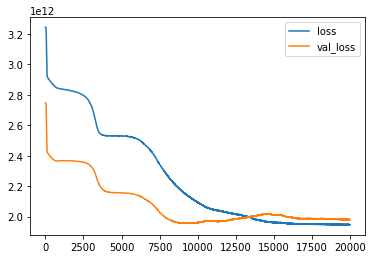

In [25]:
losses.plot()

## model ewaluation

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [27]:
X_test

array([[1.01635838e-01, 4.73758010e-01, 6.58007900e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.60371227e-01, 5.61140088e-02, 6.03896494e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.58592337e-01, 7.24149356e-01, 1.64785070e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [7.61170243e-01, 6.35884760e-02, 6.91002660e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.83445881e-01, 1.86900133e-01, 7.89327045e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.44363032e-01, 6.58032500e-01, 1.97779830e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [28]:
predictions = model.predict(X_test)

In [29]:
mean_absolute_error(y_test,predictions)

491121.46725444676

In [30]:
np.sqrt(mean_squared_error(y_test,predictions))

1406741.919667601

In [31]:
explained_variance_score(y_test,predictions)

0.17675059894624334

In [32]:
frame['price'].mean()

584114.2509896448

In [33]:
frame['price'].median()

212750.0

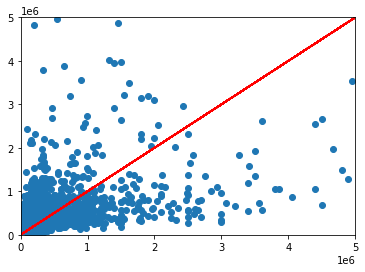

In [37]:
plt.xlim(0,5000000)
plt.ylim(0,5000000)

# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [35]:
errors = y_test.reshape(1908, 1) - predictions

<AxesSubplot:ylabel='Count'>

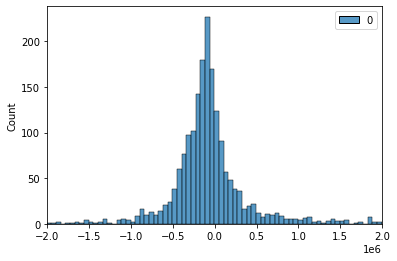

In [45]:
plt.xlim(-2000000,2000000)

sns.histplot(errors)